In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from stack_segmentation.stack import Stack

In [5]:
from stack_segmentation.aug_pipelines import medium_aug
from stack_segmentation.io import make_dataloader, collate_fn_basic
from stack_segmentation.training import handle_stacks_data, make_model, train_loop
from stack_segmentation.unet import UNet
from stack_segmentation.pipeline_config import dataloaders_conf, model_conf, train_conf

In [6]:
from exp_config import data_conf

## Prepare train, validation and test data

In [7]:
data_train, data_val, data_test = handle_stacks_data(**data_conf)

710it [00:01, 650.48it/s]
100%|██████████| 710/710 [00:08<00:00, 88.37it/s]]
8280it [00:00, 64859.77it/s]
710it [00:00, 778.50it/s]
100%|██████████| 710/710 [00:07<00:00, 90.66it/s] 
8280it [00:00, 222559.40it/s]
700it [00:00, 795.22it/s]
100%|██████████| 700/700 [00:07<00:00, 92.57it/s] 
8280it [00:00, 202344.77it/s]


In [8]:
len(data_train), len(data_val), len(data_test)

(7920, 7560, 11)

In [9]:
dataloader_train = make_dataloader(
    samples=data_train, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['train']
)

dataloader_val = make_dataloader(
    samples=data_val, 
    collate_fn=collate_fn_basic,
    **dataloaders_conf['val']
)

dataloaders_test = {
    name: make_dataloader(
        samples=data, 
        collate_fn=collate_fn_basic,
        **dataloaders_conf['test']
    ) for name, data in data_test.items()}

## Create model and metrics

In [10]:
from stack_segmentation.metrics import accuracy, precision, recall, f1, pr_auc, iou

In [11]:
metrics = {
    'accuracy': accuracy, 
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'pr_auc': pr_auc, 
    'iou': iou,
}

In [12]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [13]:
model, criterion, optimizer, scheduler = make_model(**model_conf)

## Run experiment

In [14]:
results = train_loop(
    model=model,
    dataloader_train=dataloader_train, 
    dataloader_val=dataloader_val,
    dataloaders_test=dataloaders_test,
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,
    metrics=metrics,
    exp_name=data_conf['conf_name'],
    **train_conf)

  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 0...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.34222


100%|██████████| 237/237 [00:19<00:00, 12.19it/s]


Mean val loss: 0.10969


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 1...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.14715


100%|██████████| 237/237 [00:19<00:00, 12.12it/s]


Mean val loss: 0.090292


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 2...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13871


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.10725
EarlyStopping counter: 1 out of 10
Epoch 3...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13703


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.13451
EarlyStopping counter: 2 out of 10
Epoch 4...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13332


100%|██████████| 237/237 [00:19<00:00, 12.05it/s]


Mean val loss: 0.072352


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 5...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13213


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.072967
EarlyStopping counter: 1 out of 10
Epoch 6...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.13052


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.096425
EarlyStopping counter: 2 out of 10
Epoch 7...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.12932


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.078565
EarlyStopping counter: 3 out of 10
Epoch 8...


  9%|▉         | 22/248 [00:06<00:47,  4.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11682


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.041568
EarlyStopping counter: 1 out of 10
Epoch 27...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11741


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.040915
EarlyStopping counter: 2 out of 10
Epoch 28...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11699


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.057672
EarlyStopping counter: 3 out of 10
Epoch 29...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11741


100%|██████████| 237/237 [00:19<00:00, 12.06it/s]


Mean val loss: 0.038049


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 30...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11673


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.048909
EarlyStopping counter: 1 out of 10
Epoch 31...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1162


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.036486


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 32...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11596


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.049137
EarlyStopping counter: 1 out of 10
Epoch 33...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11522


100%|██████████| 237/237 [00:19<00:00, 12.02it/s]


Mean val loss: 0.036389


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 34...


 34%|███▍      | 84/248 [00:19<00:34,  4.80it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11145


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.039008
EarlyStopping counter: 2 out of 10
Epoch 42...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11192


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.03763
EarlyStopping counter: 3 out of 10
Epoch 43...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11084


100%|██████████| 237/237 [00:19<00:00, 12.05it/s]


Mean val loss: 0.03381


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 44...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1119


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.034146
EarlyStopping counter: 1 out of 10
Epoch 45...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11142


100%|██████████| 237/237 [00:19<00:00, 12.06it/s]


Mean val loss: 0.033062


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 46...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1104


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.038371
EarlyStopping counter: 2 out of 10
Epoch 48...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11036


100%|██████████| 237/237 [00:19<00:00, 12.07it/s]


Mean val loss: 0.032812


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 49...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1103


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.033032
EarlyStopping counter: 1 out of 10
Epoch 50...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11039


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.032953
EarlyStopping counter: 2 out of 10
Epoch 51...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11027


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.034399
EarlyStopping counter: 3 out of 10
Epoch 52...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.11069


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.032913
EarlyStopping counter: 4 out of 10
Epoch 53...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10942


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.037059
EarlyStopping counter: 5 out of 10
Epoch 54...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10907


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.039509
EarlyStopping counter: 6 out of 10
Epoch 55...


 56%|█████▋    | 140/248 [00:31<00:22,  4.70it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10643


100%|██████████| 237/237 [00:19<00:00, 12.05it/s]


Mean val loss: 0.0314


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 73...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1062
Epoch    73: reducing learning rate of group 0 to 2.5000e-05.


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.031567
EarlyStopping counter: 1 out of 10
Epoch 74...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10551


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.031405


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 75...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10616


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.032157
EarlyStopping counter: 1 out of 10
Epoch 76...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10692


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.031021


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 77...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1055


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.031239
EarlyStopping counter: 1 out of 10
Epoch 78...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.105


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.03147
EarlyStopping counter: 2 out of 10
Epoch 79...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10574


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.031575
EarlyStopping counter: 3 out of 10
Epoch 80...


 81%|████████  | 200/248 [00:43<00:09,  4.85it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 237/237 [00:19<00:00, 12.00it/s]


Mean val loss: 0.030656


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 97...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10411


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.031705
EarlyStopping counter: 1 out of 10
Epoch 98...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10493


100%|██████████| 237/237 [00:19<00:00, 11.97it/s]


Mean val loss: 0.030586


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 99...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.1048


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030796
EarlyStopping counter: 1 out of 10
Epoch 100...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10356


100%|██████████| 237/237 [00:19<00:00, 12.02it/s]


Mean val loss: 0.030482


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 101...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10389


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030647
EarlyStopping counter: 1 out of 10
Epoch 102...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10496


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.030482


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 103...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10384


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030697
EarlyStopping counter: 1 out of 10
Epoch 104...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10456


 32%|███▏      | 77/237 [00:07<00:12, 13.30it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10364


100%|██████████| 237/237 [00:19<00:00, 12.03it/s]


Mean val loss: 0.030308


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 123...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10291
Epoch   123: reducing learning rate of group 0 to 1.5625e-06.


100%|██████████| 237/237 [00:19<00:00, 11.98it/s]


Mean val loss: 0.030357


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 124...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10321


100%|██████████| 237/237 [00:19<00:00, 11.98it/s]


Mean val loss: 0.030451


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 125...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10329


100%|██████████| 237/237 [00:19<00:00, 12.00it/s]


Mean val loss: 0.030353


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 126...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10317


  0%|          | 0/248 [00:00<?, ?it/s]

Mean val loss: 0.030456
EarlyStopping counter: 1 out of 10
Epoch 127...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10372


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.030293


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 128...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10331


100%|██████████| 237/237 [00:19<00:00, 12.00it/s]


Mean val loss: 0.03033


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 129...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10384
Epoch   129: reducing learning rate of group 0 to 1.0000e-06.


100%|██████████| 237/237 [00:19<00:00, 12.05it/s]


Mean val loss: 0.030301


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 130...


 54%|█████▍    | 134/248 [00:30<00:23,  4.79it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 237/237 [00:19<00:00, 11.93it/s]


Mean val loss: 0.03029


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 147...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10426


100%|██████████| 237/237 [00:19<00:00, 12.03it/s]


Mean val loss: 0.030336


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 148...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10259


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.030262


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 149...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10326


100%|██████████| 237/237 [00:19<00:00, 12.01it/s]


Mean val loss: 0.030291


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 150...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10377


100%|██████████| 237/237 [00:19<00:00, 12.03it/s]


Mean val loss: 0.030327


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 151...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10353


100%|██████████| 237/237 [00:19<00:00, 12.03it/s]


Mean val loss: 0.030304


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 152...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10306


100%|██████████| 237/237 [00:19<00:00, 11.96it/s]


Mean val loss: 0.030268


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 153...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10312


100%|██████████| 237/237 [00:19<00:00, 12.02it/s]


Mean val loss: 0.0303


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 154...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10373


100%|██████████| 237/237 [00:19<00:00, 12.04it/s]


Mean val loss: 0.030255


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10291


100%|██████████| 237/237 [00:19<00:00, 12.21it/s]


Mean val loss: 0.030228


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 173...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10421


100%|██████████| 237/237 [00:19<00:00, 12.22it/s]


Mean val loss: 0.030234


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 174...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10393


100%|██████████| 237/237 [00:19<00:00, 12.22it/s]


Mean val loss: 0.030237


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 175...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10221


100%|██████████| 237/237 [00:19<00:00, 12.21it/s]


Mean val loss: 0.03028


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 176...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10303


100%|██████████| 237/237 [00:19<00:00, 12.24it/s]


Mean val loss: 0.030229


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 177...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10386


100%|██████████| 237/237 [00:19<00:00, 12.24it/s]


Mean val loss: 0.030311


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 178...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10407


100%|██████████| 237/237 [00:19<00:00, 12.25it/s]


Mean val loss: 0.030232


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 179...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10361


100%|██████████| 237/237 [00:19<00:00, 12.24it/s]


Mean val loss: 0.030257


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 180...


 52%|█████▏    | 128/248 [00:28<00:24,  4.83it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

100%|██████████| 237/237 [00:19<00:00, 12.22it/s]


Mean val loss: 0.030317


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 197...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10267


100%|██████████| 237/237 [00:19<00:00, 12.25it/s]


Mean val loss: 0.030196


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 198...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10339


100%|██████████| 237/237 [00:19<00:00, 12.22it/s]


Mean val loss: 0.030205


  0%|          | 0/248 [00:00<?, ?it/s]

Epoch 199...


  0%|          | 0/237 [00:00<?, ?it/s]

Mean train loss: 0.10288


100%|██████████| 237/237 [00:19<00:00, 12.24it/s]


Mean val loss: 0.030218


 45%|████▍     | 116/259 [01:07<01:20,  1.77it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Dump experiment results

In [15]:
import pickle
import json

In [16]:
p = './{}_exp_results.pkl'.format(data_conf['conf_name'])
# p = 'carb96558_exp_results.pkl'
with open(p, 'wb') as f:
    pickle.dump(results, f)

In [17]:
# import torch
# torch.save(model.state_dict(), './{}_exp_model.torch'.format(data_conf['conf_name']))

In [18]:
model_conf

{'device': 'cuda:0',
 'weight': [1, 10],
 'loss': [('BCE', 0.5), ('Dice_log', 0.5)],
 'lr': 0.0001,
 'min_lr': 1e-06,
 'weight_decay': 0.0001,
 'factor': 0.5,
 'patience': 5}

In [19]:
import torch
model.load_state_dict(torch.load('./{}.pt'.format(data_conf['conf_name'])))

<All keys matched successfully>

## Train and validation losses

In [20]:
from itertools import chain

In [21]:
train_losses = list(chain(*[item for item in results['train_losses']]))
val_losses = list(chain(*[item for item in results['val_losses']]))

In [22]:
def moving_average(a, n=5) :
    ret = np.cumsum([a[0]] * (n - 1) + a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

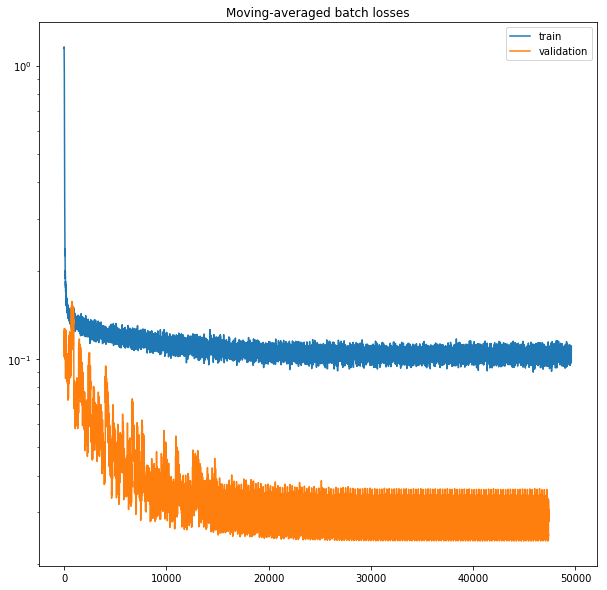

In [23]:
plt.figure(figsize=(10, 10))
plt.title('Moving-averaged batch losses')
plt.plot(np.arange(len(train_losses)), moving_average(train_losses), label='train')
plt.plot(np.arange(len(val_losses)), moving_average(val_losses), label='validation')

plt.legend(loc='best')
plt.yscale('log')

# plt.ylim([1e-2, 1])
plt.show()

In [24]:
mean_train_loss = [np.mean(item) for item in results['train_losses']]
mean_val_loss = [np.mean(item) for item in results['val_losses']]

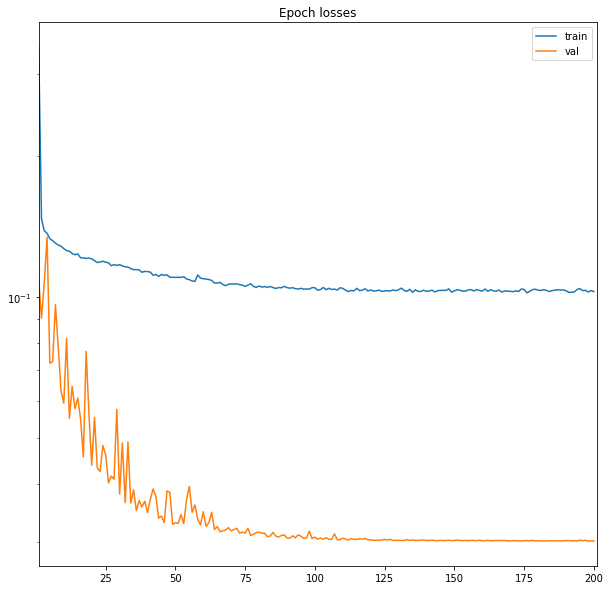

In [25]:
plt.figure(figsize=(10, 10))
plt.title('Epoch losses')
plt.plot(np.arange(len(mean_train_loss)) + 1, mean_train_loss, label='train')
plt.plot(np.arange(len(mean_val_loss)) + 1, mean_val_loss, label='val')

plt.yscale('log')
plt.legend(loc='best')

plt.xlim([1, len(mean_train_loss) + 1])
plt.show()

## Predicted samples

In [26]:
import os

In [27]:
import torch

In [28]:
from visualization_utils import output_to_binary, plot_sample

In [29]:
threshold = 0.5
to_plot = 10
device = model_conf['device']

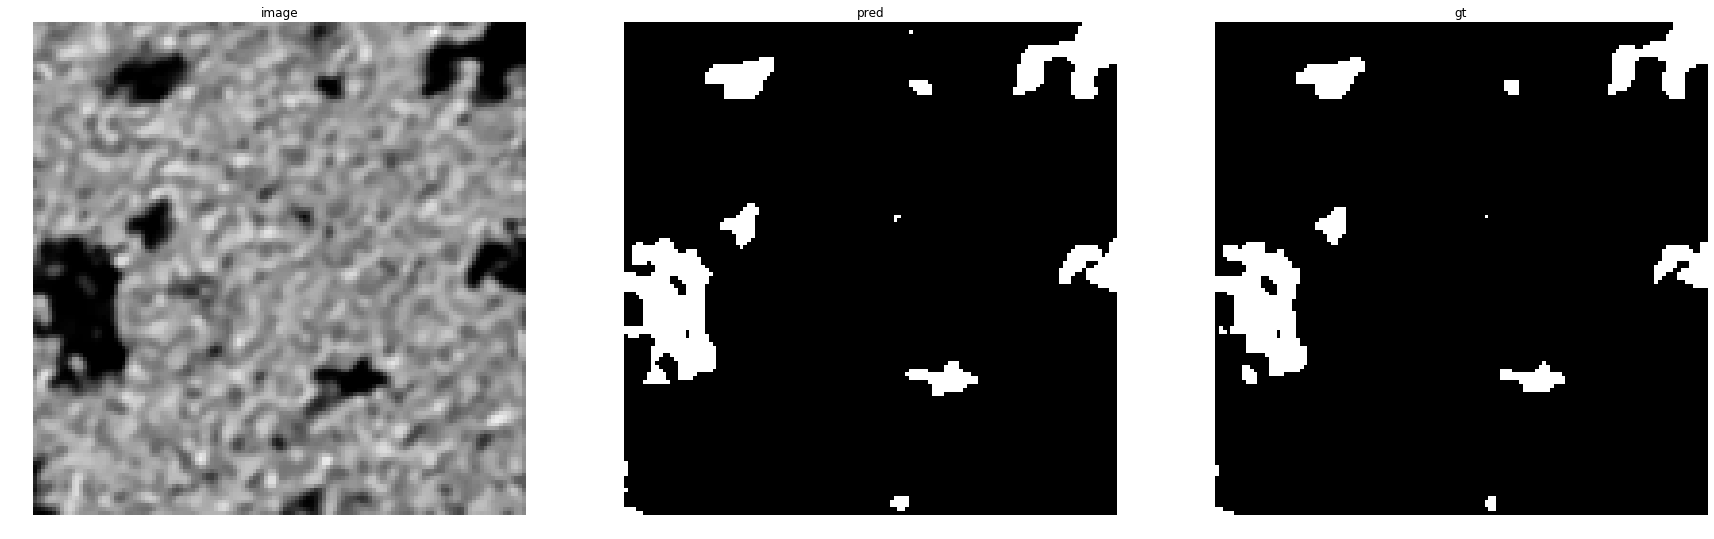

accuracy    : 0.990966796875
precision   : 0.8871834228702993
recall      : 0.9991356957649092
f1          : 0.9398373983739836
pr_auc      : 0.9981098824168402
iou         : 0.8865030674846626


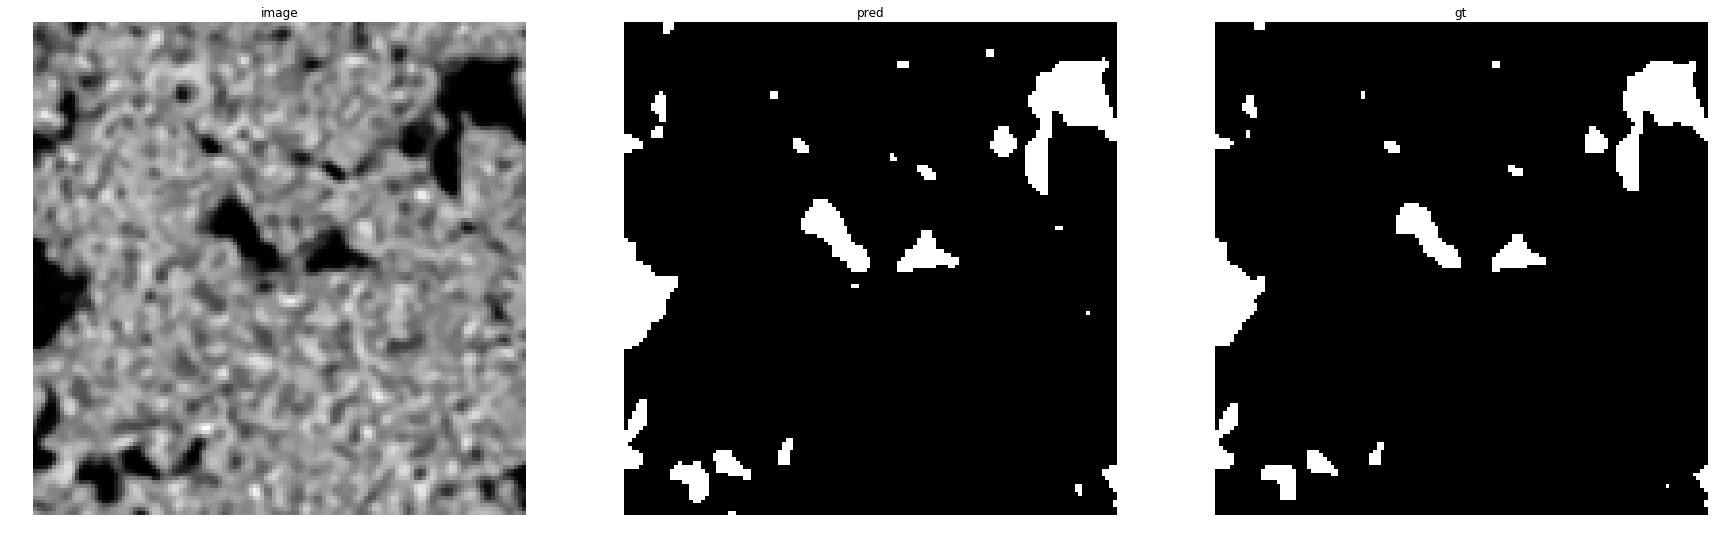

accuracy    : 0.9896240234375
precision   : 0.862124898621249
recall      : 1.0
f1          : 0.92595818815331
pr_auc      : 0.9976949574507367
iou         : 0.862124898621249


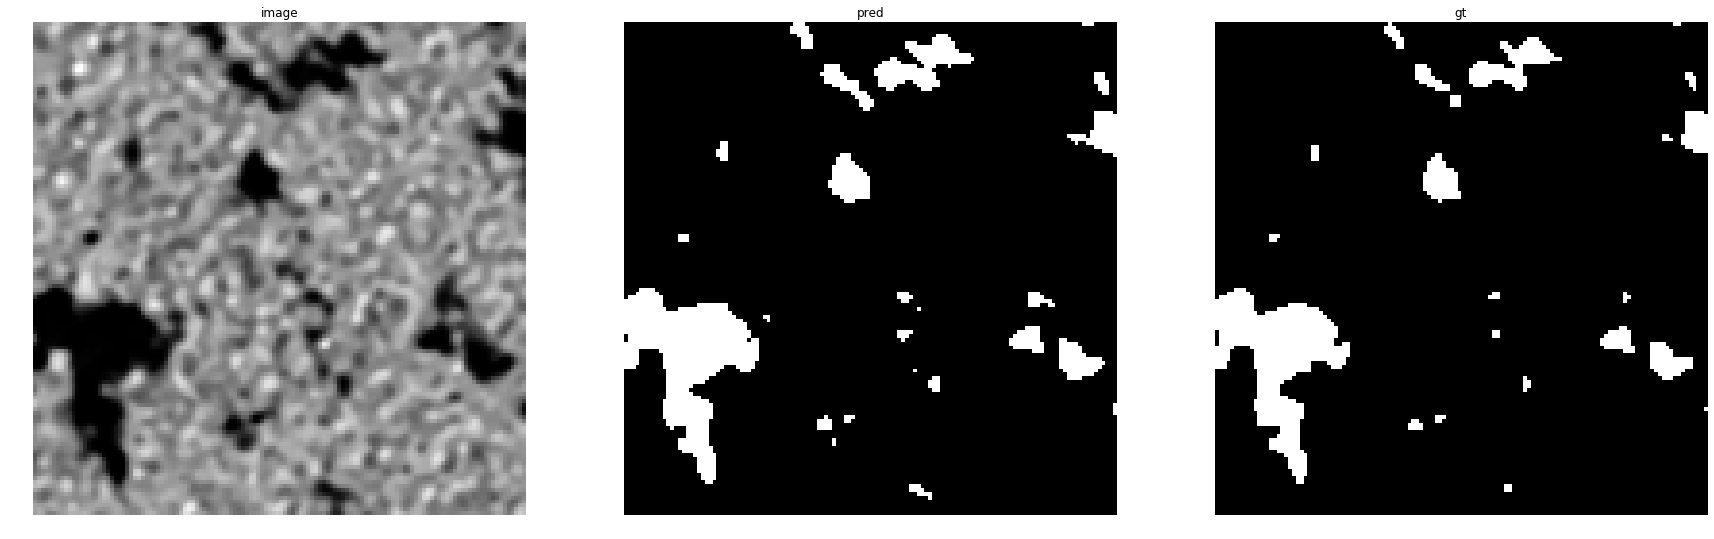

accuracy    : 0.98675537109375
precision   : 0.8534773801485482
recall      : 1.0
f1          : 0.9209471766848816
pr_auc      : 0.9984962345493761
iou         : 0.8534773801485482


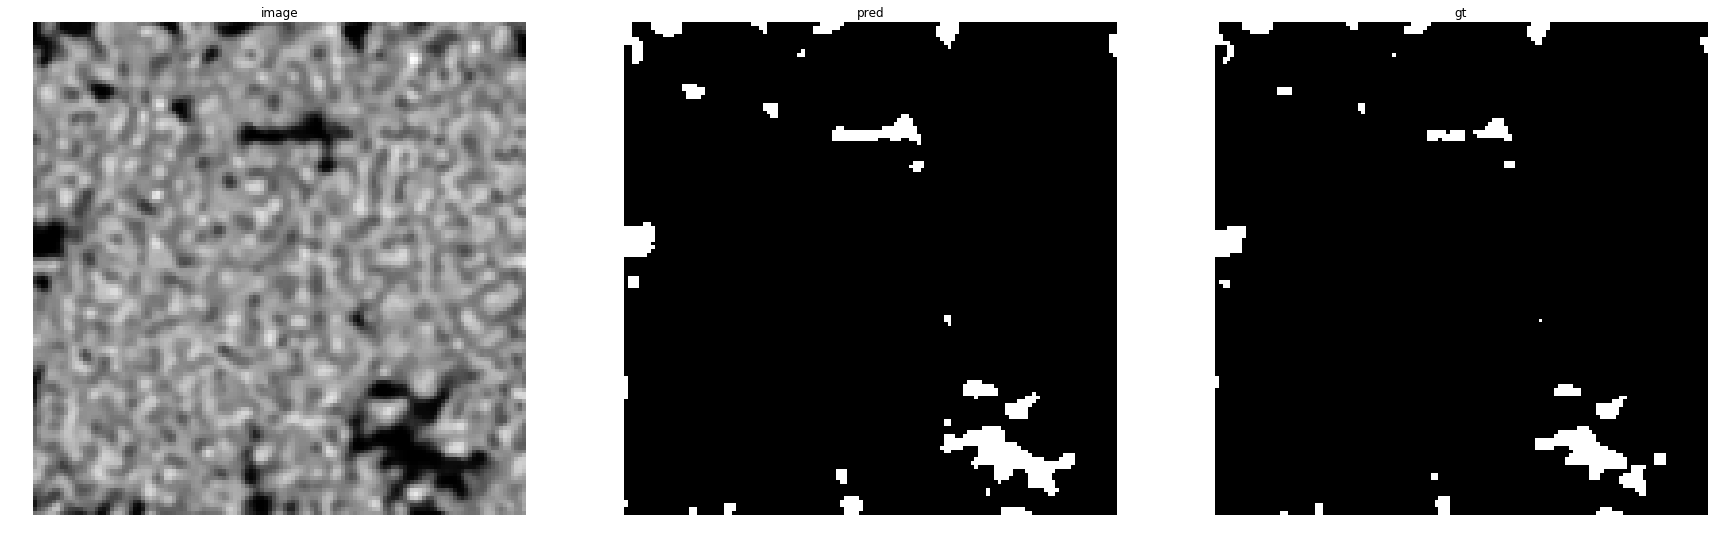

accuracy    : 0.98828125
precision   : 0.7284299858557284
recall      : 1.0
f1          : 0.8428805237315875
pr_auc      : 0.9880133474133739
iou         : 0.7284299858557284


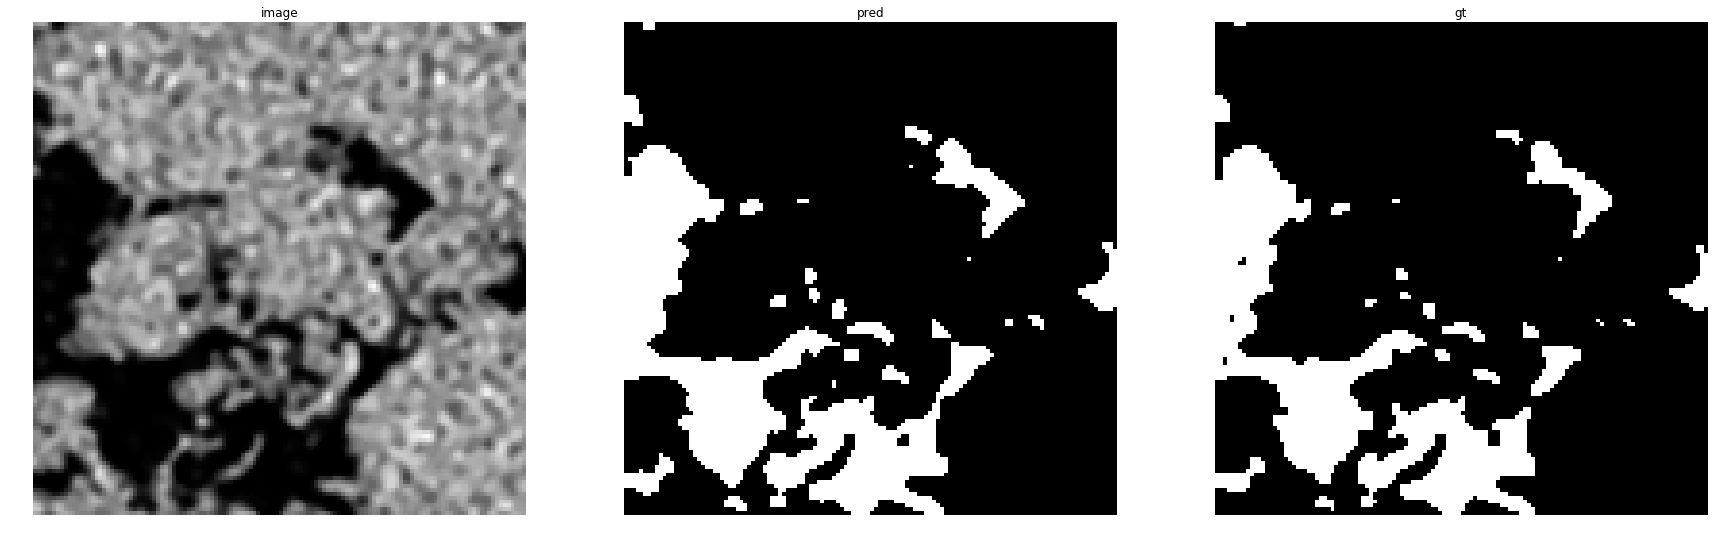

accuracy    : 0.98455810546875
precision   : 0.92049025769956
recall      : 1.0
f1          : 0.9585992472590411
pr_auc      : 0.9992508101659758
iou         : 0.92049025769956


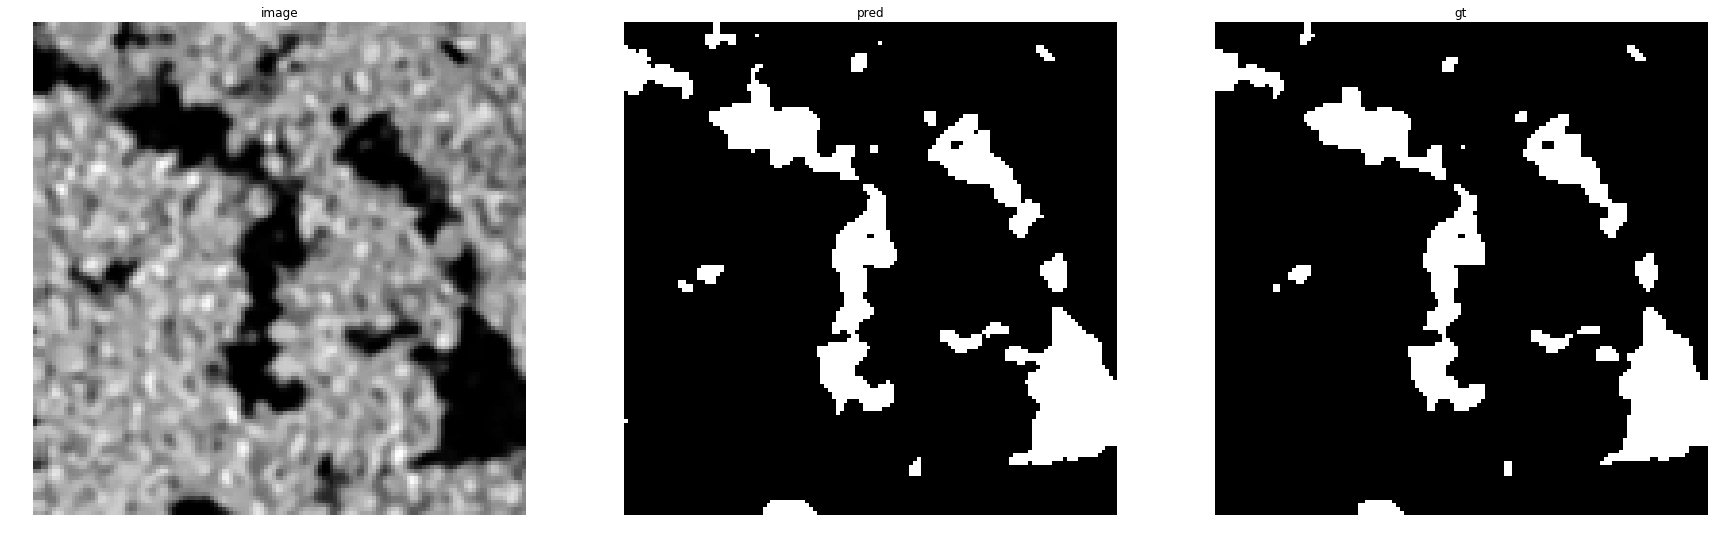

accuracy    : 0.984375
precision   : 0.8952965235173824
recall      : 1.0
f1          : 0.9447561501942167
pr_auc      : 0.9983942590437442
iou         : 0.8952965235173824


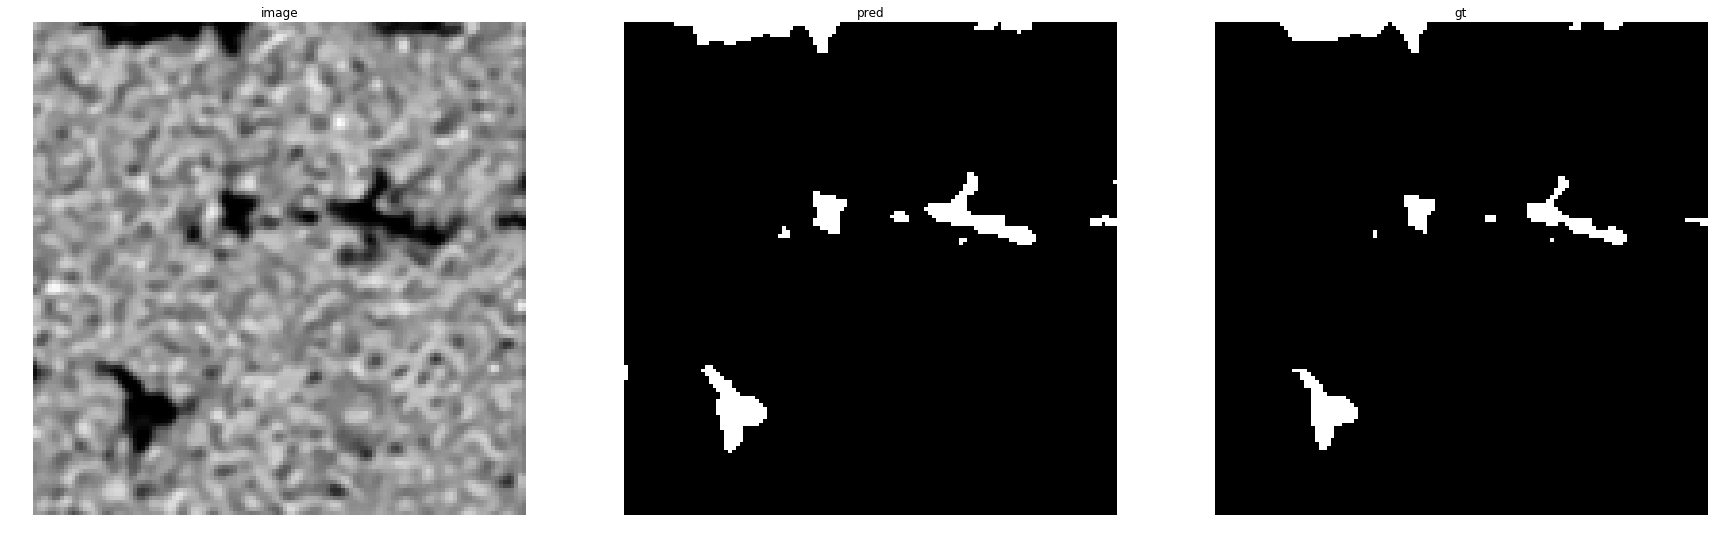

accuracy    : 0.99188232421875
precision   : 0.785483870967742
recall      : 1.0
f1          : 0.8798554652213189
pr_auc      : 0.9962078421055394
iou         : 0.785483870967742


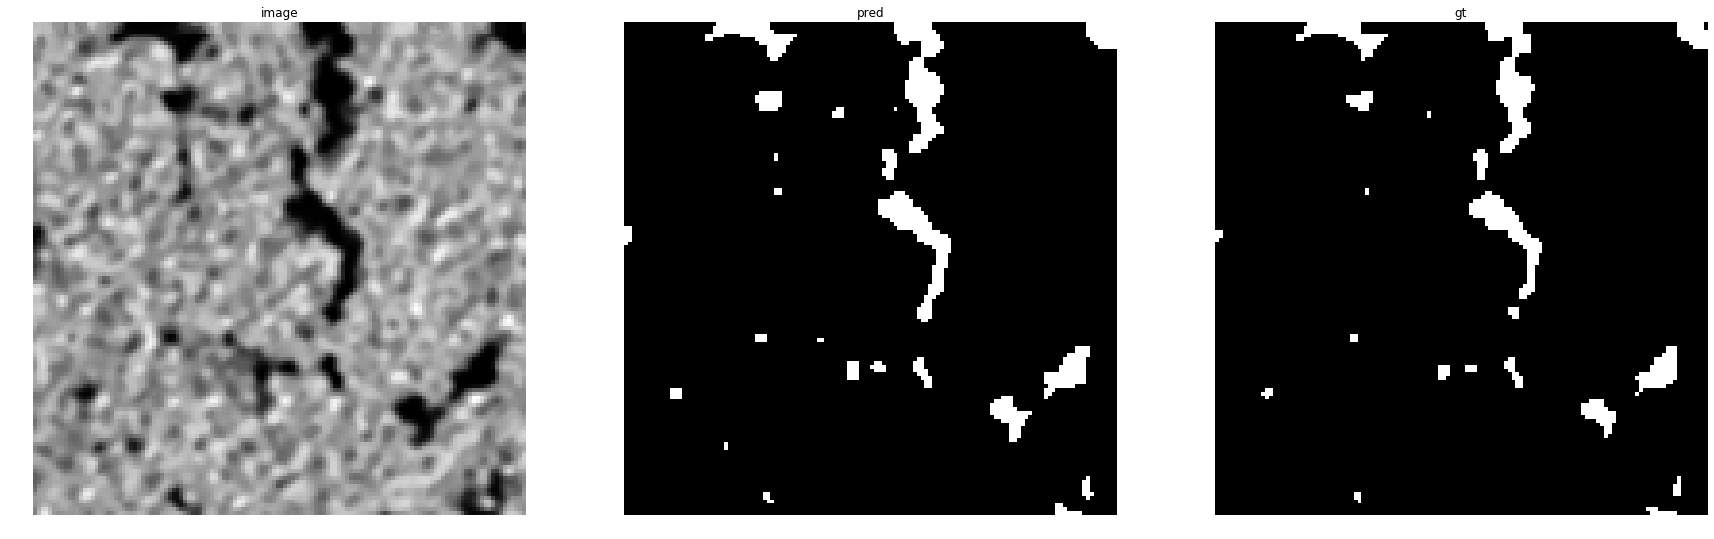

accuracy    : 0.991455078125
precision   : 0.843644544431946
recall      : 0.9986684420772304
f1          : 0.9146341463414634
pr_auc      : 0.9963984556407444
iou         : 0.8426966292134831


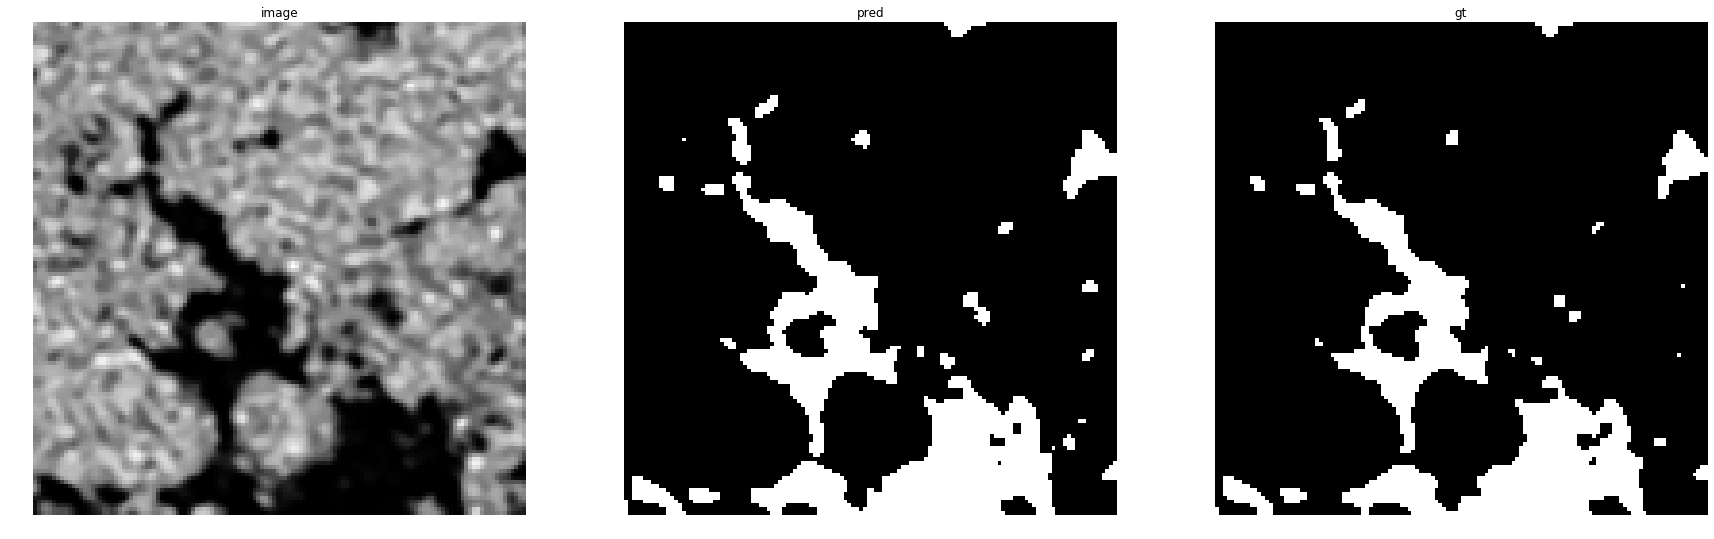

accuracy    : 0.98236083984375
precision   : 0.8953277797899312
recall      : 1.0
f1          : 0.9447735524555704
pr_auc      : 0.9982643900910871
iou         : 0.8953277797899312


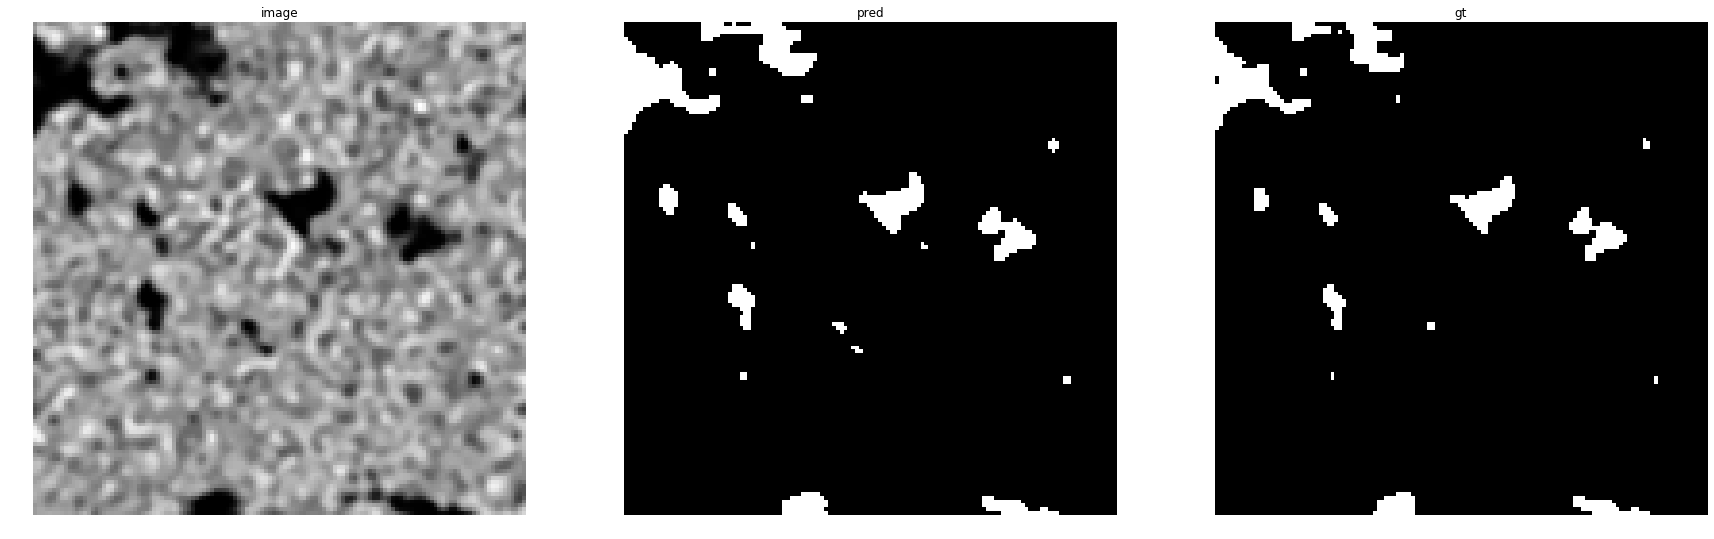

accuracy    : 0.99200439453125
precision   : 0.8554083885209713
recall      : 1.0
f1          : 0.9220701963117193
pr_auc      : 0.9966313190551317
iou         : 0.8554083885209713


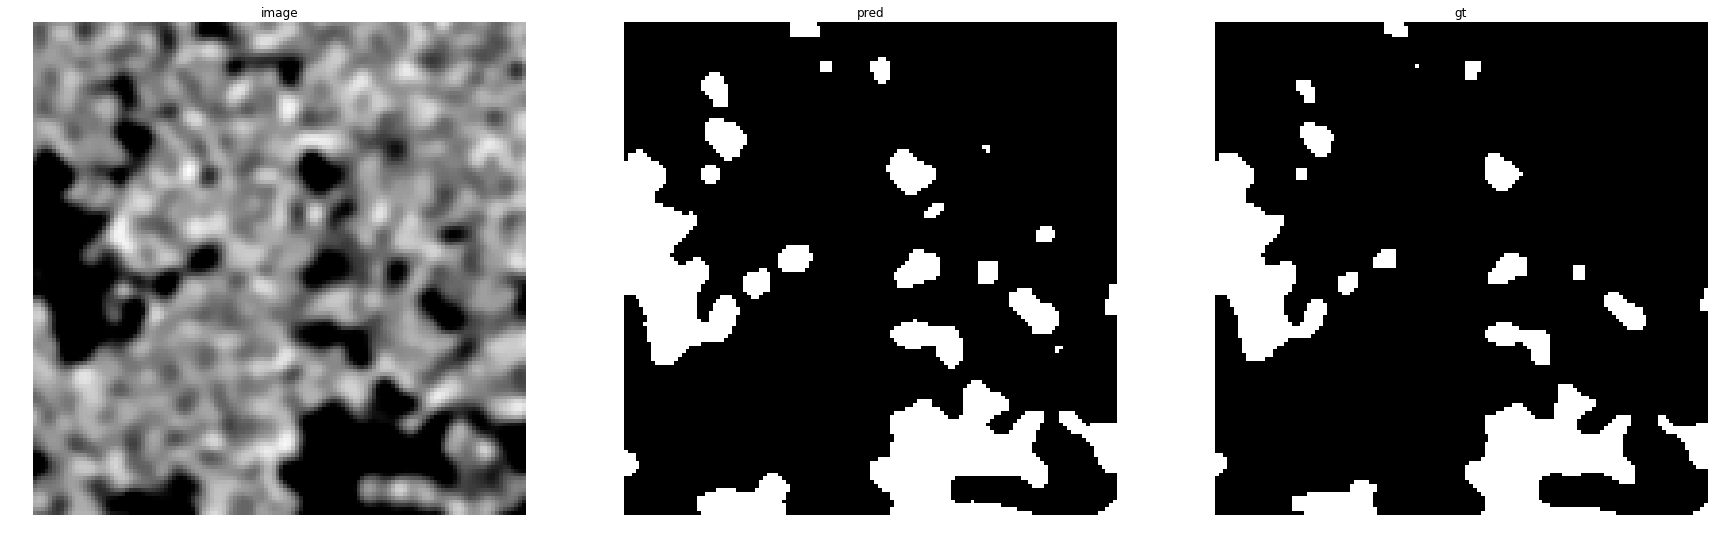

accuracy    : 0.96405029296875
precision   : 0.7991132332878581
recall      : 1.0
f1          : 0.8883412322274882
pr_auc      : 0.9956200755837181
iou         : 0.7991132332878581


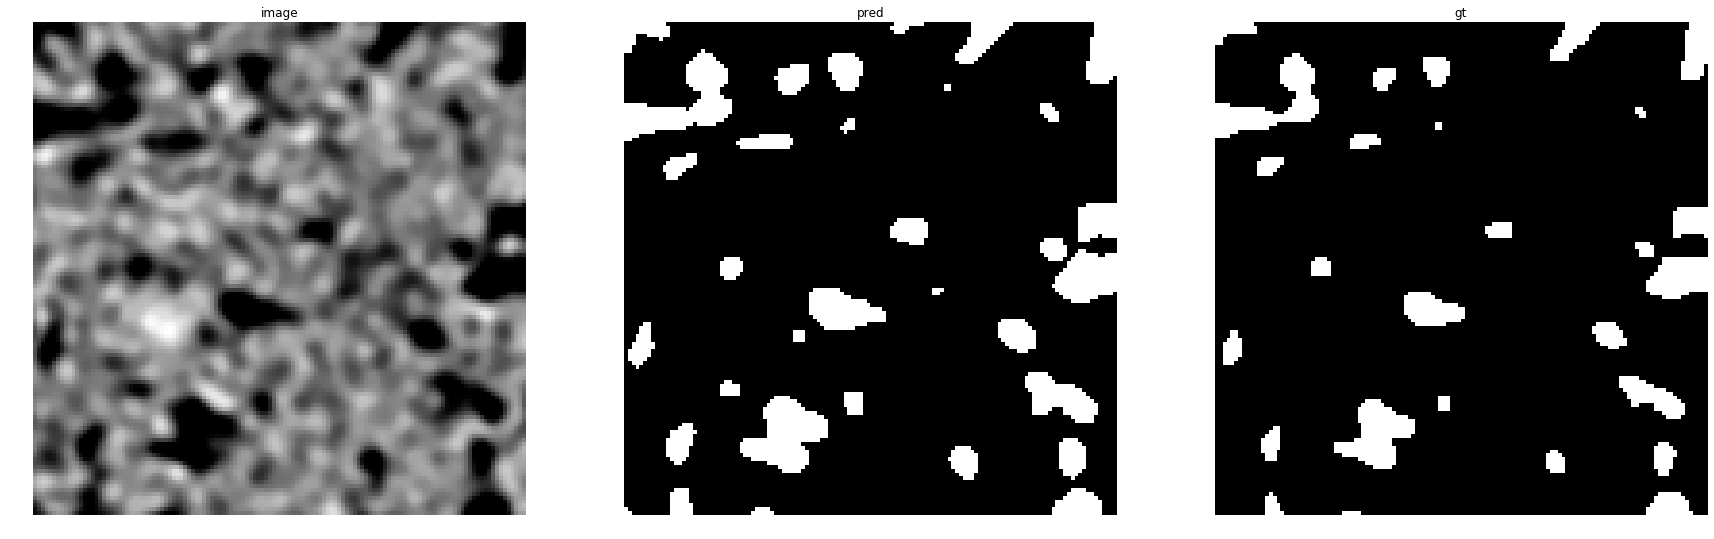

accuracy    : 0.95745849609375
precision   : 0.6861773975686628
recall      : 1.0
f1          : 0.8138851802403205
pr_auc      : 0.9905799704357503
iou         : 0.6861773975686628


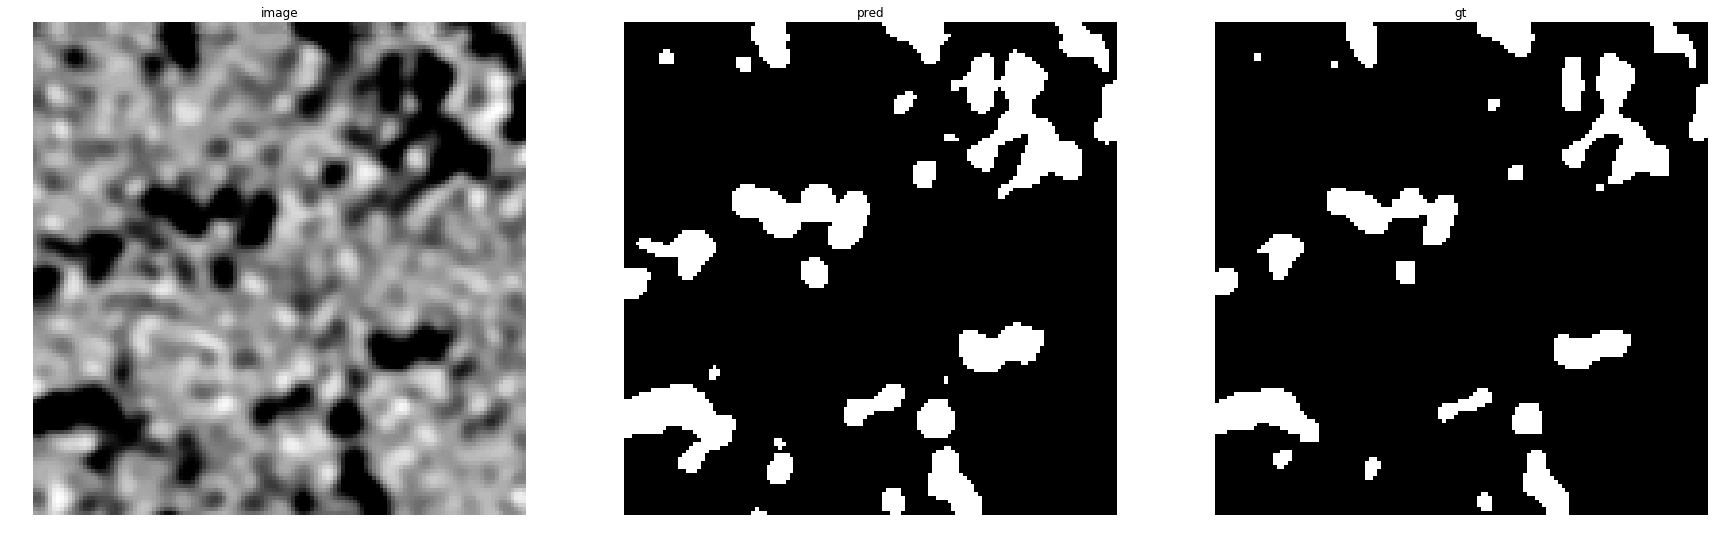

accuracy    : 0.95367431640625
precision   : 0.7088607594936709
recall      : 1.0
f1          : 0.8296296296296296
pr_auc      : 0.9892878053857833
iou         : 0.7088607594936709


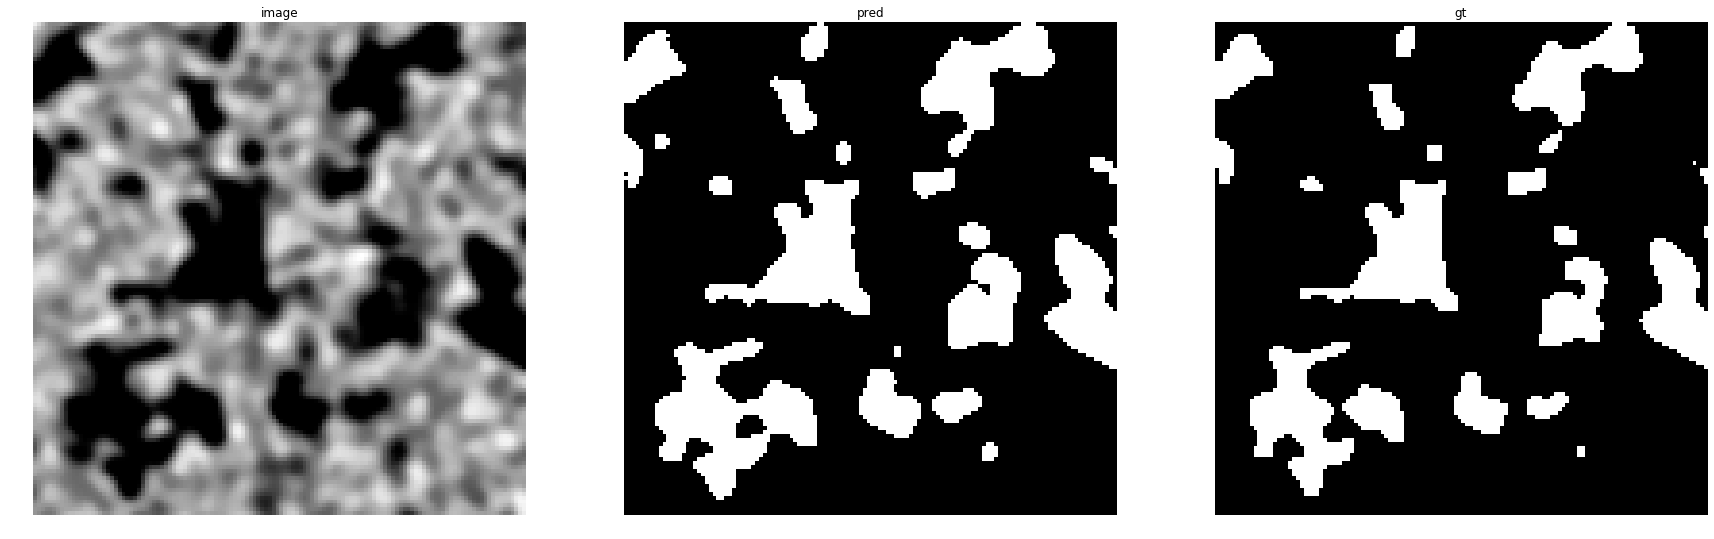

accuracy    : 0.95892333984375
precision   : 0.8167211328976035
recall      : 1.0
f1          : 0.8991155748763304
pr_auc      : 0.9951797574208218
iou         : 0.8167211328976035


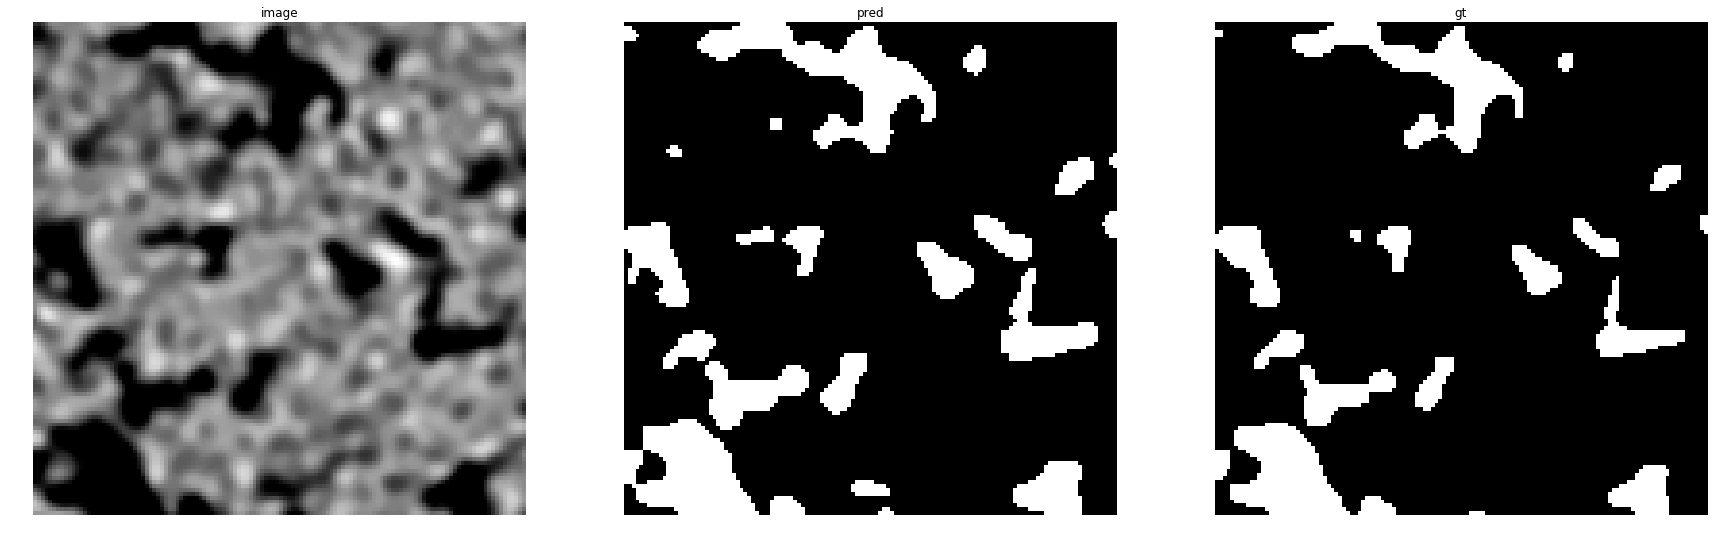

accuracy    : 0.96197509765625
precision   : 0.7885733835100923
recall      : 0.9978354978354979
f1          : 0.8809478310720429
pr_auc      : 0.9860816887974473
iou         : 0.7872267759562842


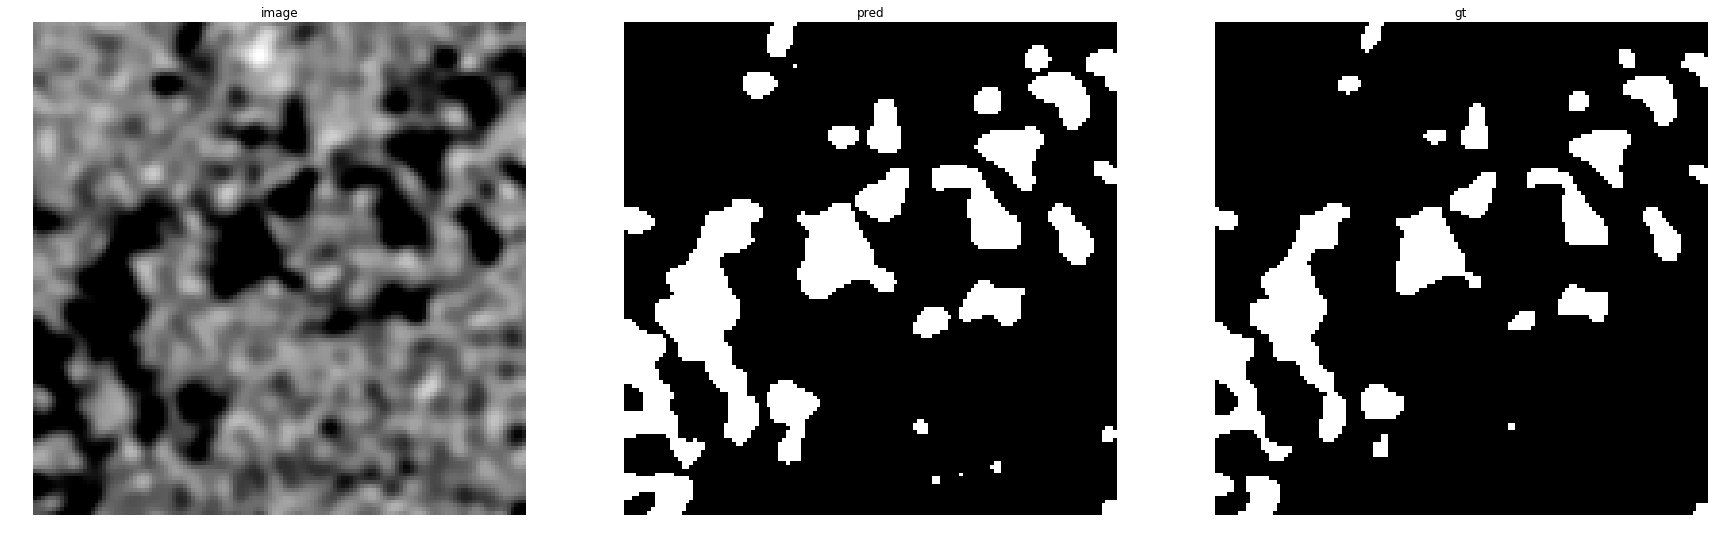

accuracy    : 0.94537353515625
precision   : 0.7283763277693475
recall      : 1.0
f1          : 0.8428446005267778
pr_auc      : 0.9947260603479429
iou         : 0.7283763277693475


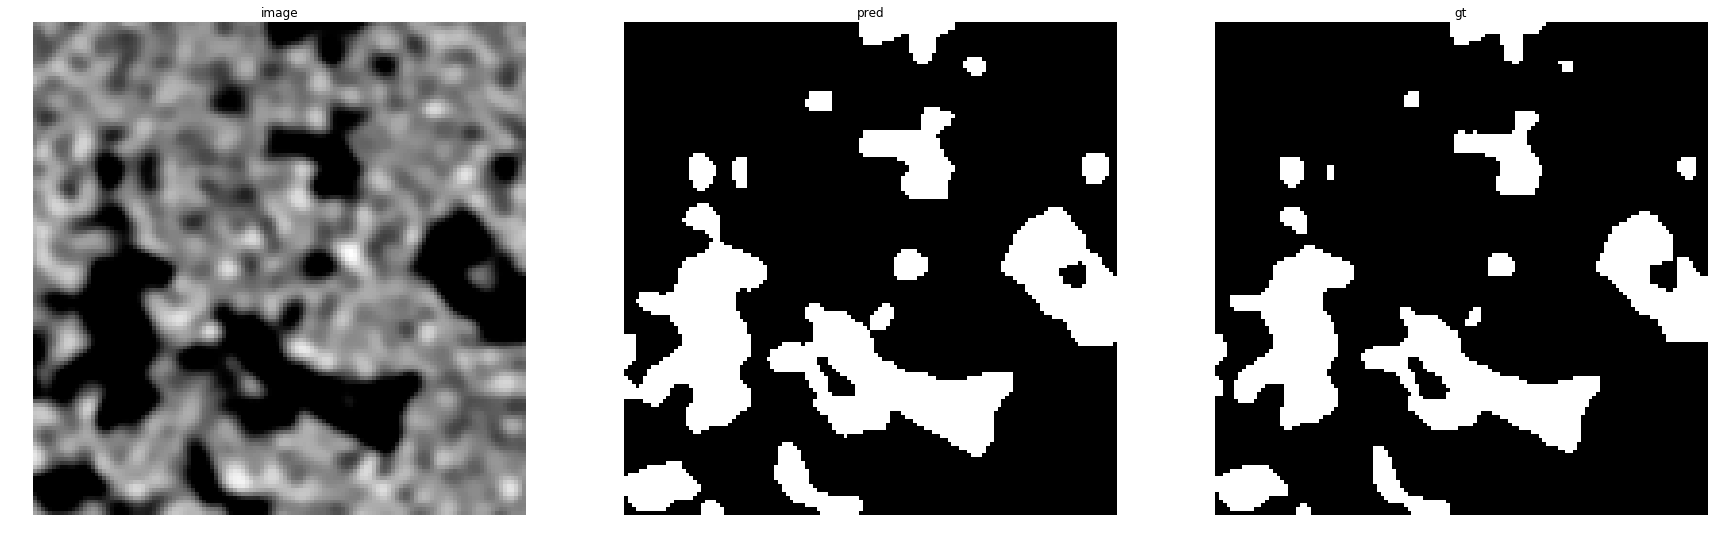

accuracy    : 0.95947265625
precision   : 0.8271733472149921
recall      : 1.0
f1          : 0.9054131054131055
pr_auc      : 0.9971199308568197
iou         : 0.8271733472149921


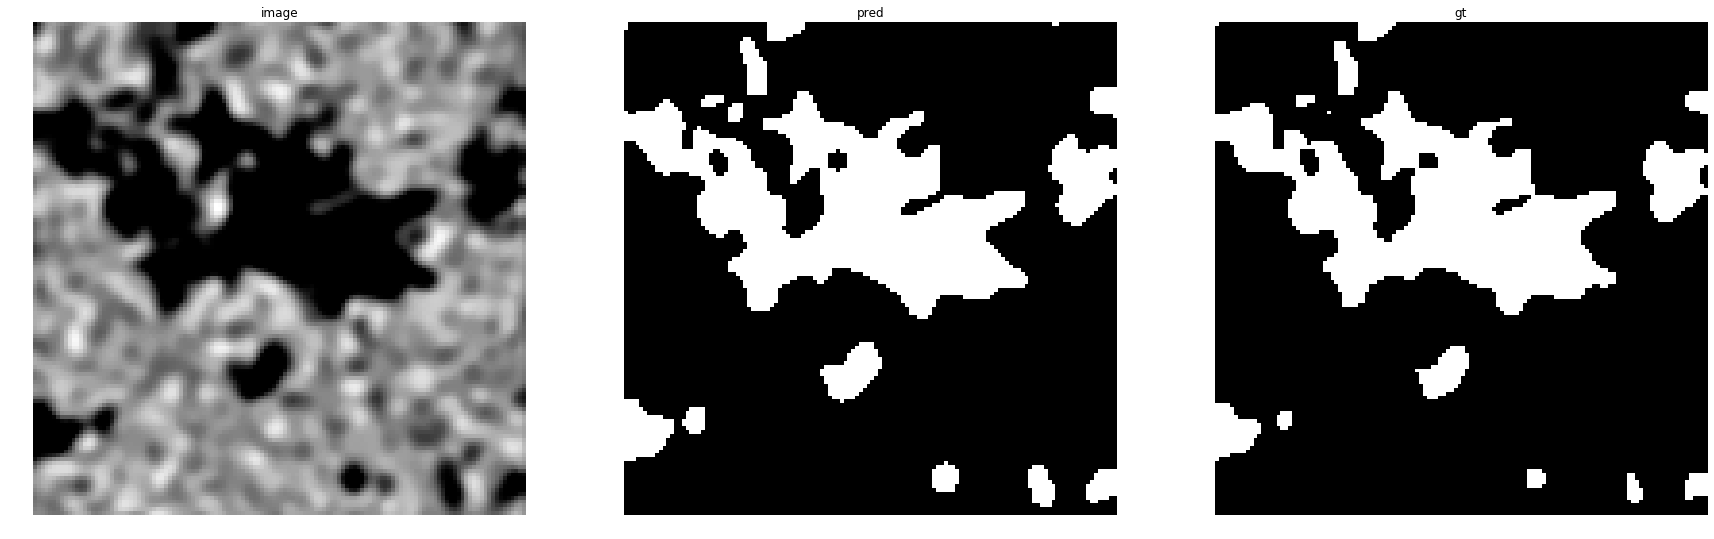

accuracy    : 0.97650146484375
precision   : 0.9043112513144059
recall      : 0.9939323894828085
f1          : 0.9470061940812113
pr_auc      : 0.9966167987905601
iou         : 0.8993464052287582


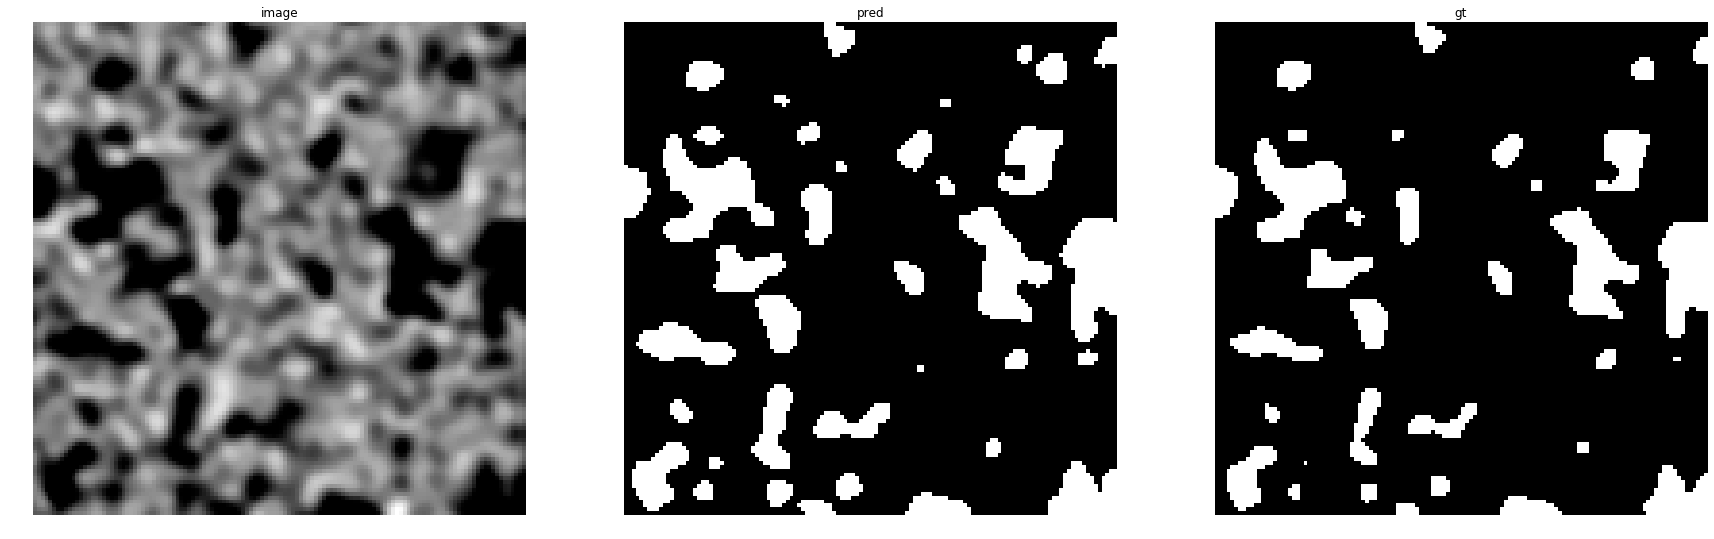

accuracy    : 0.9554443359375
precision   : 0.7706826045926392
recall      : 0.9995920032639739
f1          : 0.8703374777975134
pr_auc      : 0.9917147616059989
iou         : 0.7704402515723271


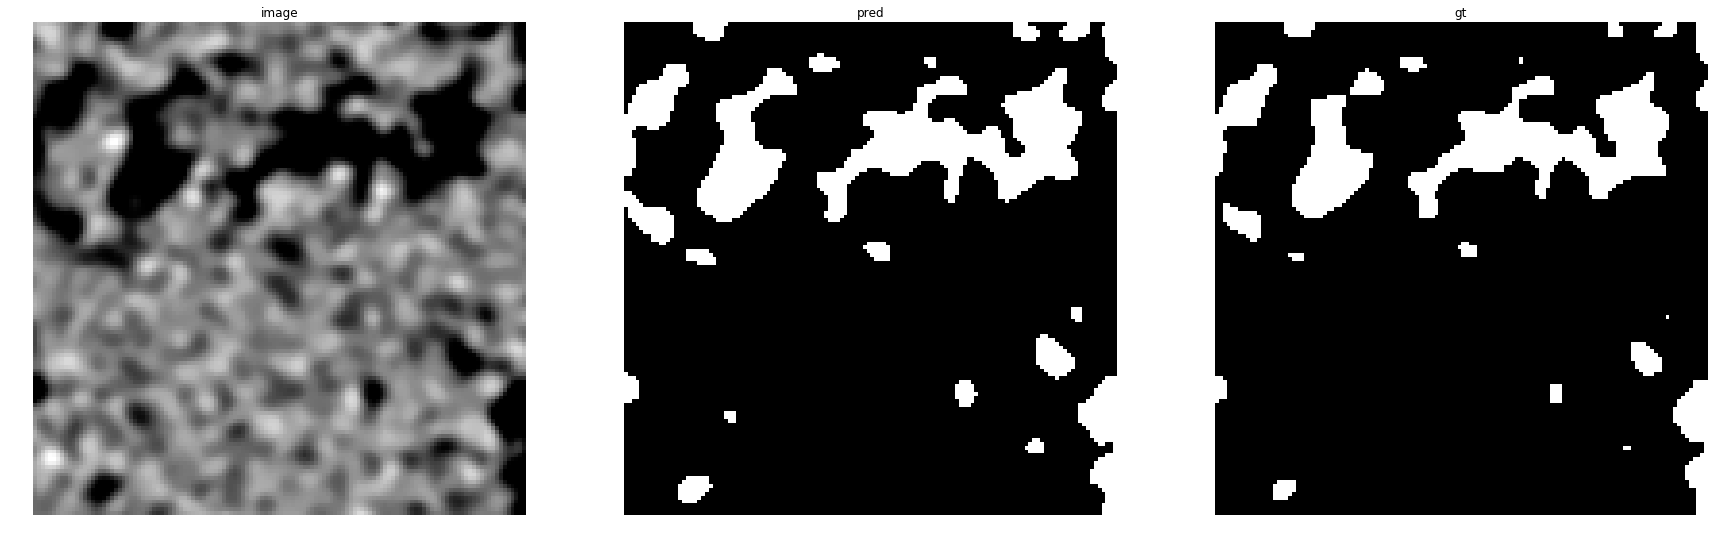

accuracy    : 0.9737548828125
precision   : 0.8330739299610895
recall      : 0.9995331465919701
f1          : 0.9087436332767402
pr_auc      : 0.99422656651202
iou         : 0.8327499027615713


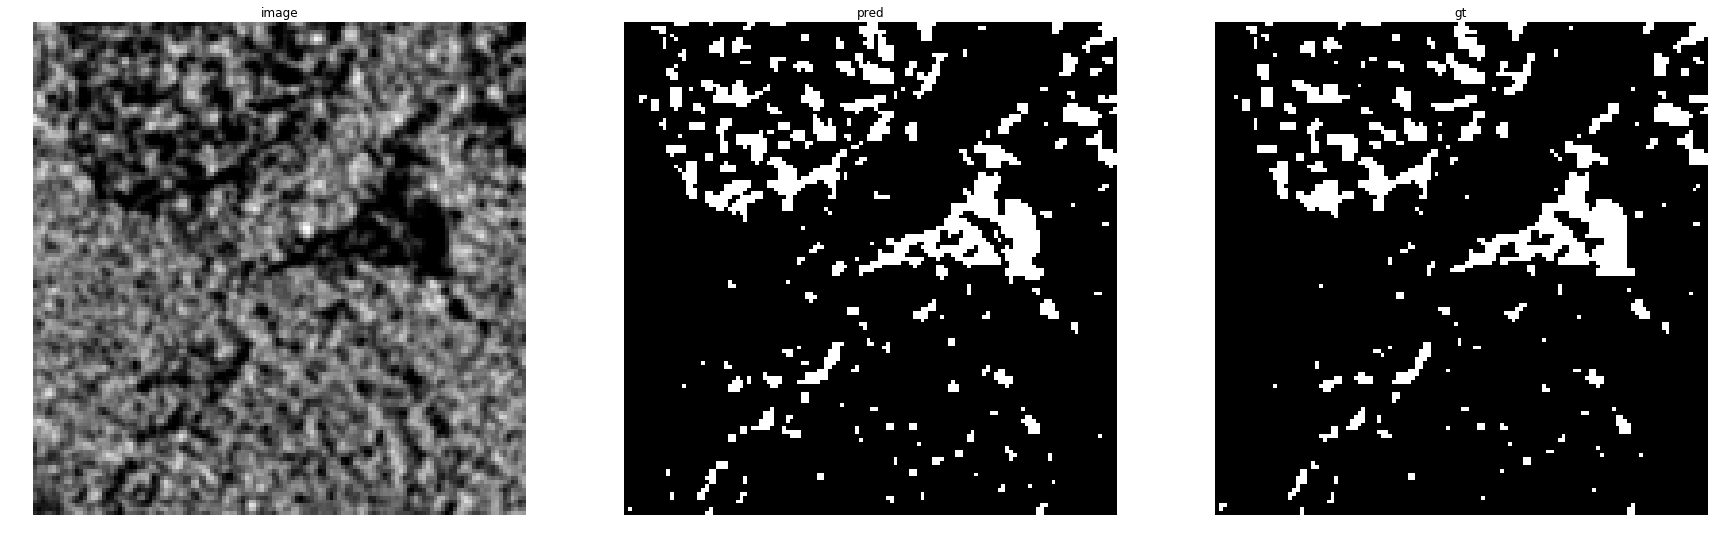

accuracy    : 0.97802734375
precision   : 0.8537328593194515
recall      : 0.9589275527666857
f1          : 0.9032778076303062
pr_auc      : 0.9808259796392853
iou         : 0.8236158745712886


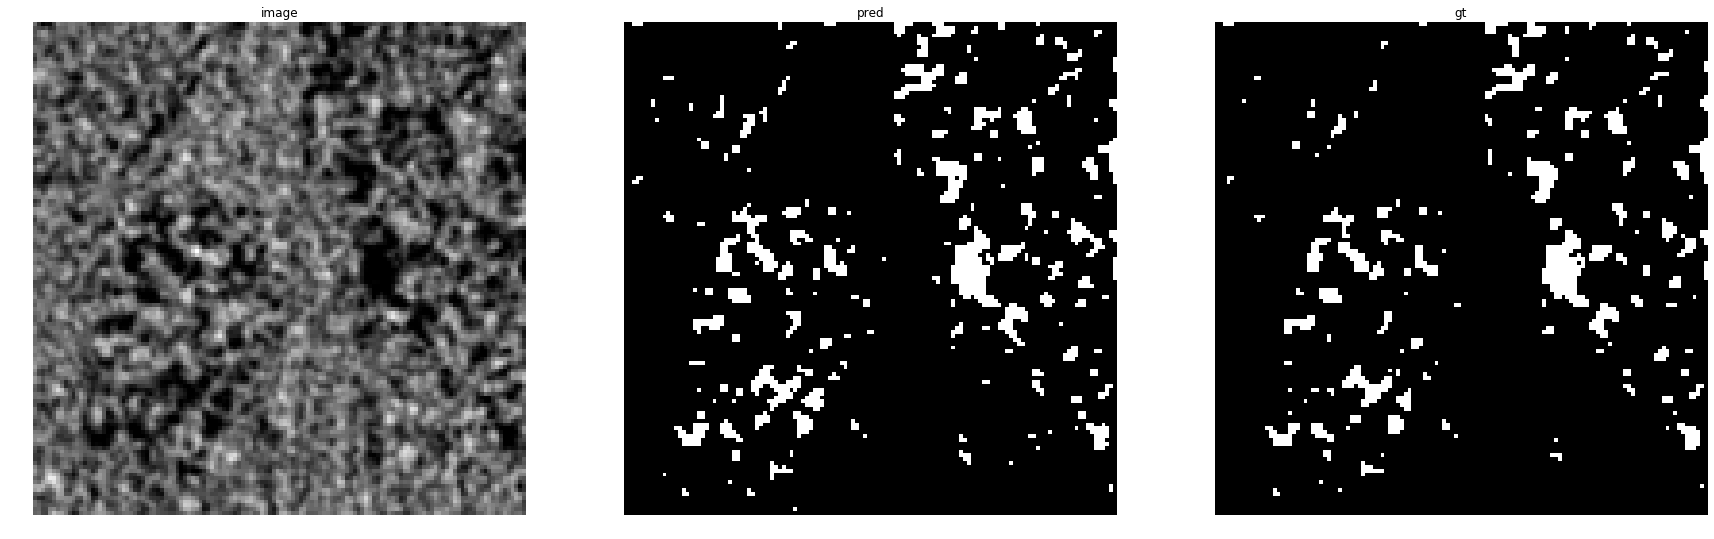

accuracy    : 0.98236083984375
precision   : 0.8126760563380282
recall      : 0.9804587935429057
f1          : 0.888717751251444
pr_auc      : 0.9823905064736168
iou         : 0.7997227997227997


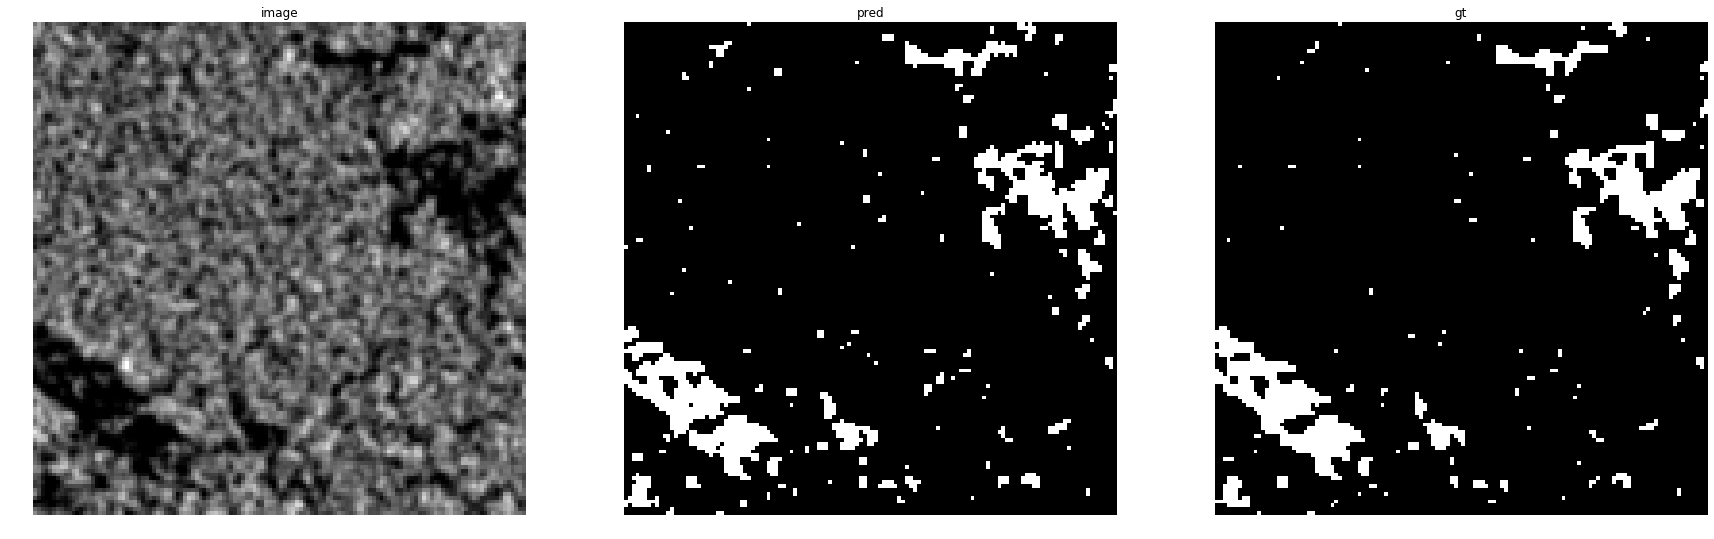

accuracy    : 0.98468017578125
precision   : 0.87109375
recall      : 0.9618979151689432
f1          : 0.9142466689443115
pr_auc      : 0.9845061443977885
iou         : 0.842039018250472


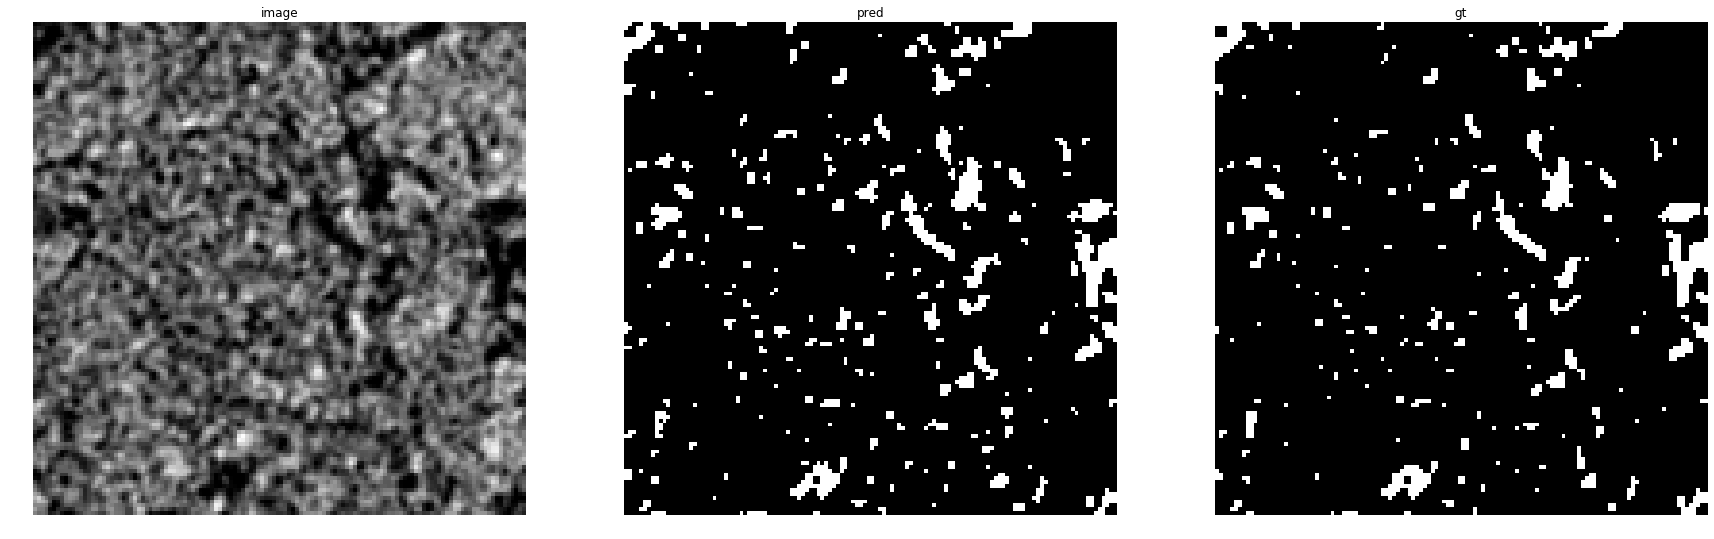

accuracy    : 0.97967529296875
precision   : 0.7928118393234672
recall      : 0.9664948453608248
f1          : 0.8710801393728222
pr_auc      : 0.9746992525004765
iou         : 0.7716049382716049


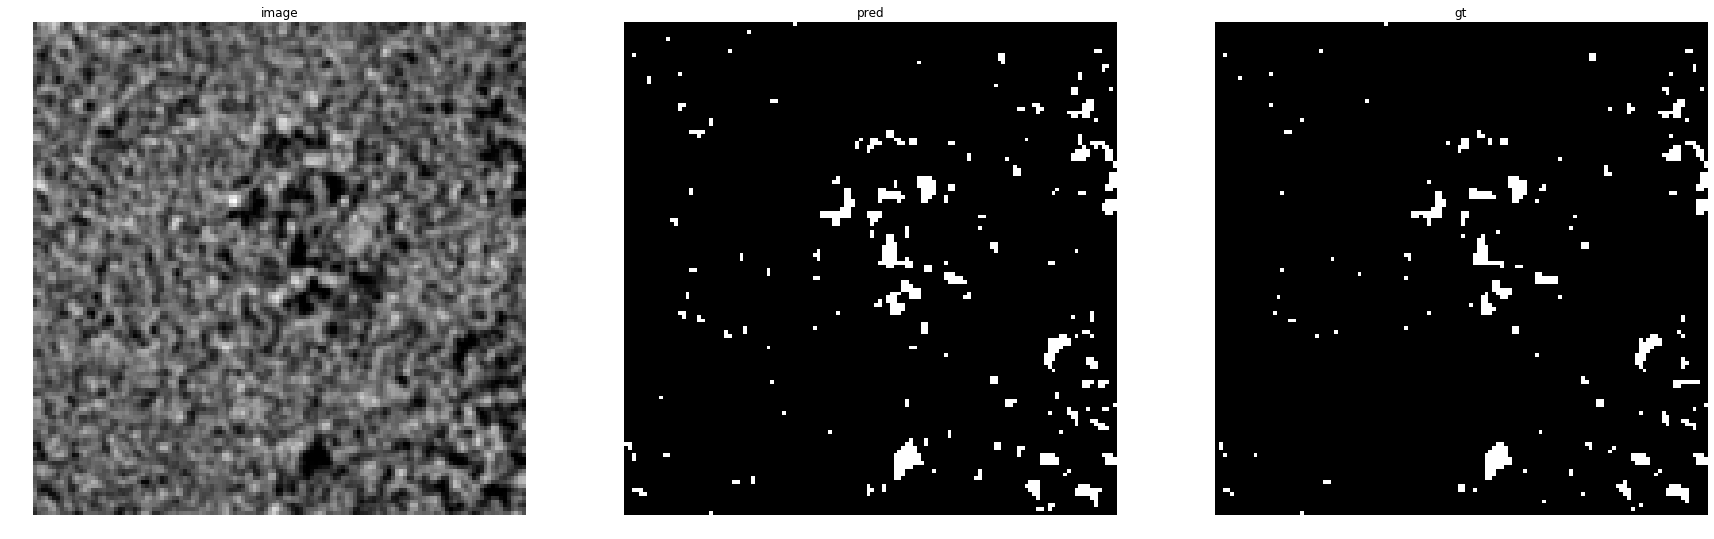

accuracy    : 0.9888916015625
precision   : 0.740909090909091
recall      : 0.978
f1          : 0.8431034482758621
pr_auc      : 0.9764397623370864
iou         : 0.7287630402384501


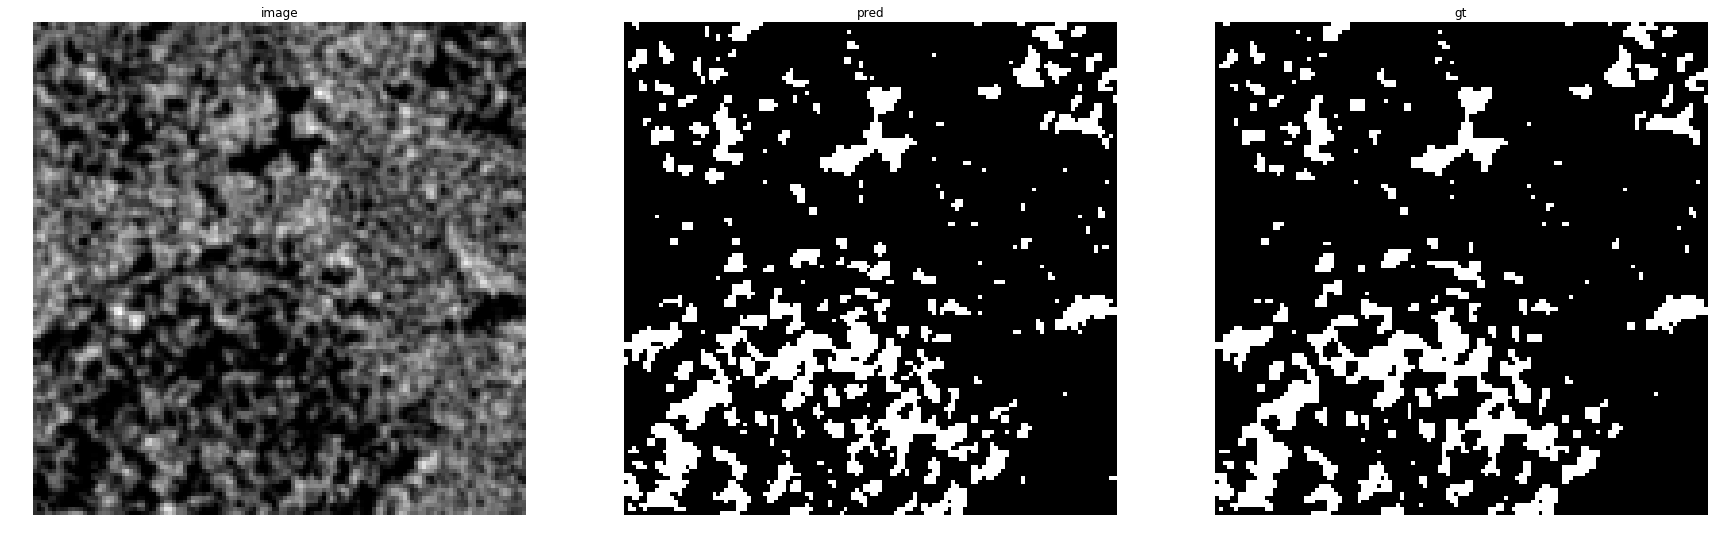

accuracy    : 0.97216796875
precision   : 0.8902397838568051
recall      : 0.9526563064691002
f1          : 0.9203910614525139
pr_auc      : 0.984665950633286
iou         : 0.8525226390685641


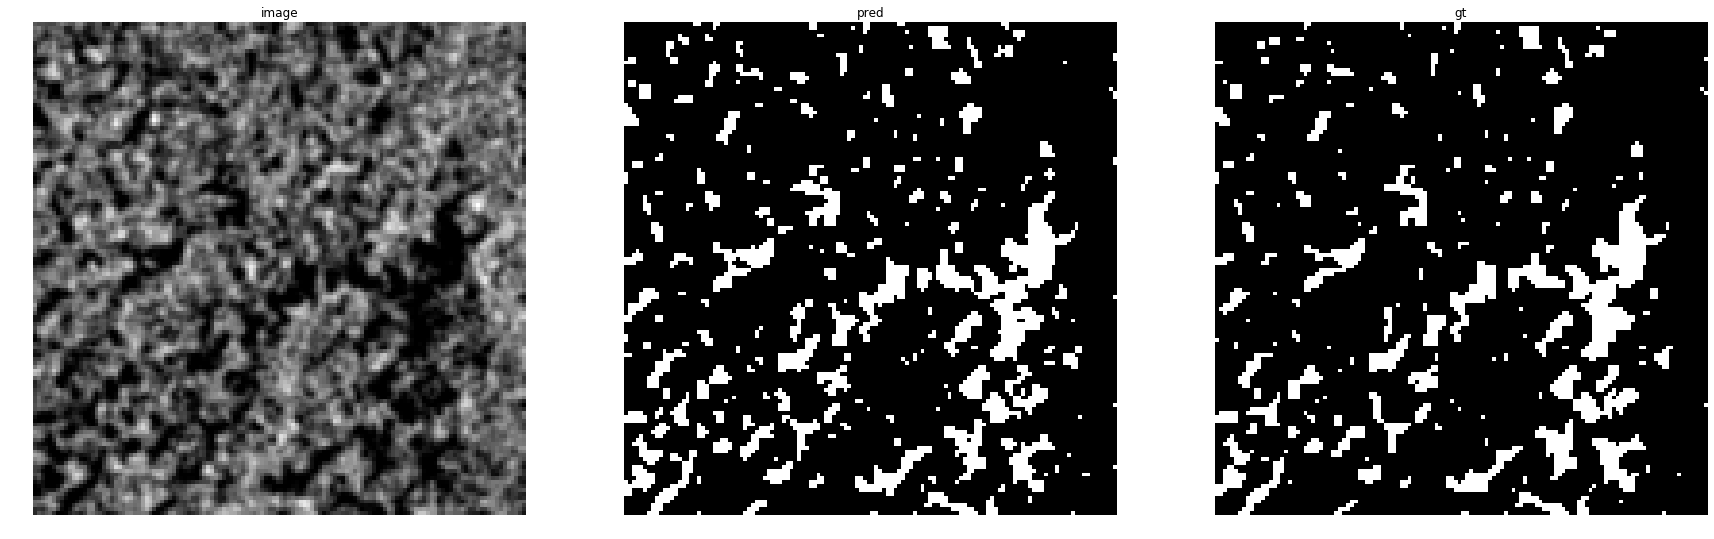

accuracy    : 0.97119140625
precision   : 0.8466088328075709
recall      : 0.962780269058296
f1          : 0.9009651699538398
pr_auc      : 0.9828608442983571
iou         : 0.819778541428026


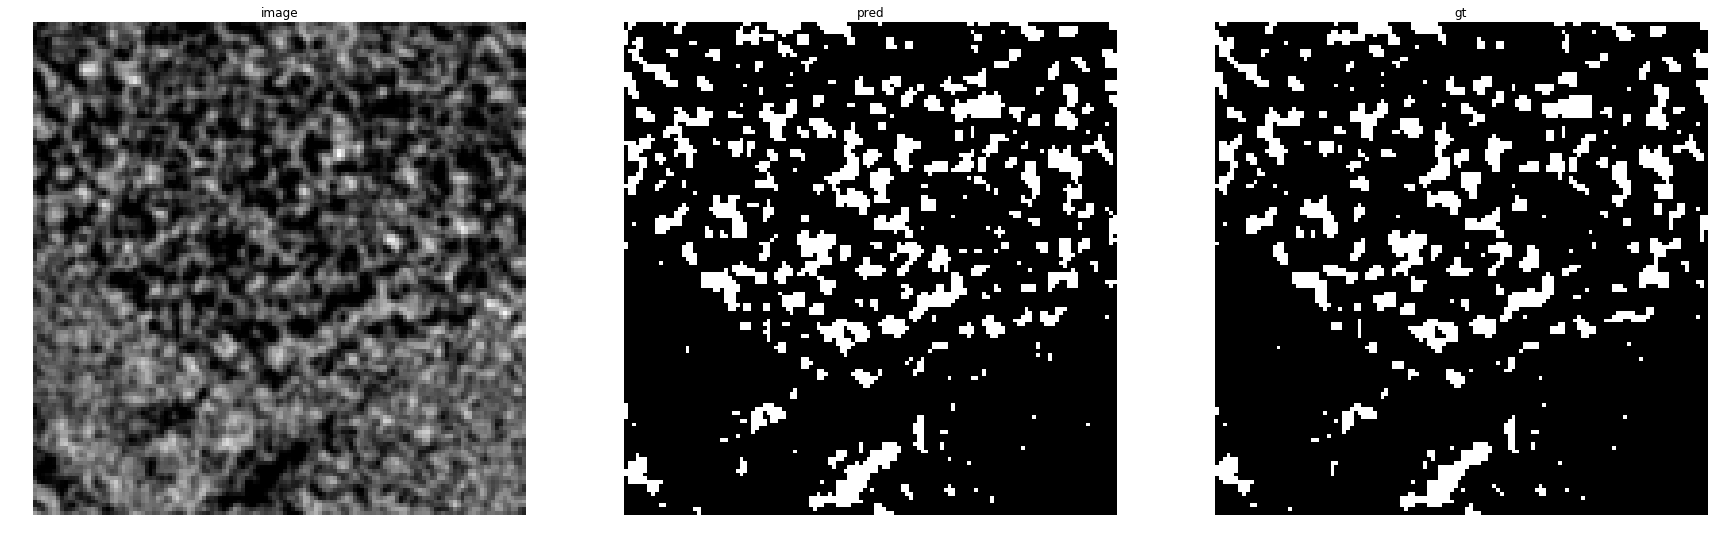

accuracy    : 0.968994140625
precision   : 0.8494860499265786
recall      : 0.9593698175787728
f1          : 0.9010903426791278
pr_auc      : 0.979989333406079
iou         : 0.8199858256555634


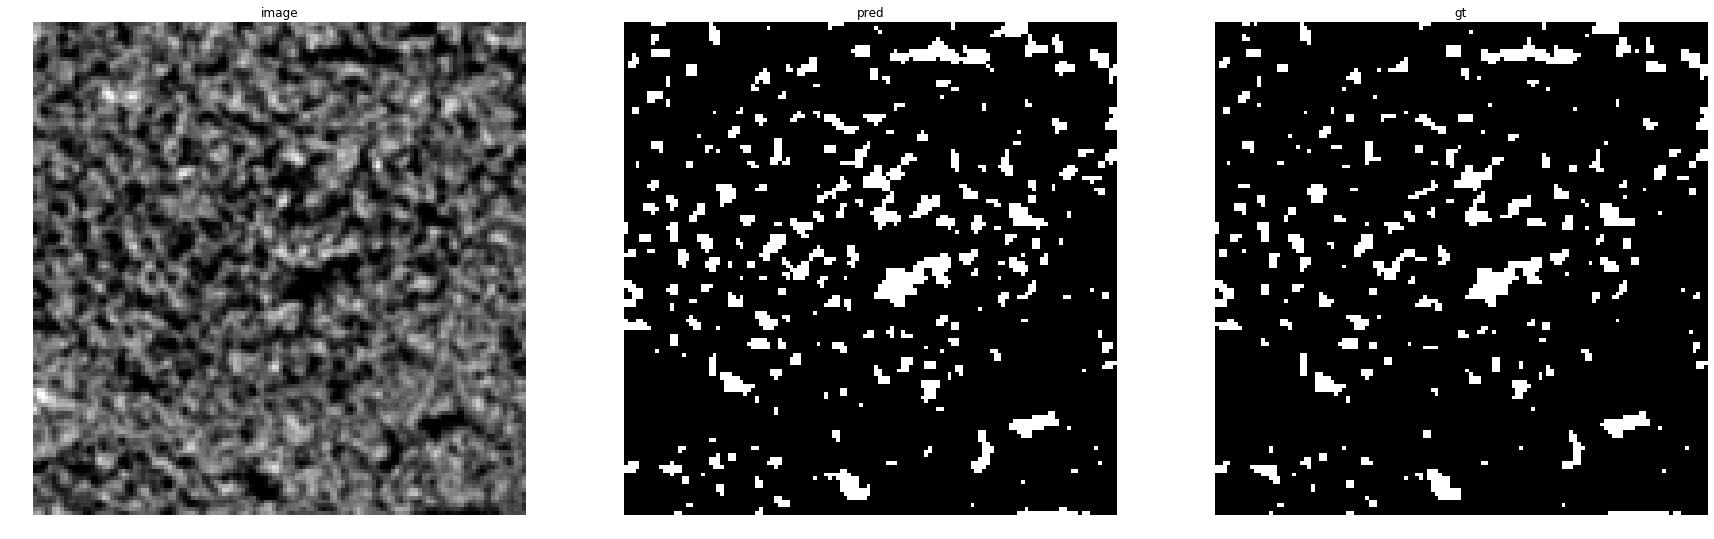

accuracy    : 0.97235107421875
precision   : 0.7749057619816909
recall      : 0.9762550881953868
f1          : 0.8640048033623536
pr_auc      : 0.978131937939493
iou         : 0.7605708245243129


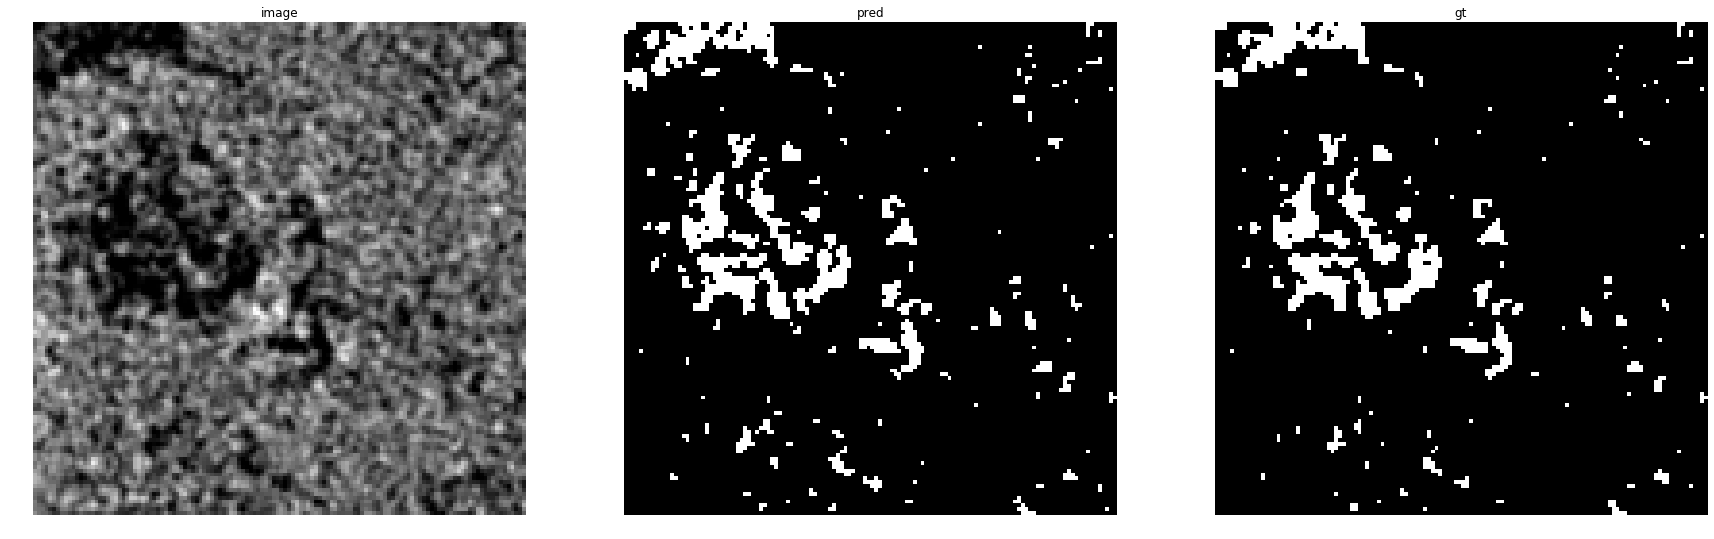

accuracy    : 0.98388671875
precision   : 0.852054794520548
recall      : 0.9628482972136223
f1          : 0.9040697674418606
pr_auc      : 0.9823950676398797
iou         : 0.8249336870026526


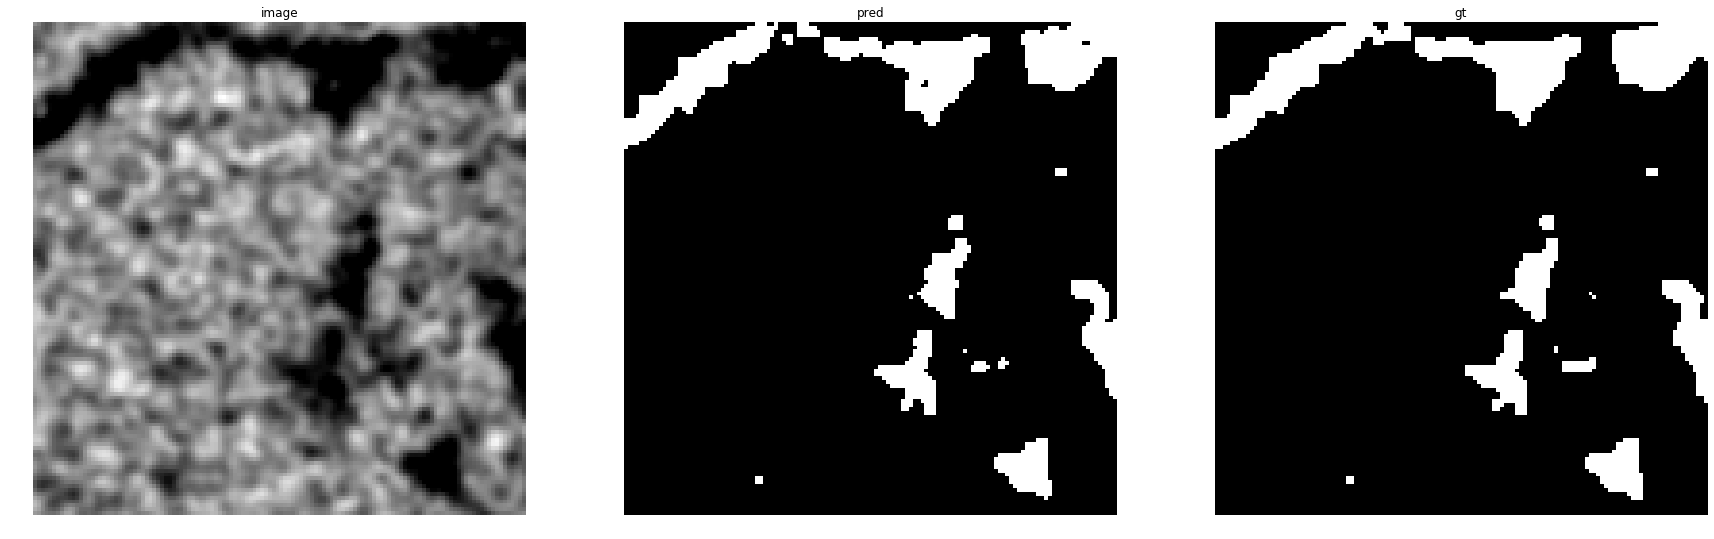

accuracy    : 0.99139404296875
precision   : 0.9946062567421791
recall      : 0.9336708860759494
f1          : 0.9631757639070254
pr_auc      : 0.9970176031001668
iou         : 0.9289672544080605


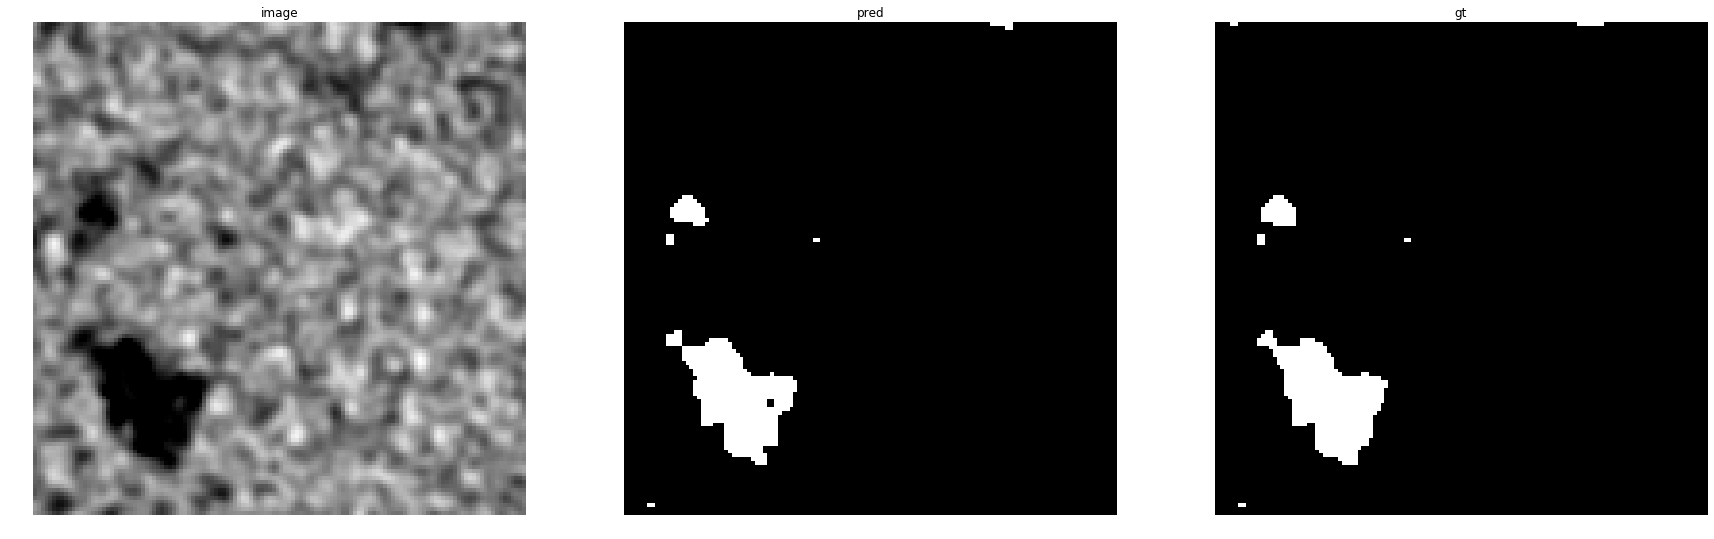

accuracy    : 0.99755859375
precision   : 0.9839228295819936
recall      : 0.9532710280373832
f1          : 0.9683544303797469
pr_auc      : 0.9959404520216595
iou         : 0.9386503067484663


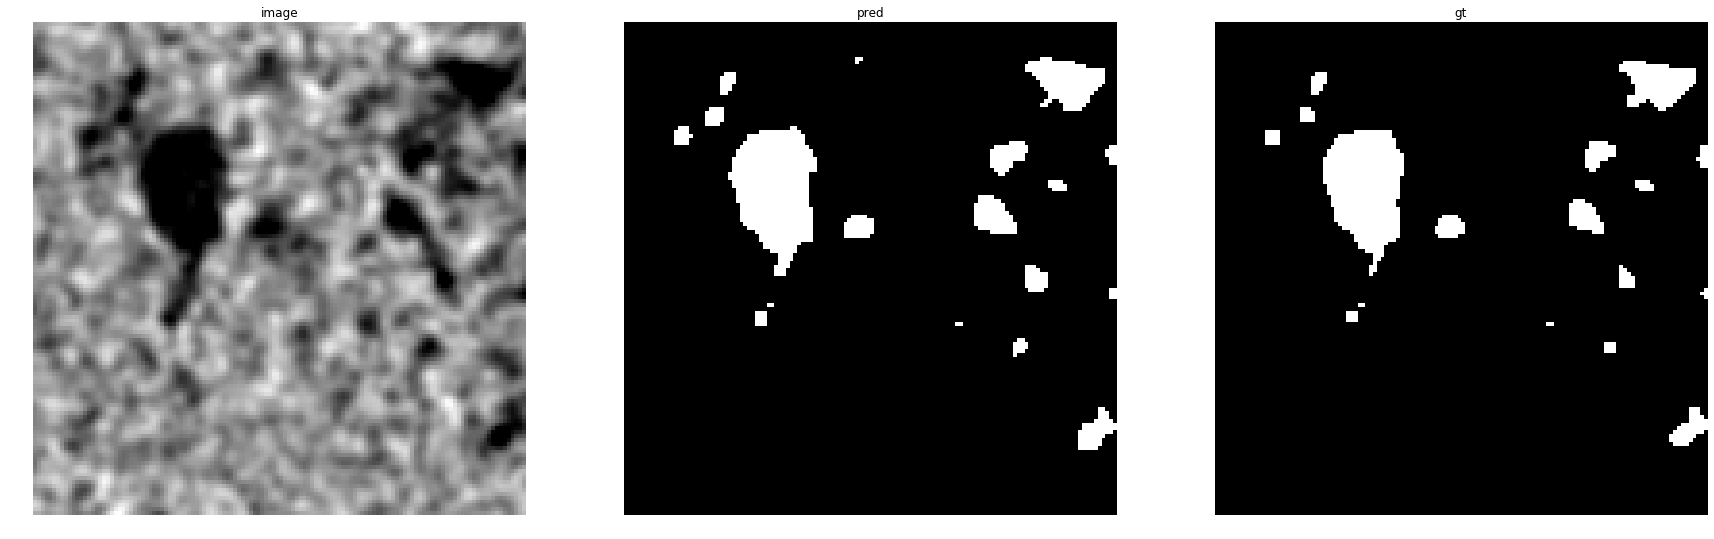

accuracy    : 0.98773193359375
precision   : 0.8473998294970162
recall      : 0.9783464566929134
f1          : 0.9081772498857926
pr_auc      : 0.9885226688648328
iou         : 0.8317991631799163


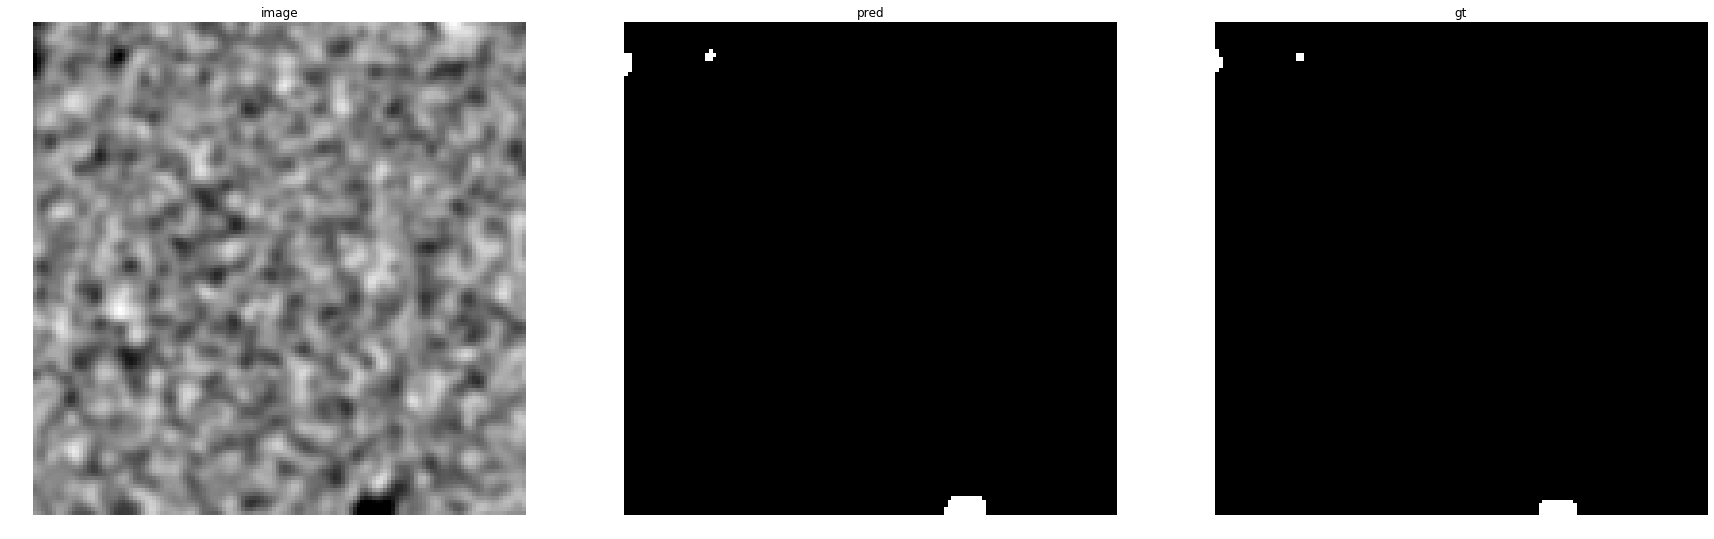

accuracy    : 0.9989013671875
precision   : 0.746268656716418
recall      : 0.9803921568627451
f1          : 0.847457627118644
pr_auc      : 0.9939237233354883
iou         : 0.7352941176470589


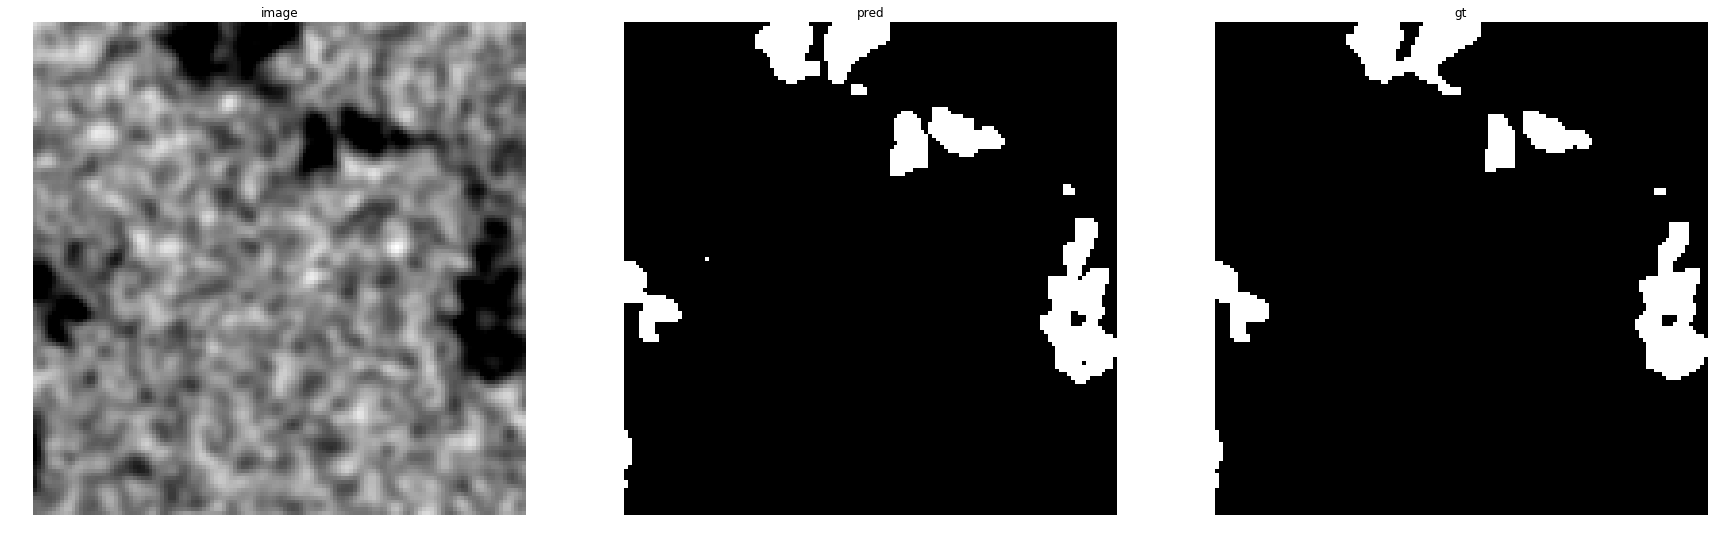

accuracy    : 0.98919677734375
precision   : 0.8953399541634836
recall      : 0.966996699669967
f1          : 0.9297897659658866
pr_auc      : 0.9891041014381826
iou         : 0.8687916975537435


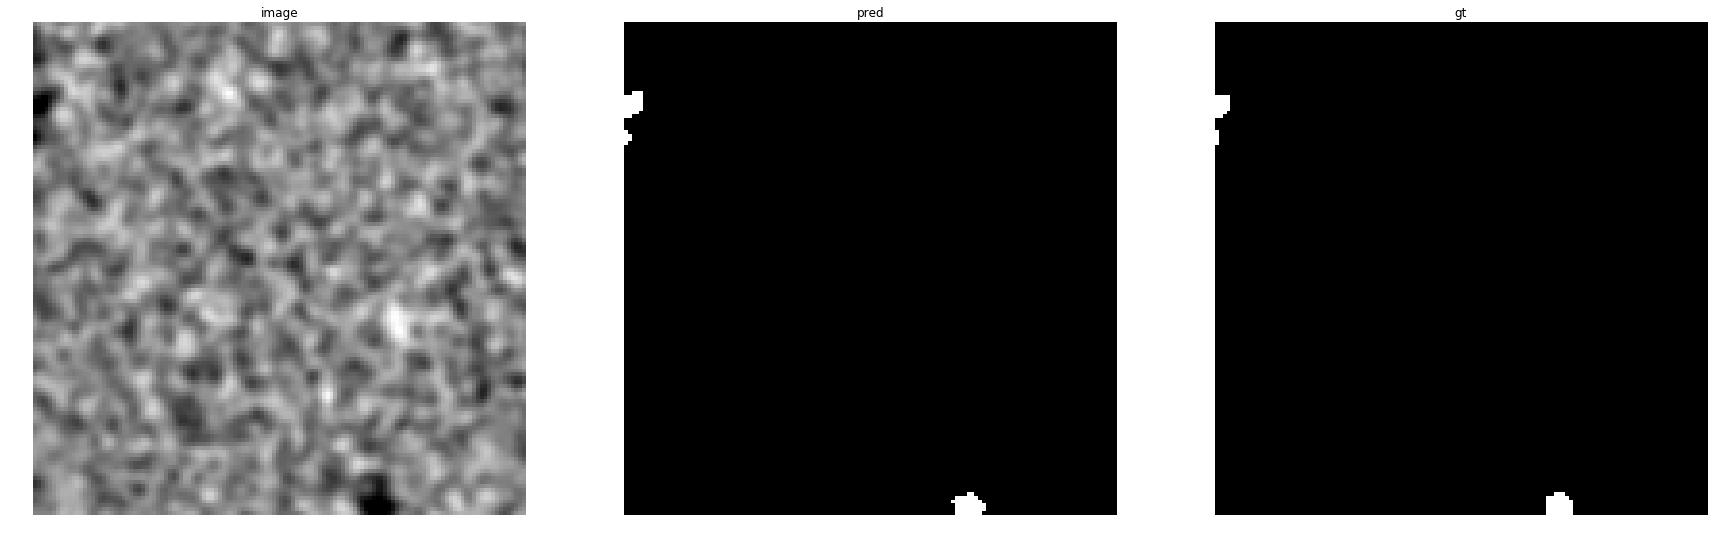

accuracy    : 0.9991455078125
precision   : 0.8243243243243243
recall      : 0.9838709677419355
f1          : 0.8970588235294118
pr_auc      : 0.9796983635880825
iou         : 0.8133333333333334


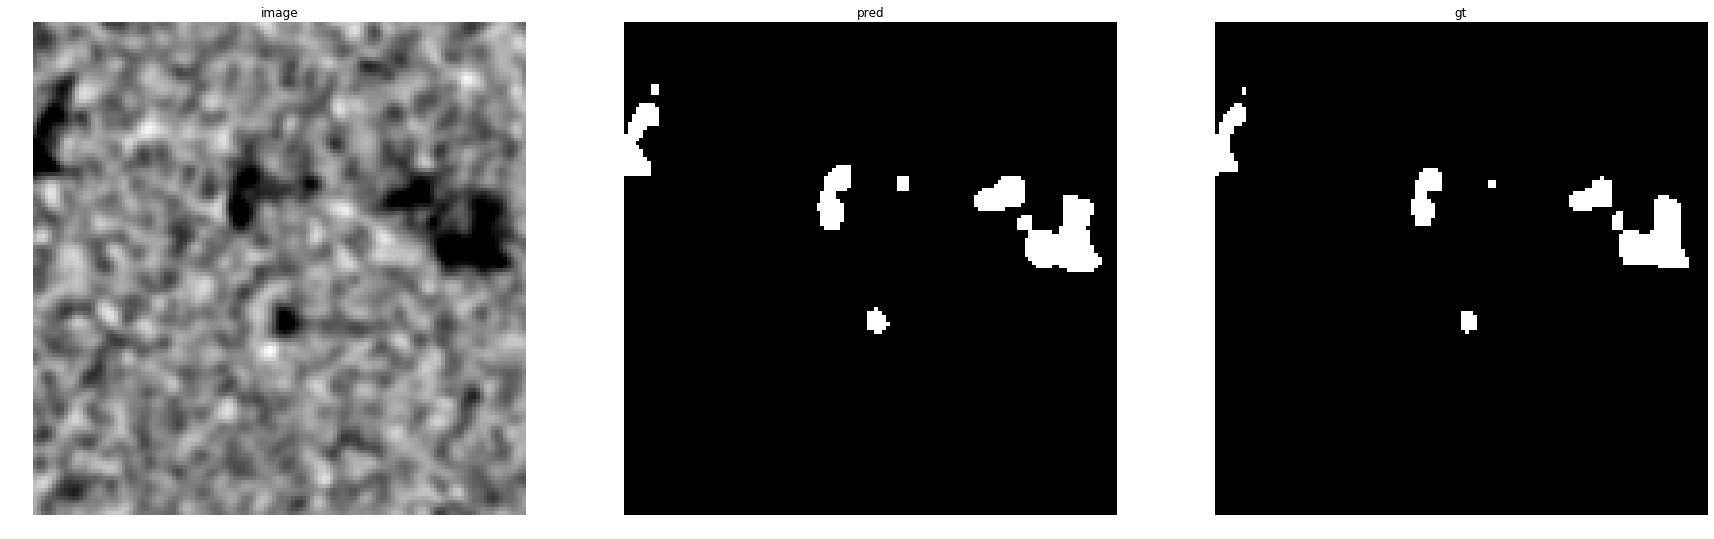

accuracy    : 0.99261474609375
precision   : 0.8040540540540541
recall      : 0.9896049896049897
f1          : 0.8872320596458527
pr_auc      : 0.9876272248426495
iou         : 0.7973199329983249


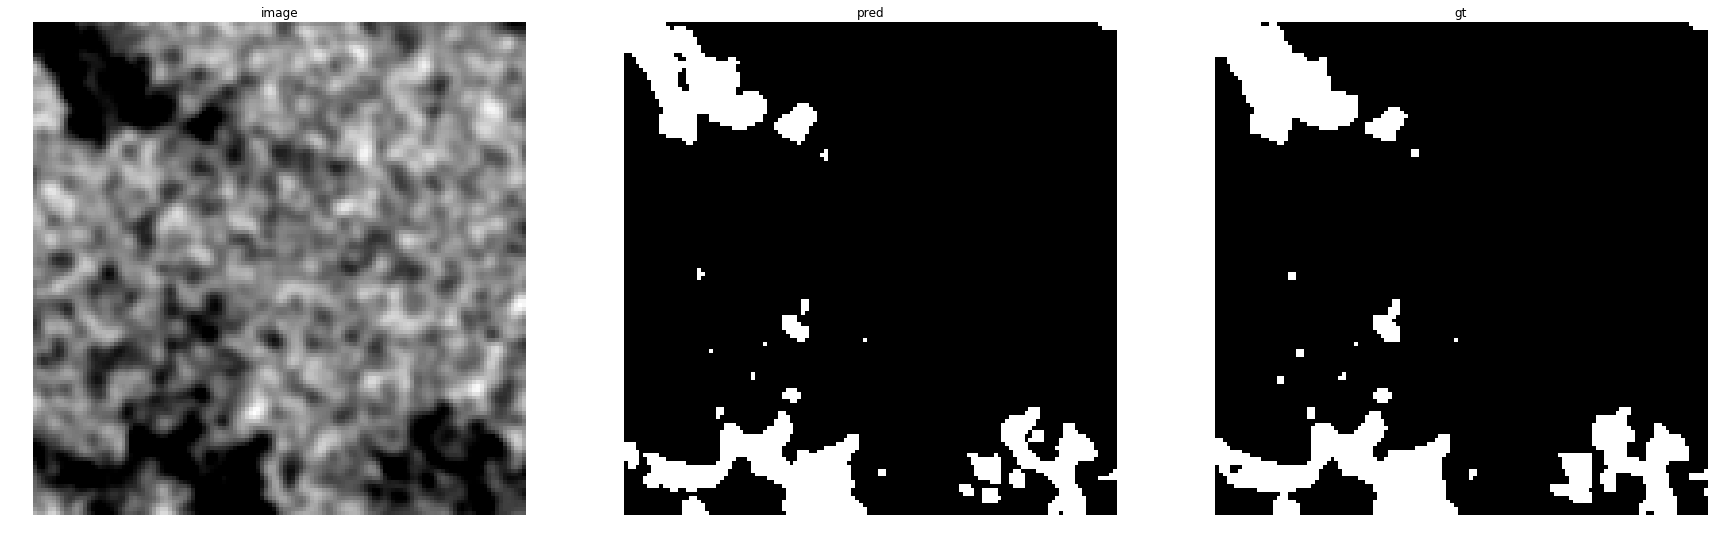

accuracy    : 0.986083984375
precision   : 0.9873484449130205
recall      : 0.9017814155031295
f1          : 0.9426270759939608
pr_auc      : 0.9938035447693205
iou         : 0.8914802475011899


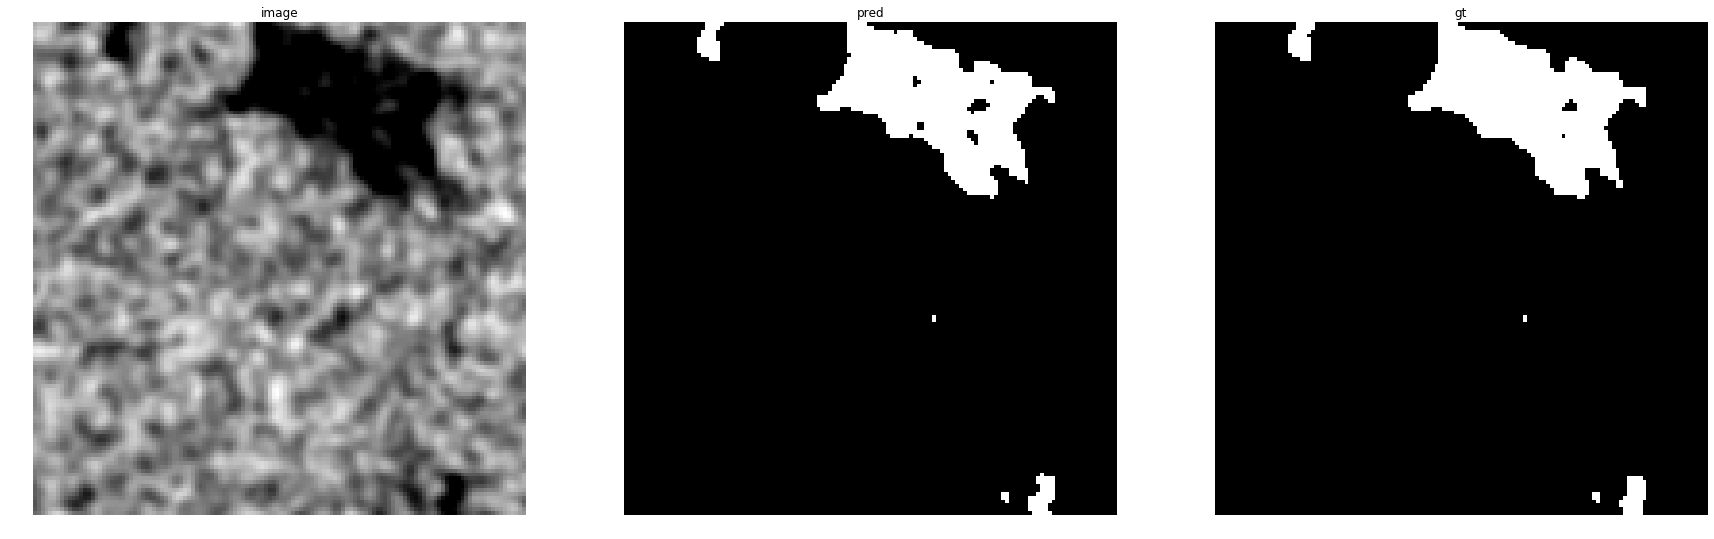

accuracy    : 0.99554443359375
precision   : 0.995774647887324
recall      : 0.9547602970965564
f1          : 0.9748362633574631
pr_auc      : 0.9987321432664534
iou         : 0.9509078681909886


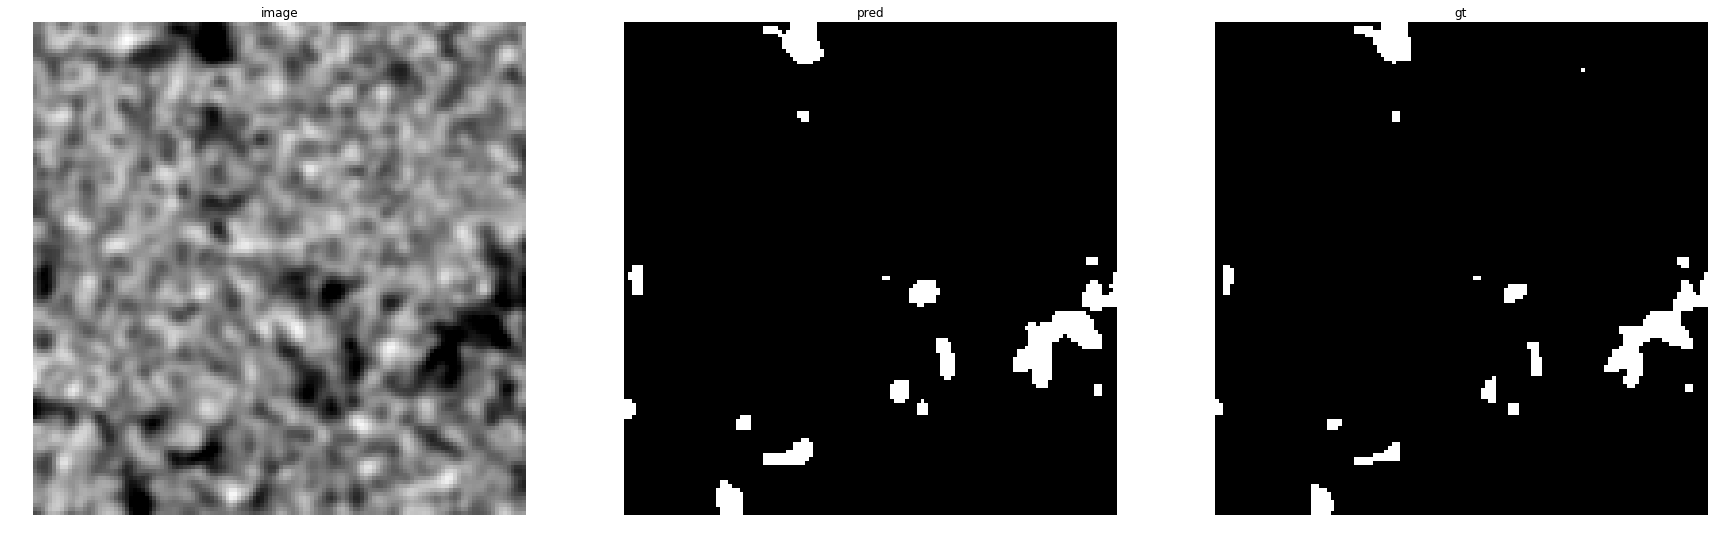

accuracy    : 0.990966796875
precision   : 0.8011958146487295
recall      : 0.9727767695099818
f1          : 0.8786885245901639
pr_auc      : 0.9762338804531858
iou         : 0.783625730994152


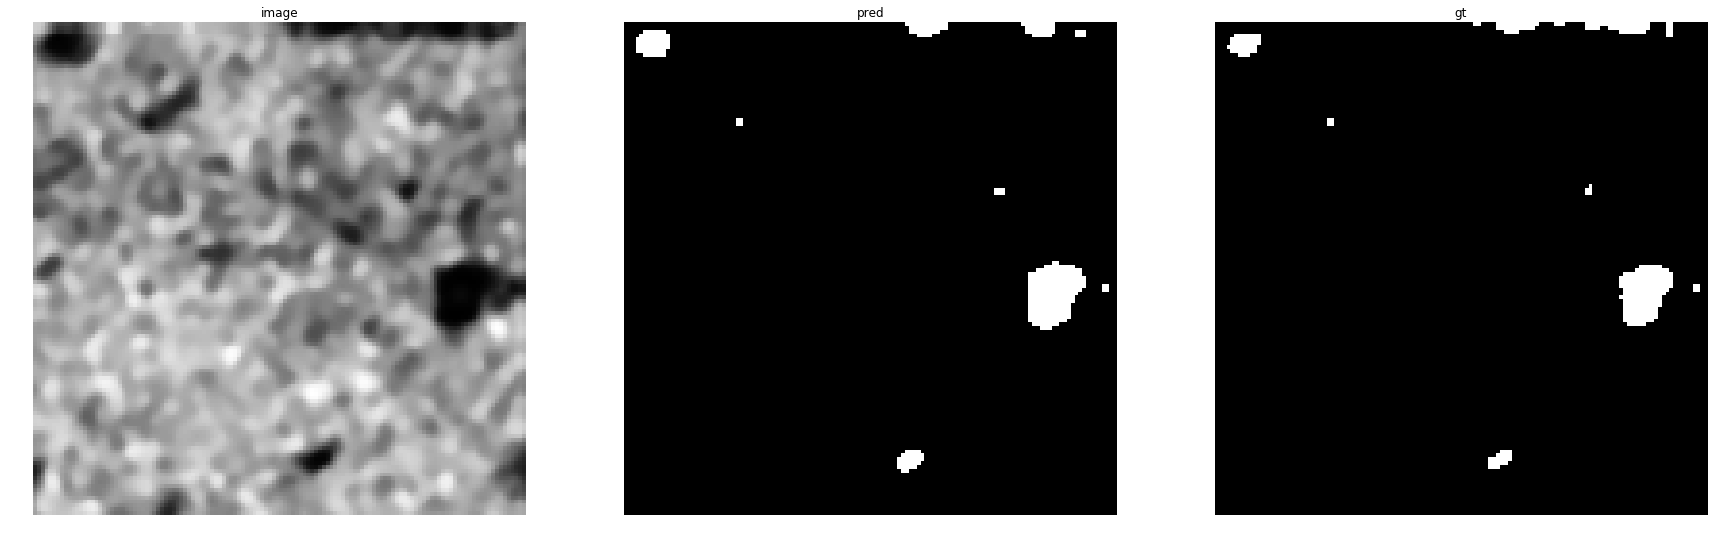

accuracy    : 0.993896484375
precision   : 0.7967032967032966
recall      : 0.9177215189873418
f1          : 0.8529411764705882
pr_auc      : 0.9647891588087744
iou         : 0.7435897435897436


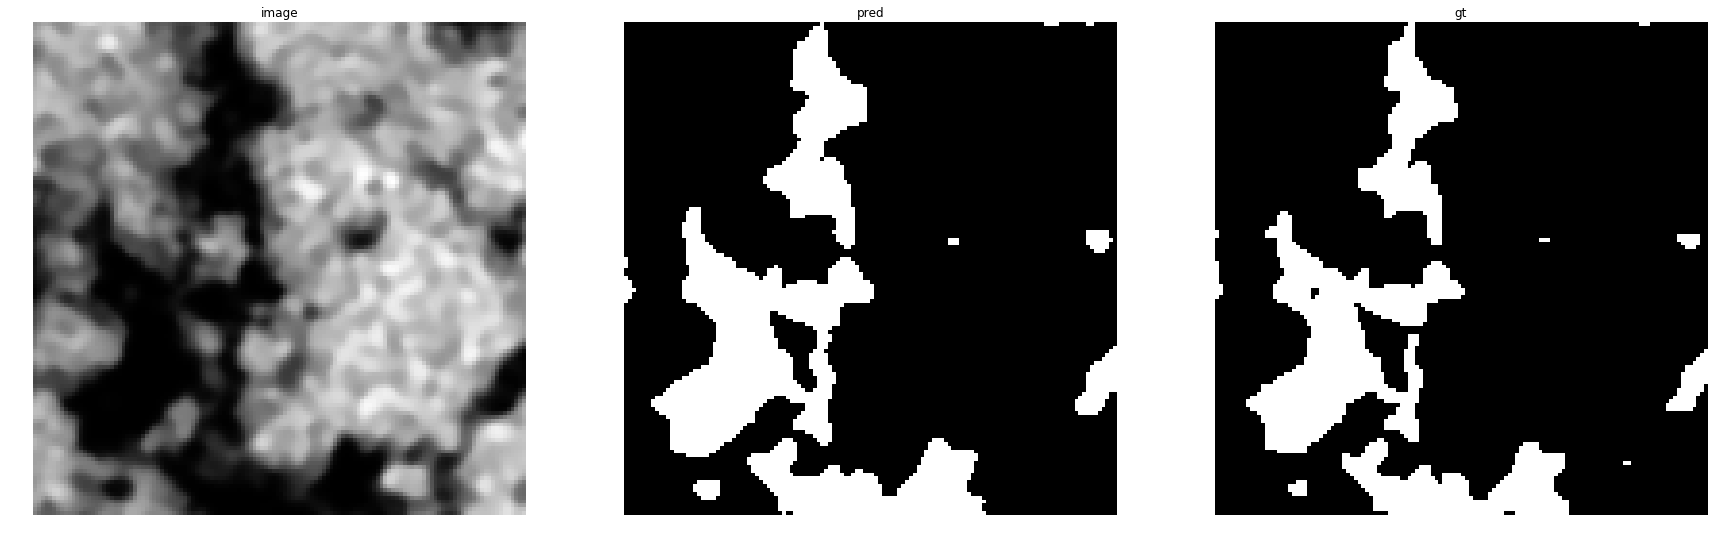

accuracy    : 0.97149658203125
precision   : 0.8606004901960784
recall      : 0.9957461892945764
f1          : 0.923253903040263
pr_auc      : 0.9966266917138354
iou         : 0.8574481074481074


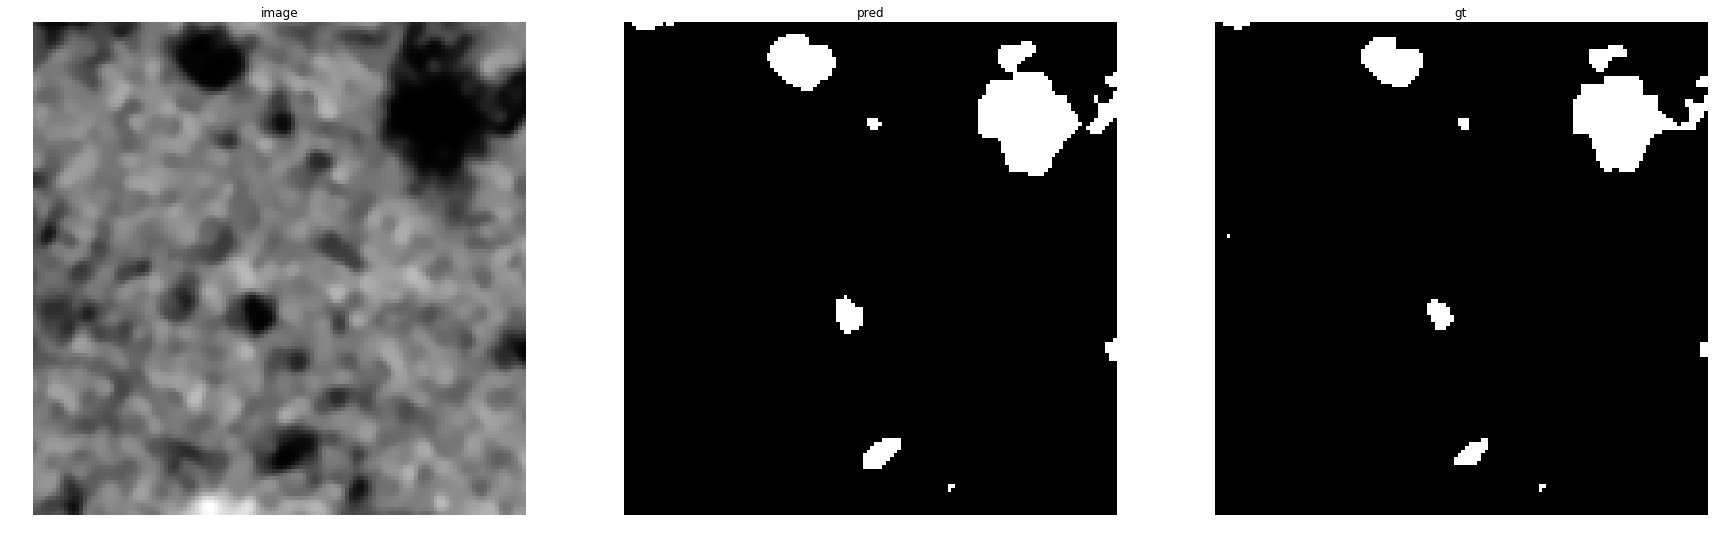

accuracy    : 0.98968505859375
precision   : 0.824945295404814
recall      : 0.9882044560943644
f1          : 0.8992248062015503
pr_auc      : 0.9907977323127886
iou         : 0.8169014084507042


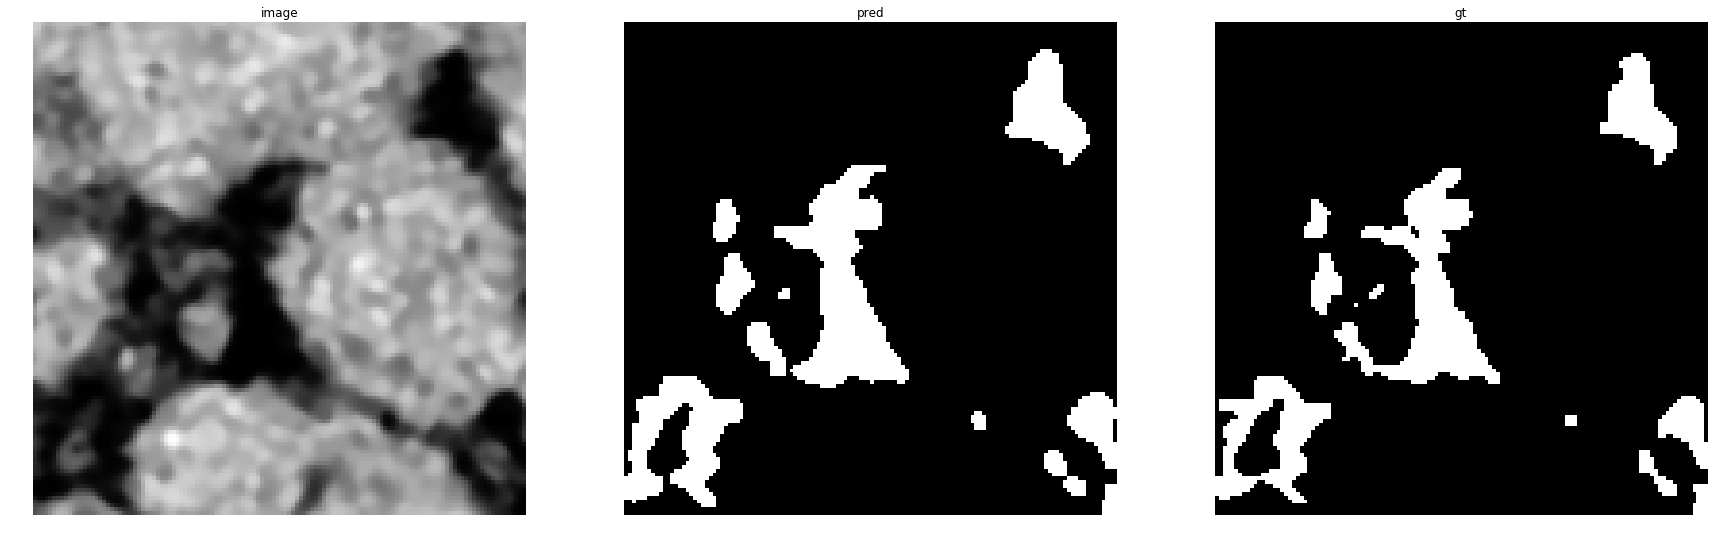

accuracy    : 0.9752197265625
precision   : 0.8377077865266842
recall      : 0.982051282051282
f1          : 0.9041548630783758
pr_auc      : 0.9903133953822318
iou         : 0.8250753985351141


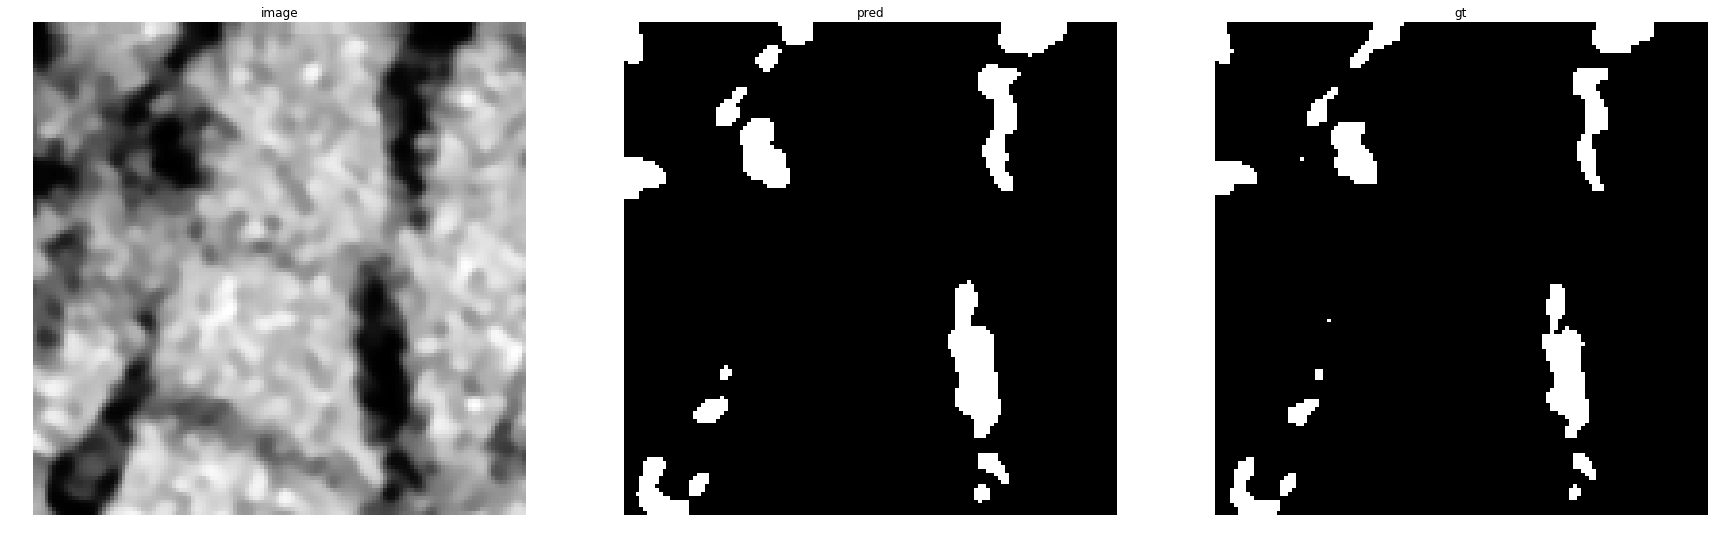

accuracy    : 0.98443603515625
precision   : 0.816793893129771
recall      : 0.9861751152073732
f1          : 0.893528183716075
pr_auc      : 0.9886632408832086
iou         : 0.8075471698113208


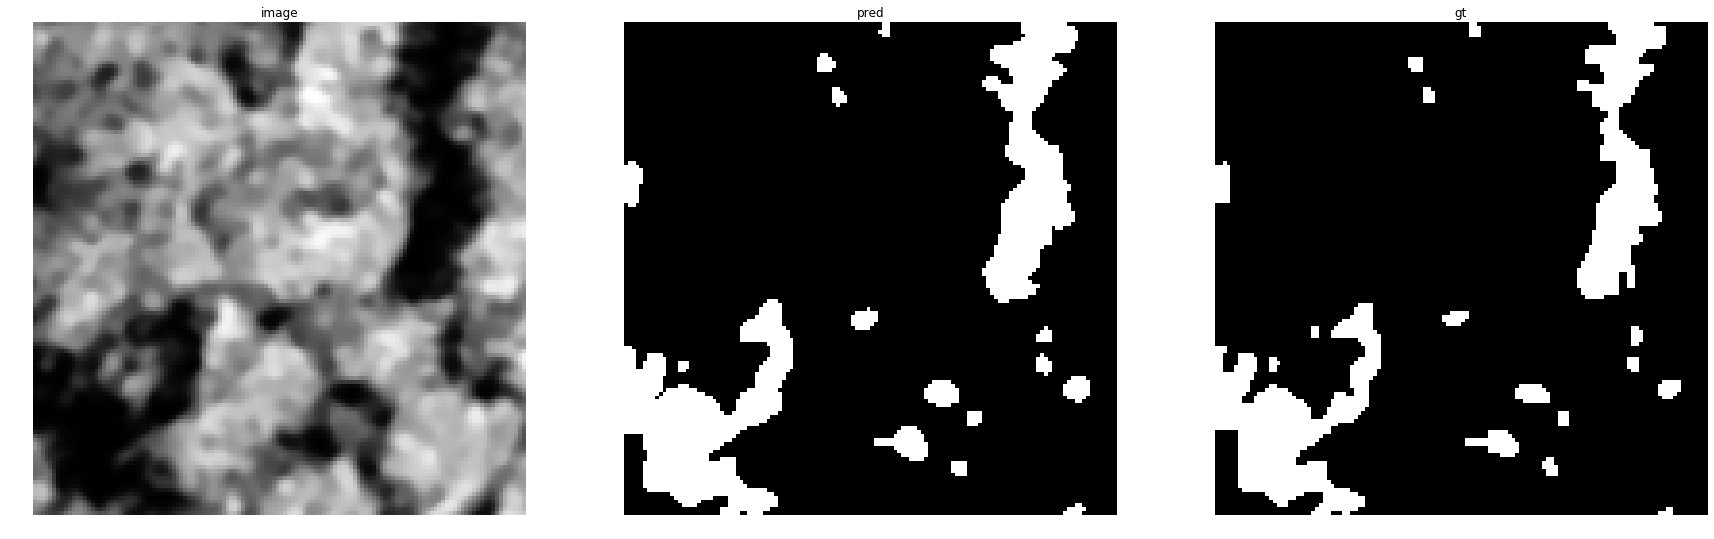

accuracy    : 0.9757080078125
precision   : 0.8502435064935064
recall      : 0.986346516007533
f1          : 0.9132519616390584
pr_auc      : 0.9929985336114883
iou         : 0.8403529883674288


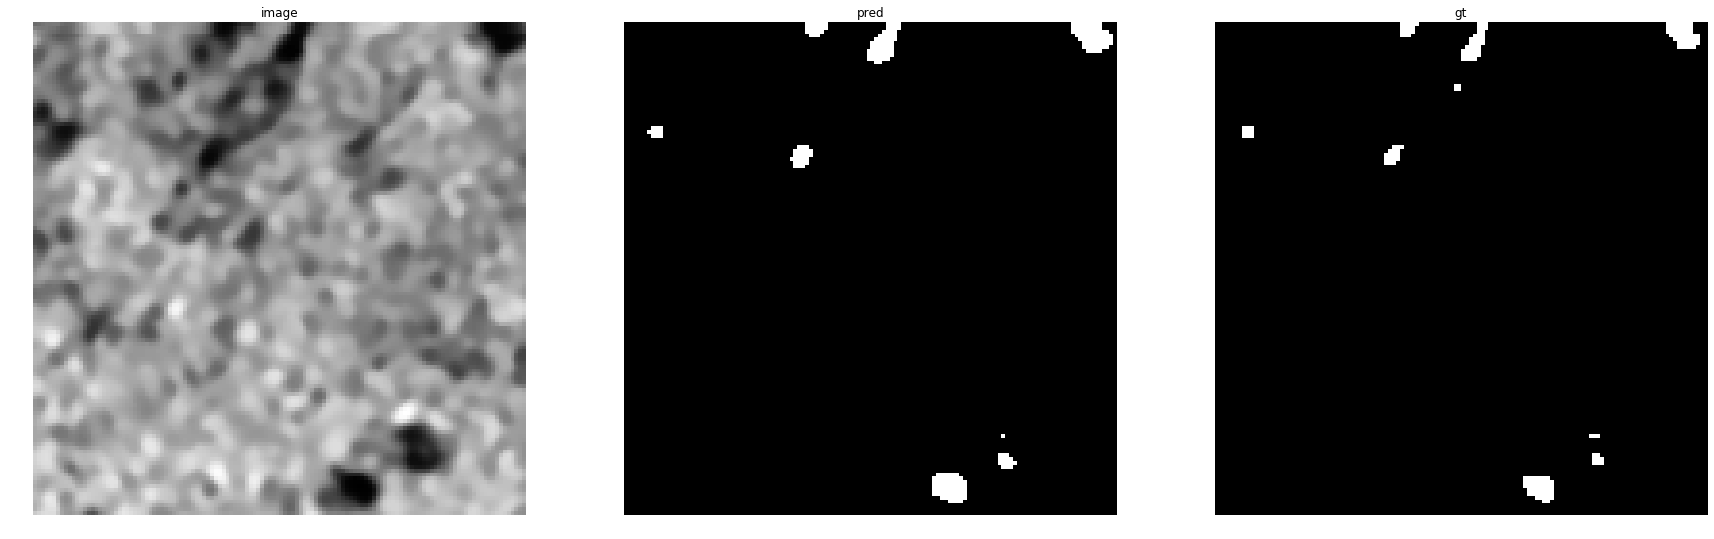

accuracy    : 0.9949951171875
precision   : 0.7035573122529645
recall      : 0.9621621621621622
f1          : 0.812785388127854
pr_auc      : 0.9626061588392075
iou         : 0.6846153846153846


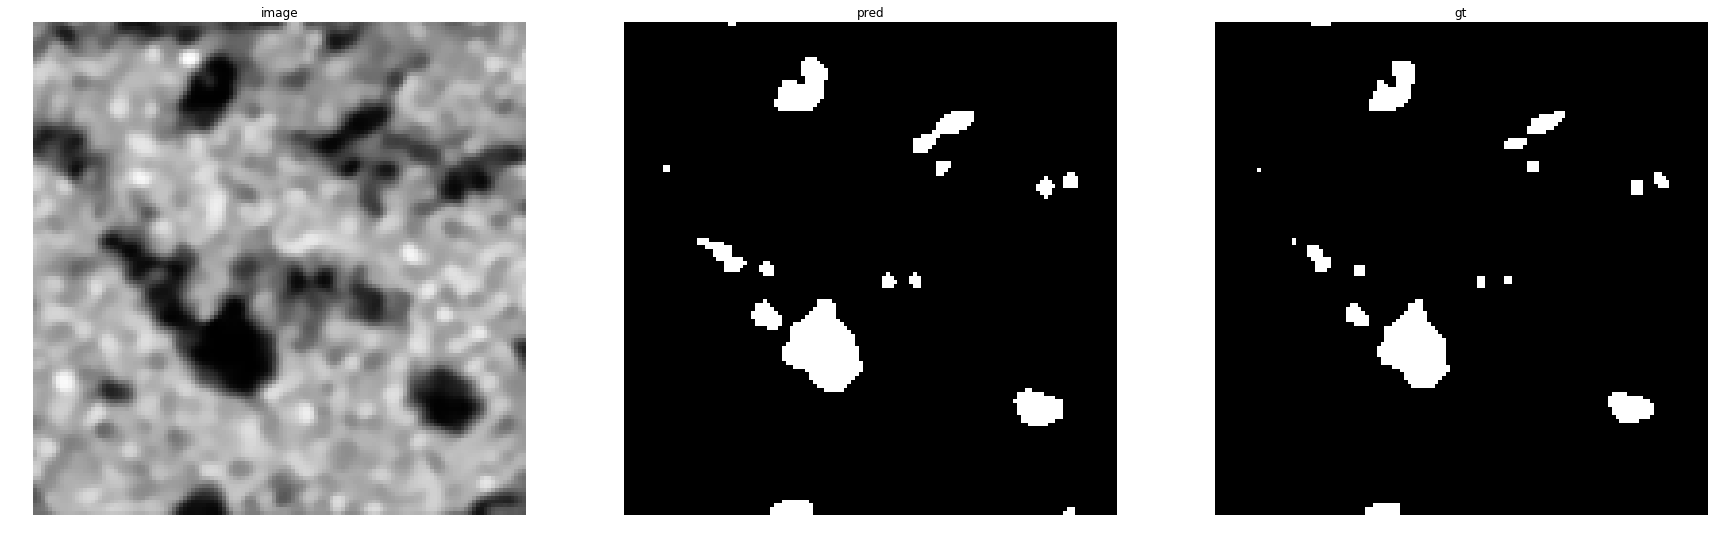

accuracy    : 0.98760986328125
precision   : 0.7582017010935601
recall      : 0.9936305732484076
f1          : 0.8600964851826327
pr_auc      : 0.9889207072265498
iou         : 0.75453446191052


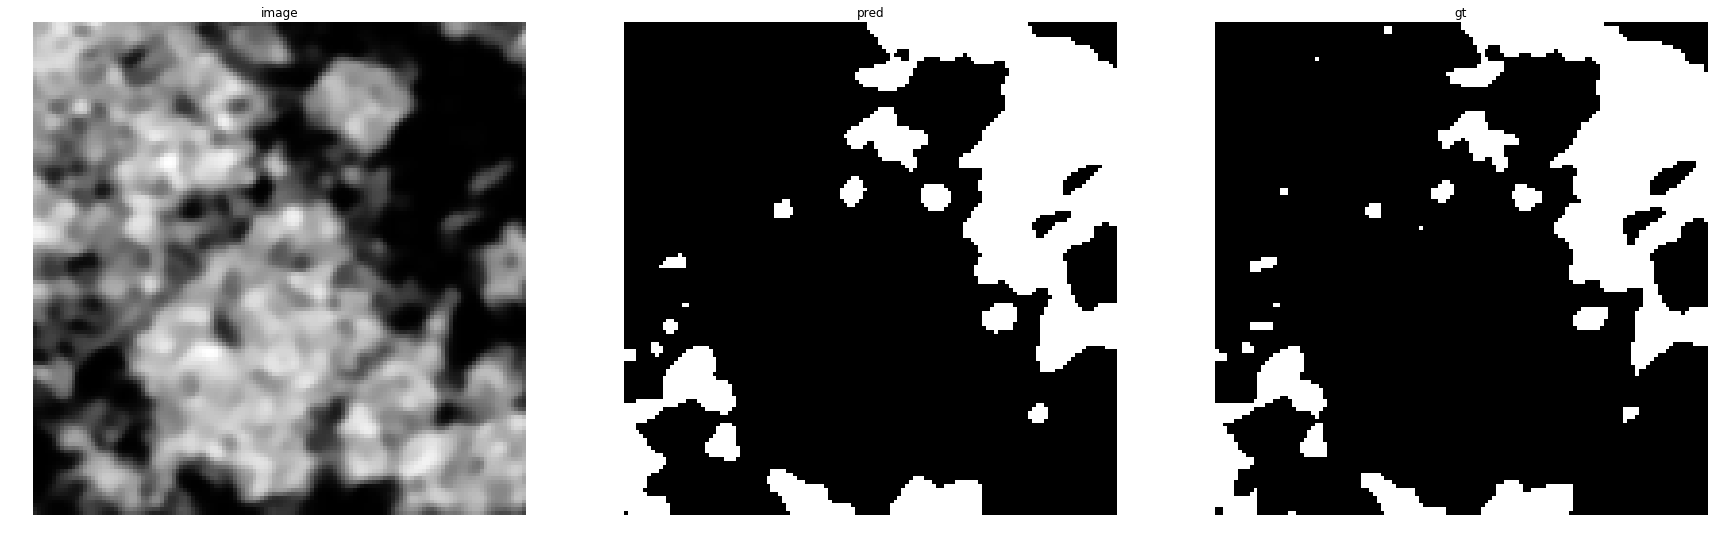

accuracy    : 0.97064208984375
precision   : 0.8841649694501018
recall      : 0.9925693055158616
f1          : 0.9352362999865356
pr_auc      : 0.9968639177075458
iou         : 0.8783510369246332


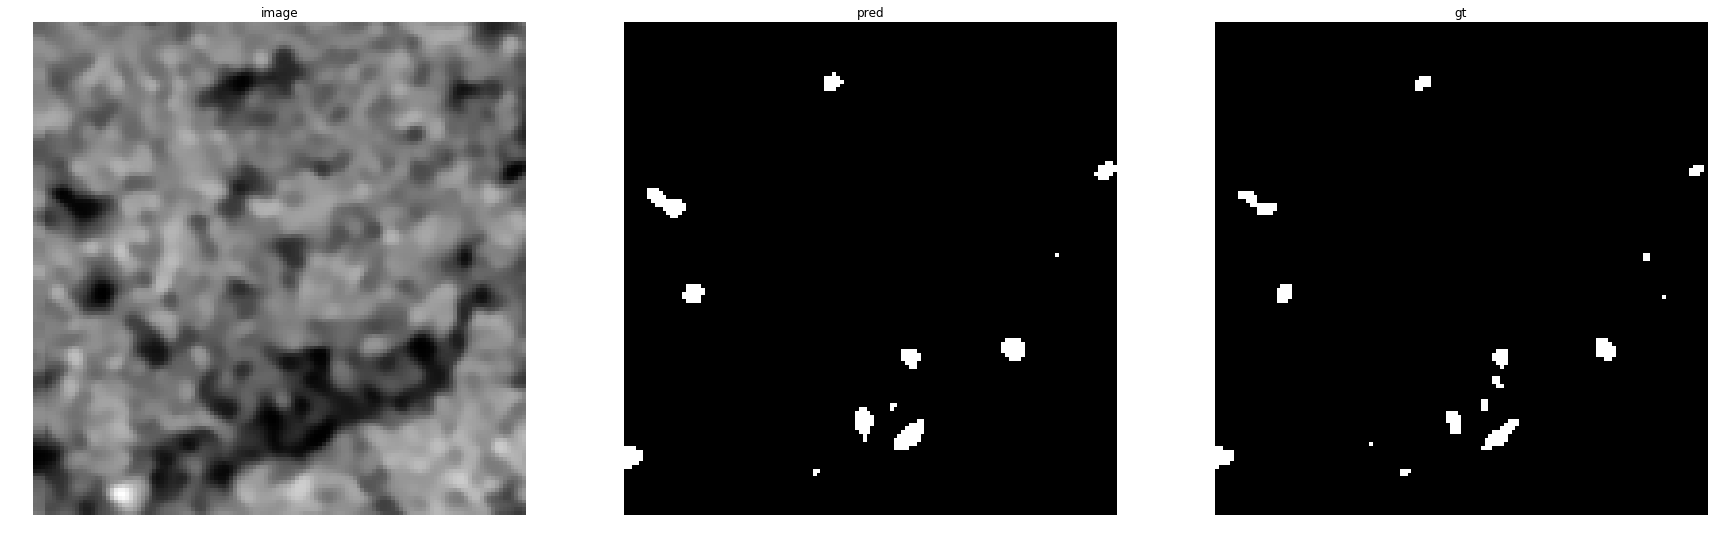

accuracy    : 0.99505615234375
precision   : 0.7529880478087649
recall      : 0.9086538461538461
f1          : 0.8235294117647058
pr_auc      : 0.9384849146070644
iou         : 0.7


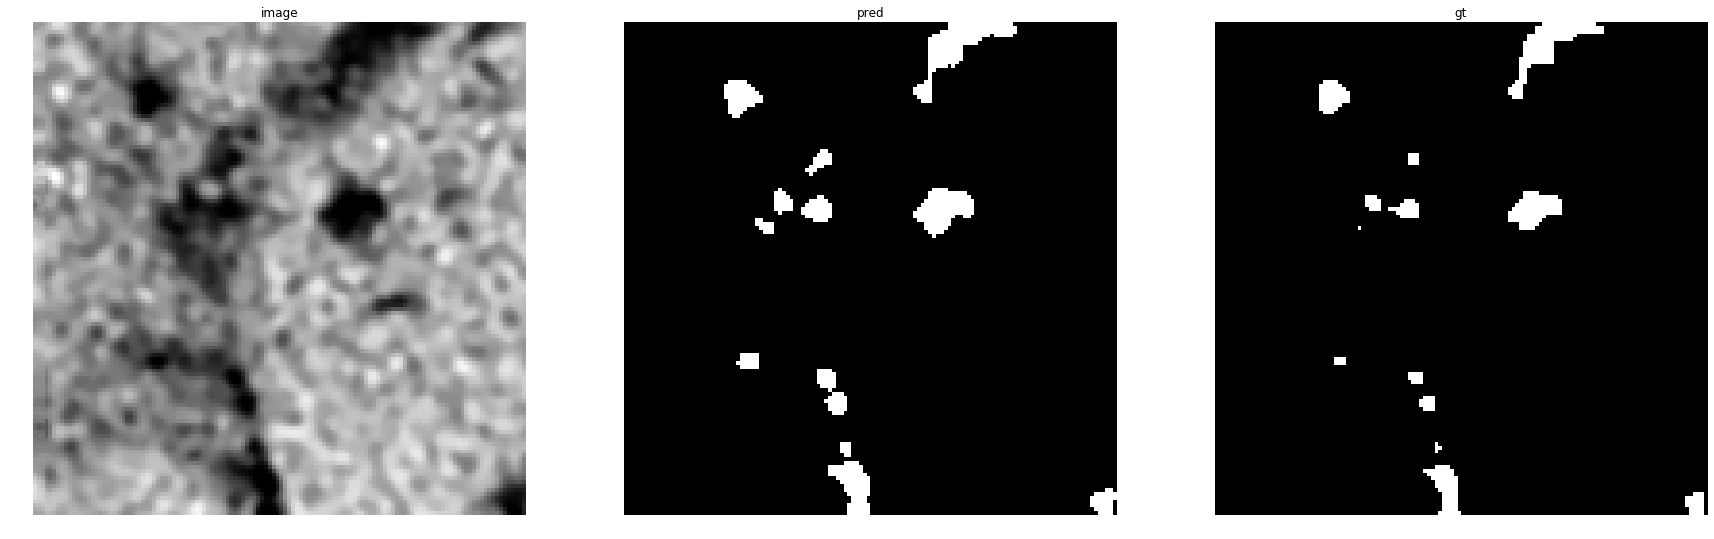

accuracy    : 0.98663330078125
precision   : 0.689051094890511
recall      : 0.9874476987447699
f1          : 0.8116938950988822
pr_auc      : 0.9797113338433149
iou         : 0.683068017366136


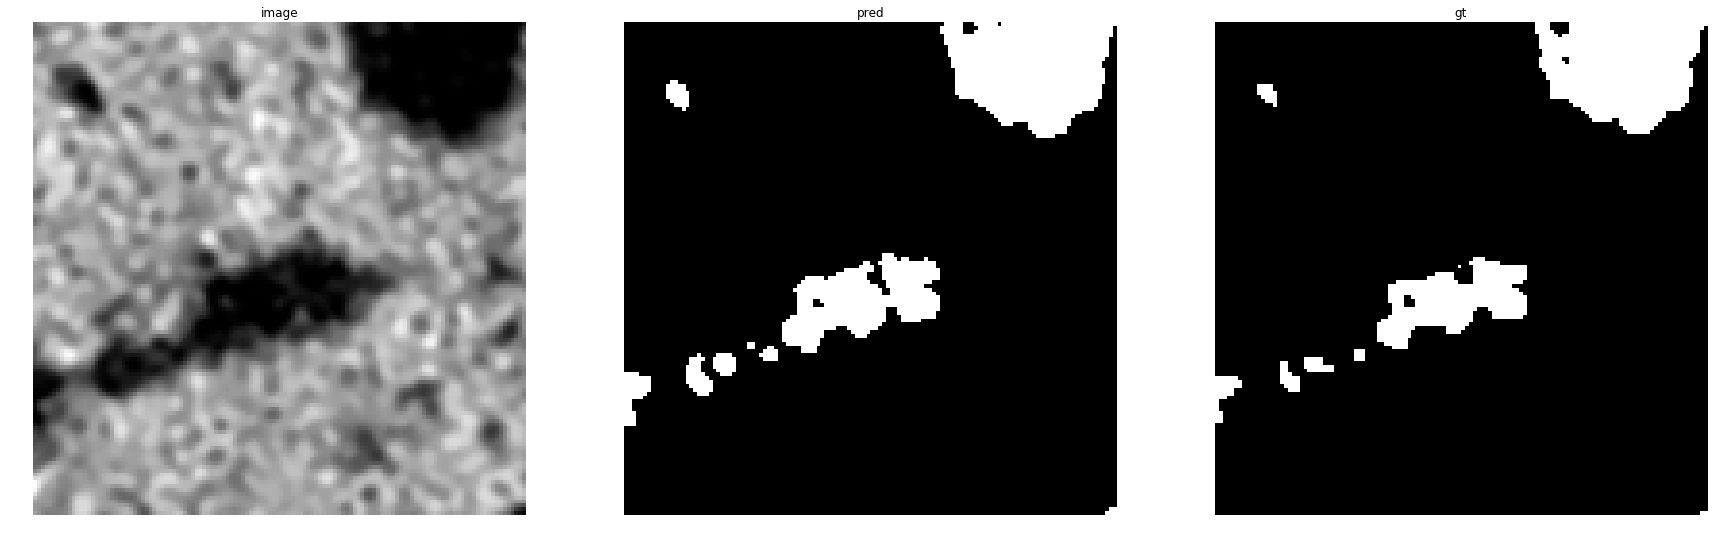

accuracy    : 0.9849853515625
precision   : 0.8713646532438478
recall      : 0.9898348157560356
f1          : 0.9268292682926829
pr_auc      : 0.9951639623416493
iou         : 0.8636363636363636


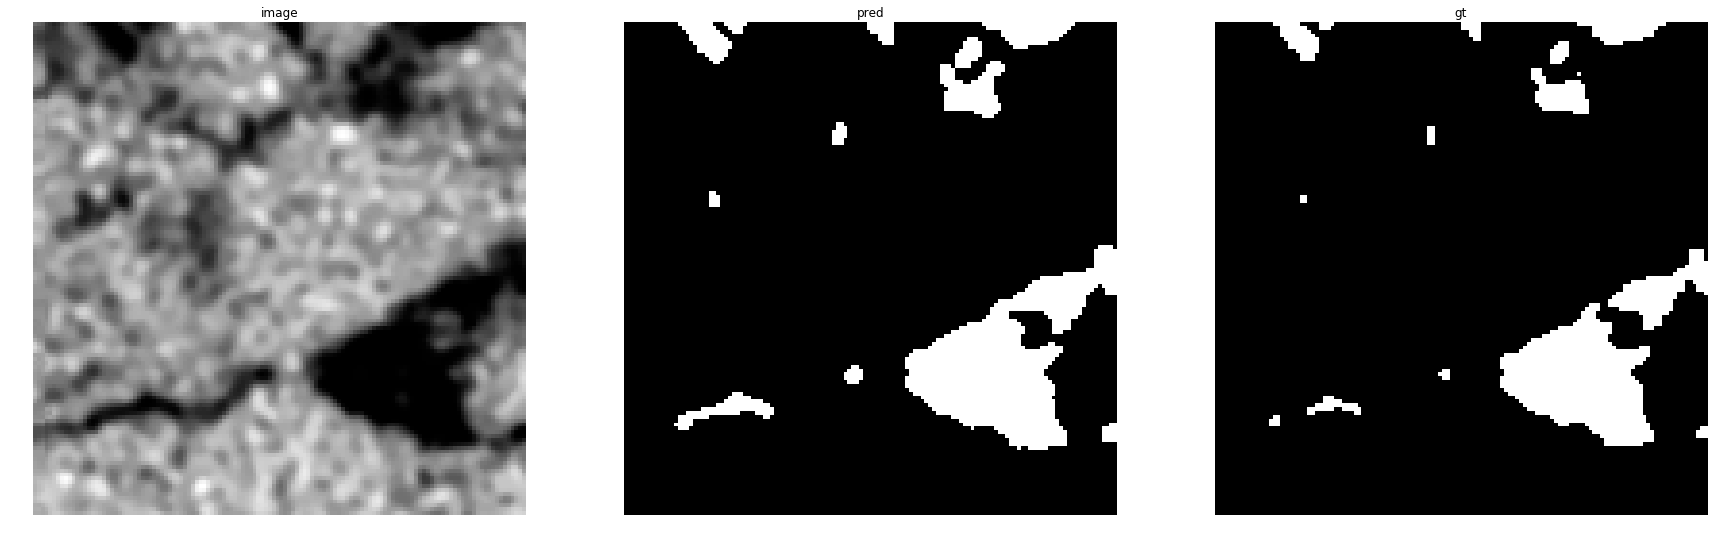

accuracy    : 0.97845458984375
precision   : 0.8069983597594313
recall      : 1.0
f1          : 0.8931921331316188
pr_auc      : 0.996382595942809
iou         : 0.8069983597594313


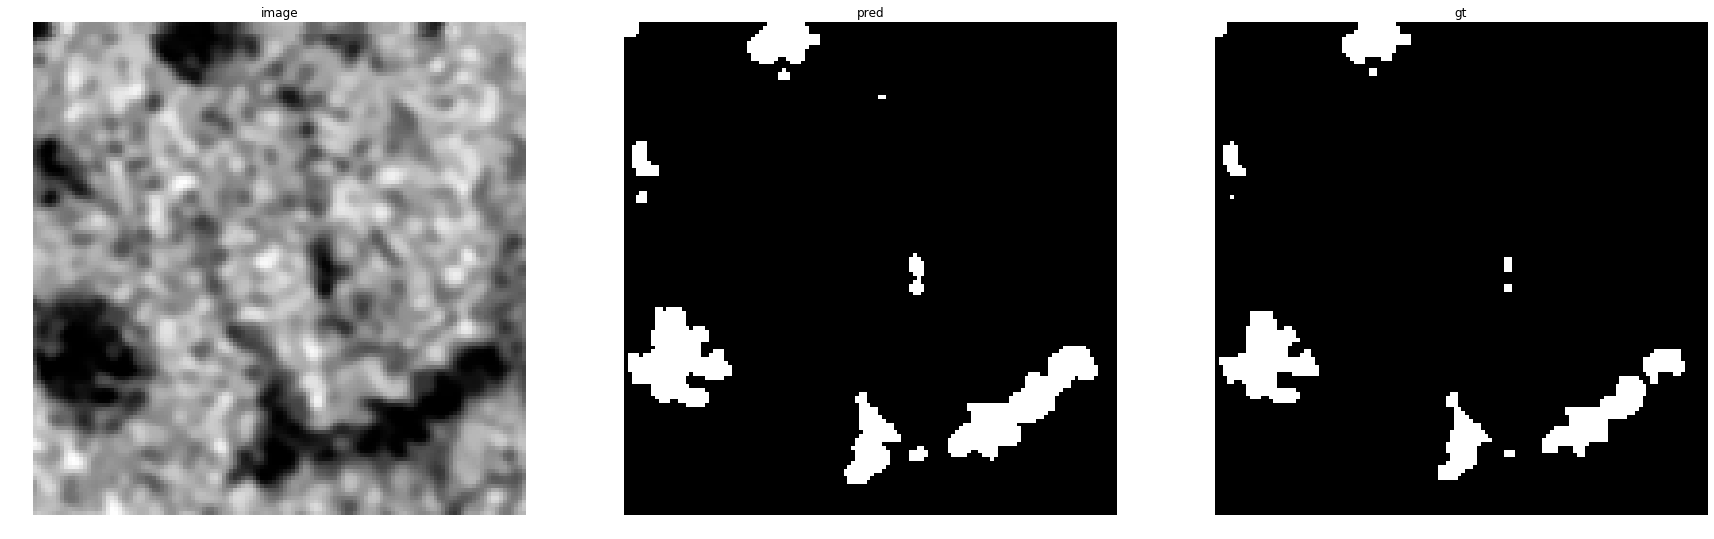

accuracy    : 0.98175048828125
precision   : 0.766109785202864
recall      : 0.9948347107438017
f1          : 0.8656179775280899
pr_auc      : 0.9886995587113426
iou         : 0.7630744849445324


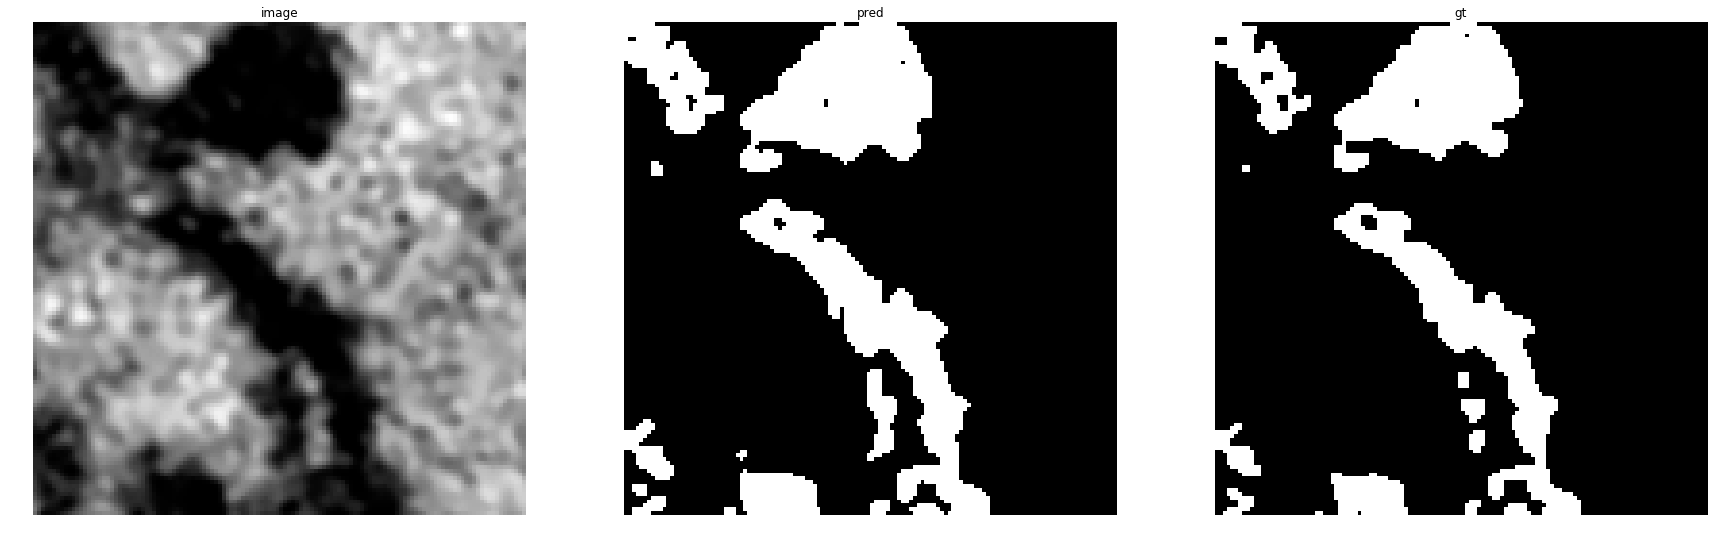

accuracy    : 0.97052001953125
precision   : 0.8623505395158938
recall      : 0.9962938005390836
f1          : 0.9244958574331718
pr_auc      : 0.9958230322830345
iou         : 0.859593023255814


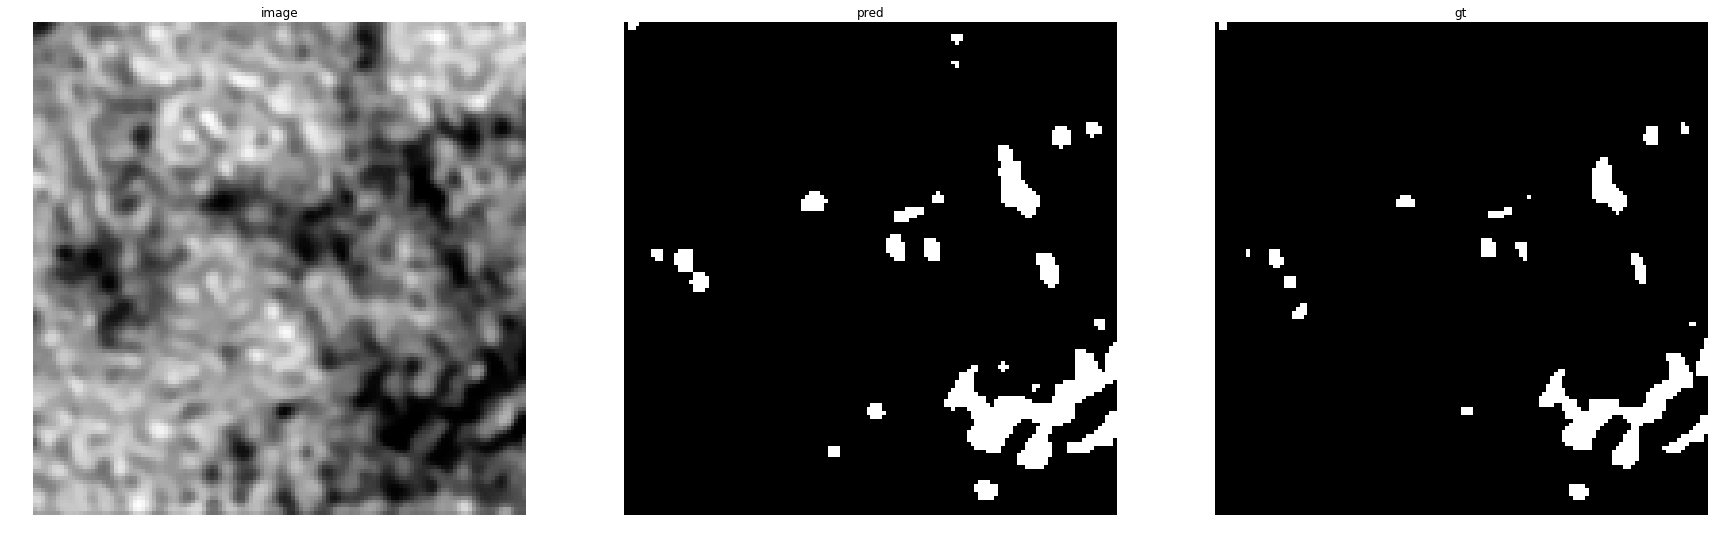

accuracy    : 0.97808837890625
precision   : 0.6532663316582915
recall      : 0.9789156626506024
f1          : 0.7836045810729355
pr_auc      : 0.9757097922270941
iou         : 0.6442021803766105


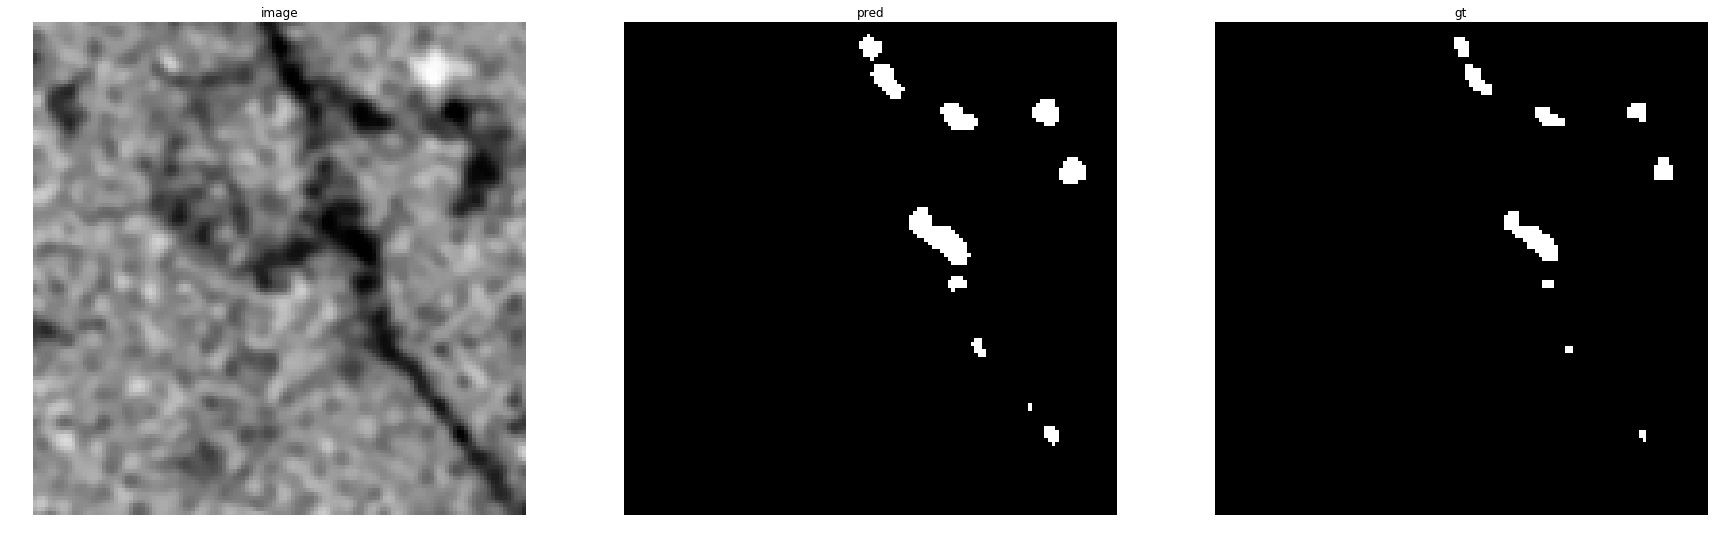

accuracy    : 0.991943359375
precision   : 0.6217765042979942
recall      : 1.0
f1          : 0.7667844522968198
pr_auc      : 0.98479523029401
iou         : 0.6217765042979942


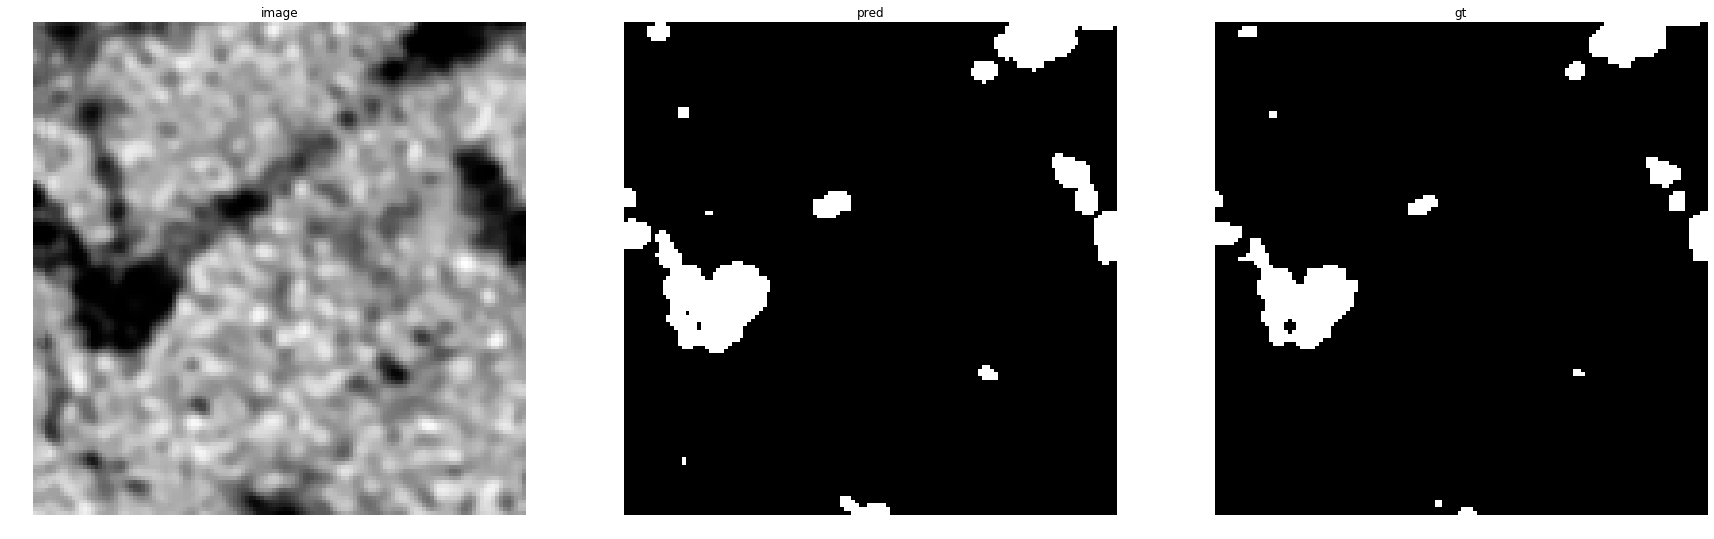

accuracy    : 0.9822998046875
precision   : 0.7528089887640449
recall      : 0.9954285714285714
f1          : 0.857283464566929
pr_auc      : 0.993316104420092
iou         : 0.7502153316106804


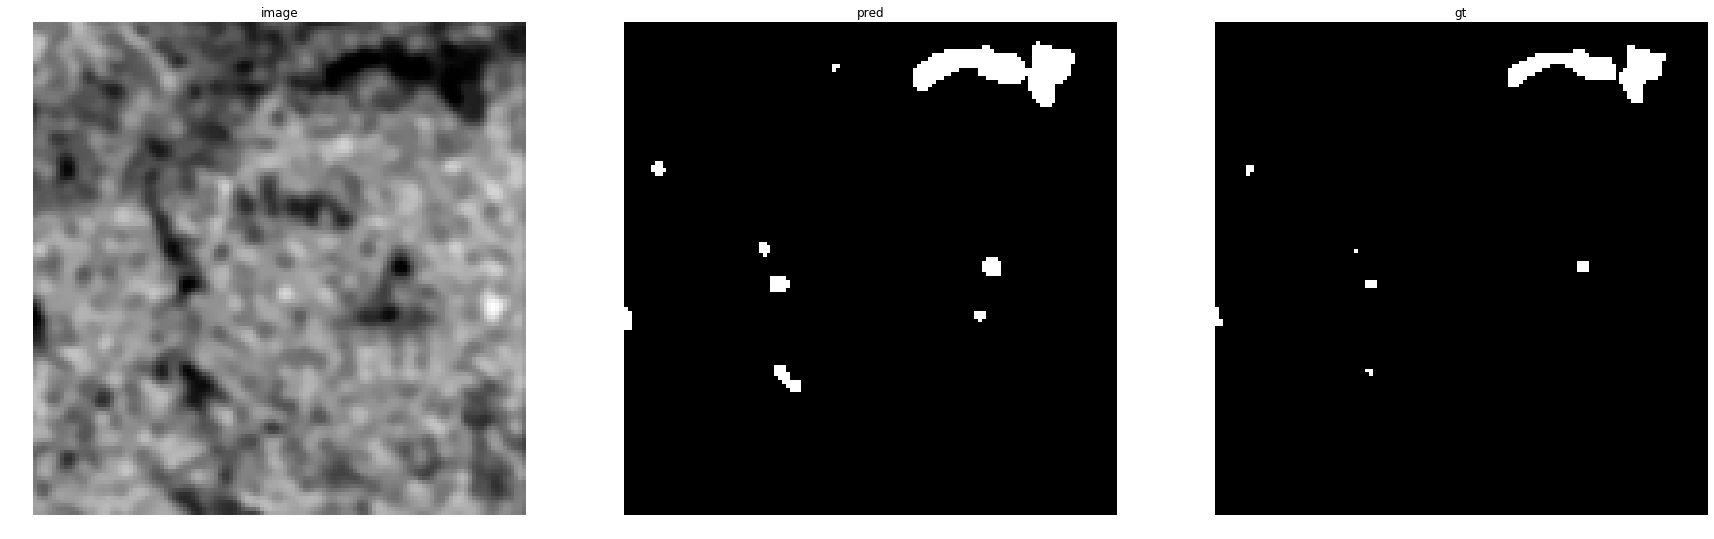

accuracy    : 0.99005126953125
precision   : 0.6312217194570136
recall      : 1.0
f1          : 0.7739251040221914
pr_auc      : 0.9872420009459916
iou         : 0.6312217194570136


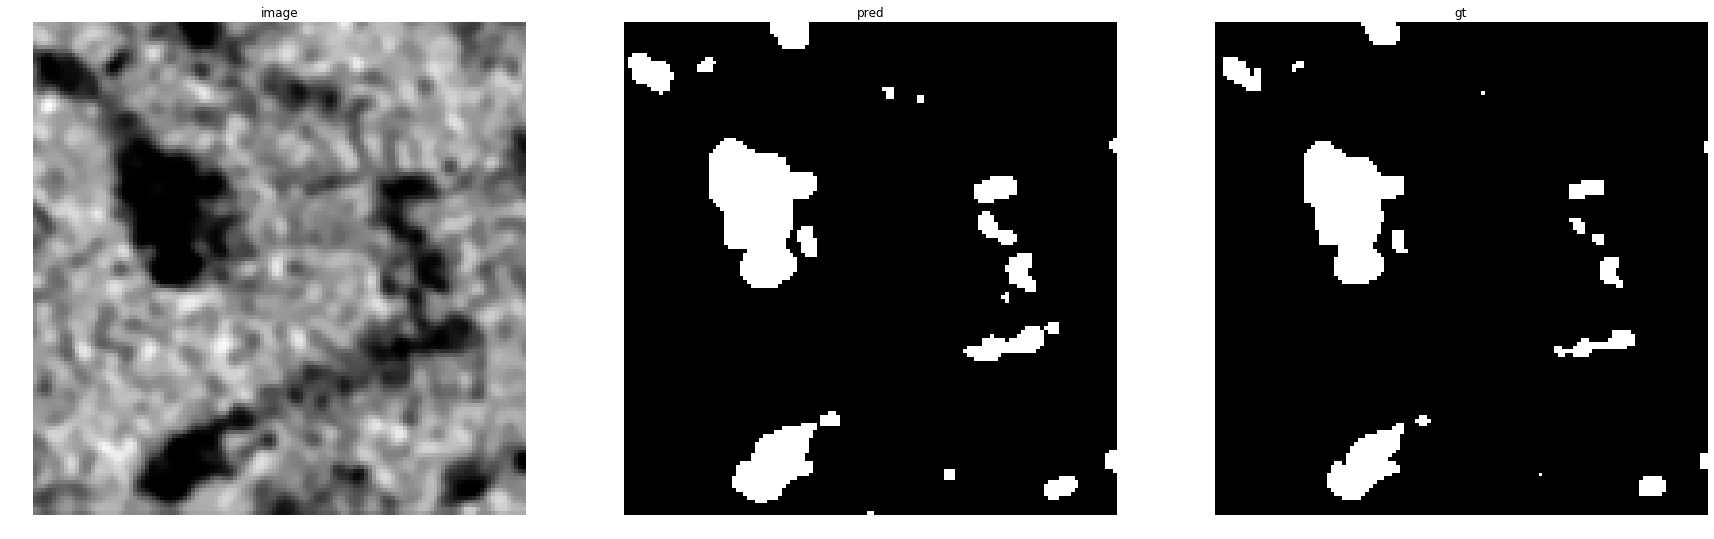

accuracy    : 0.97760009765625
precision   : 0.7600527356624918
recall      : 0.9974048442906575
f1          : 0.8627010849233072
pr_auc      : 0.9934861407979148
iou         : 0.7585526315789474


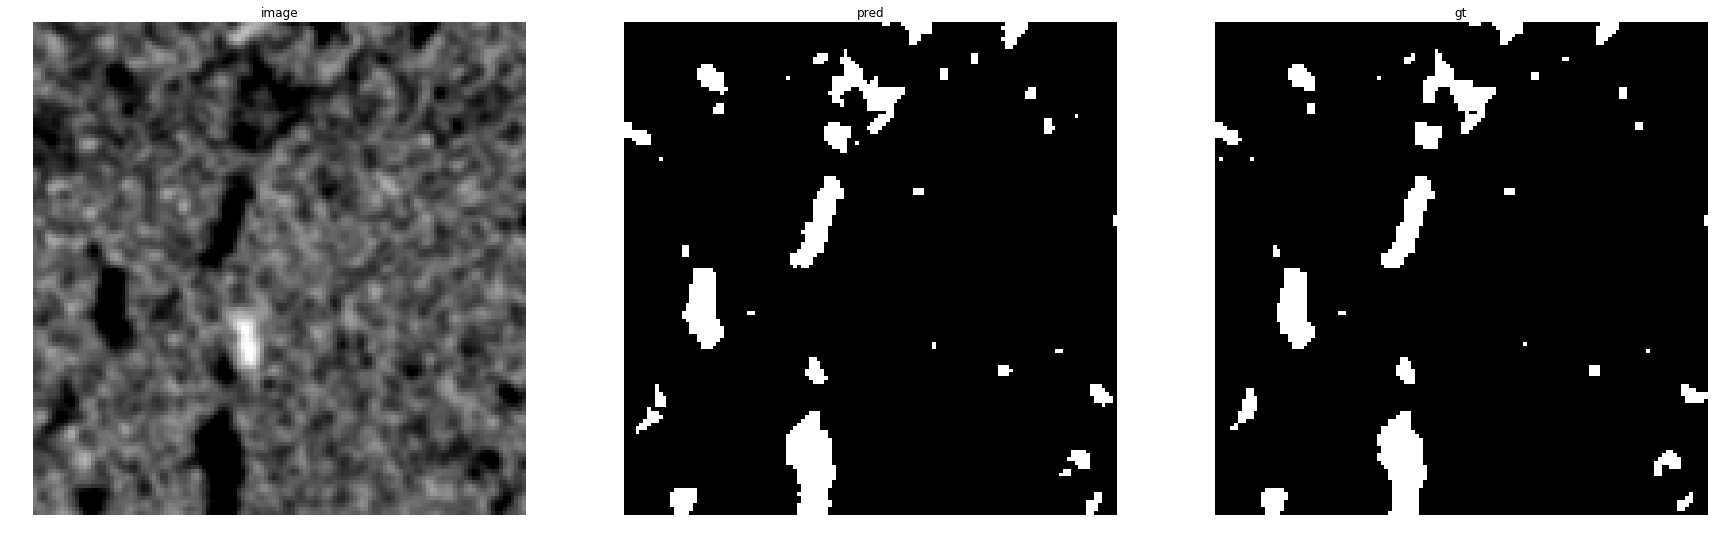

accuracy    : 0.992431640625
precision   : 0.918348623853211
recall      : 0.9662162162162162
f1          : 0.9416745061147695
pr_auc      : 0.9930058148345565
iou         : 0.8897777777777778


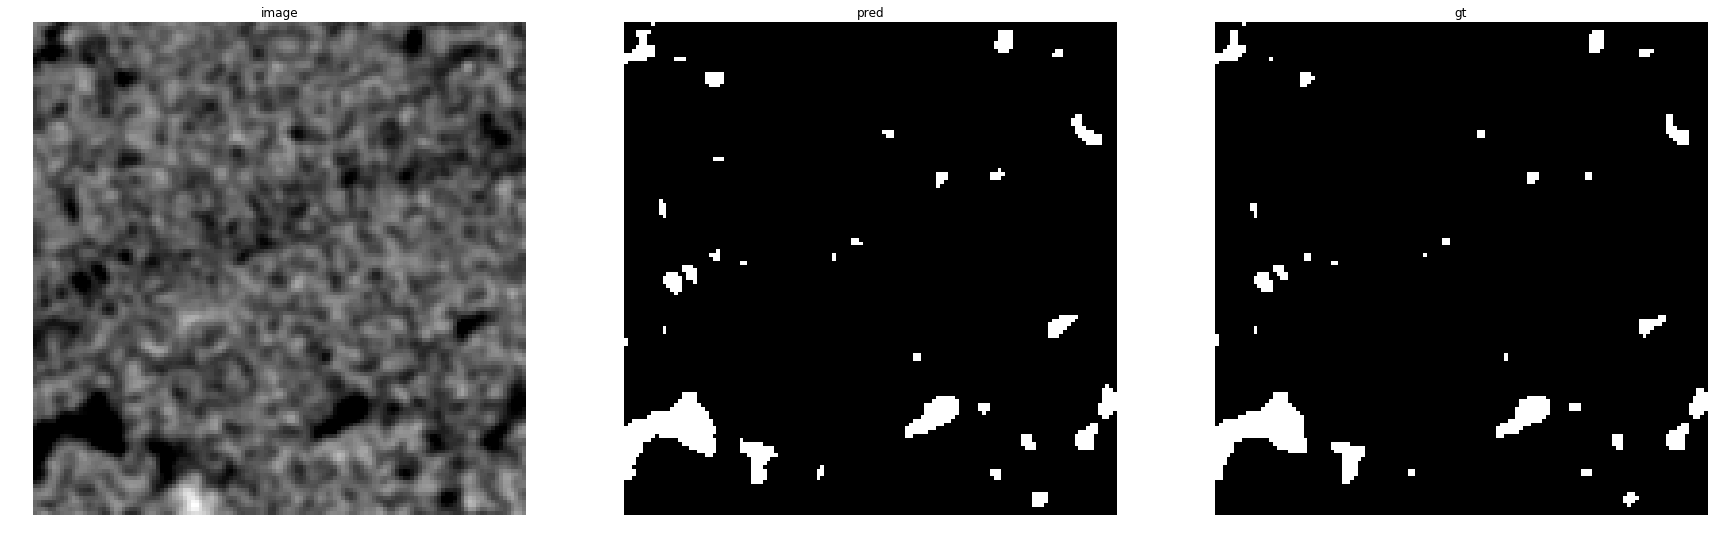

accuracy    : 0.99420166015625
precision   : 0.8866396761133604
recall      : 0.9835329341317365
f1          : 0.9325762952448545
pr_auc      : 0.9925900774232296
iou         : 0.8736702127659575


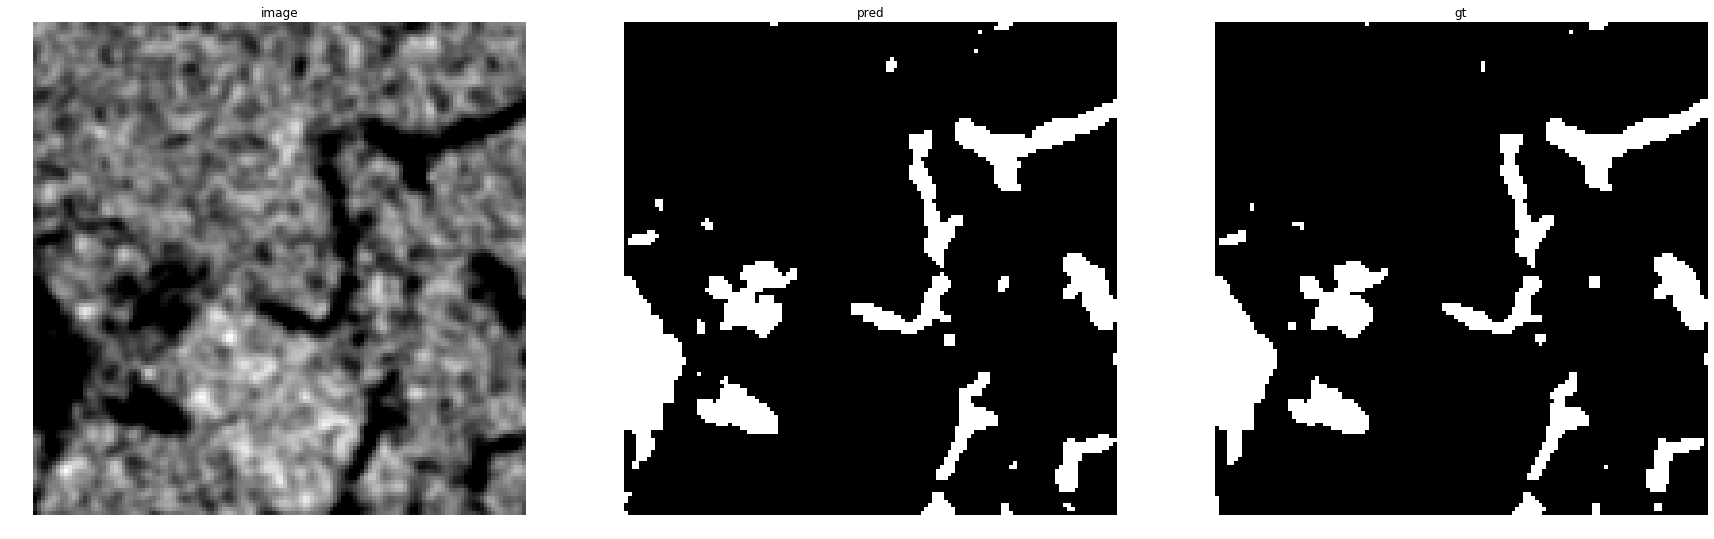

accuracy    : 0.99072265625
precision   : 0.9508754863813229
recall      : 0.9745762711864406
f1          : 0.9625800098473658
pr_auc      : 0.9962884743478192
iou         : 0.927859515899383


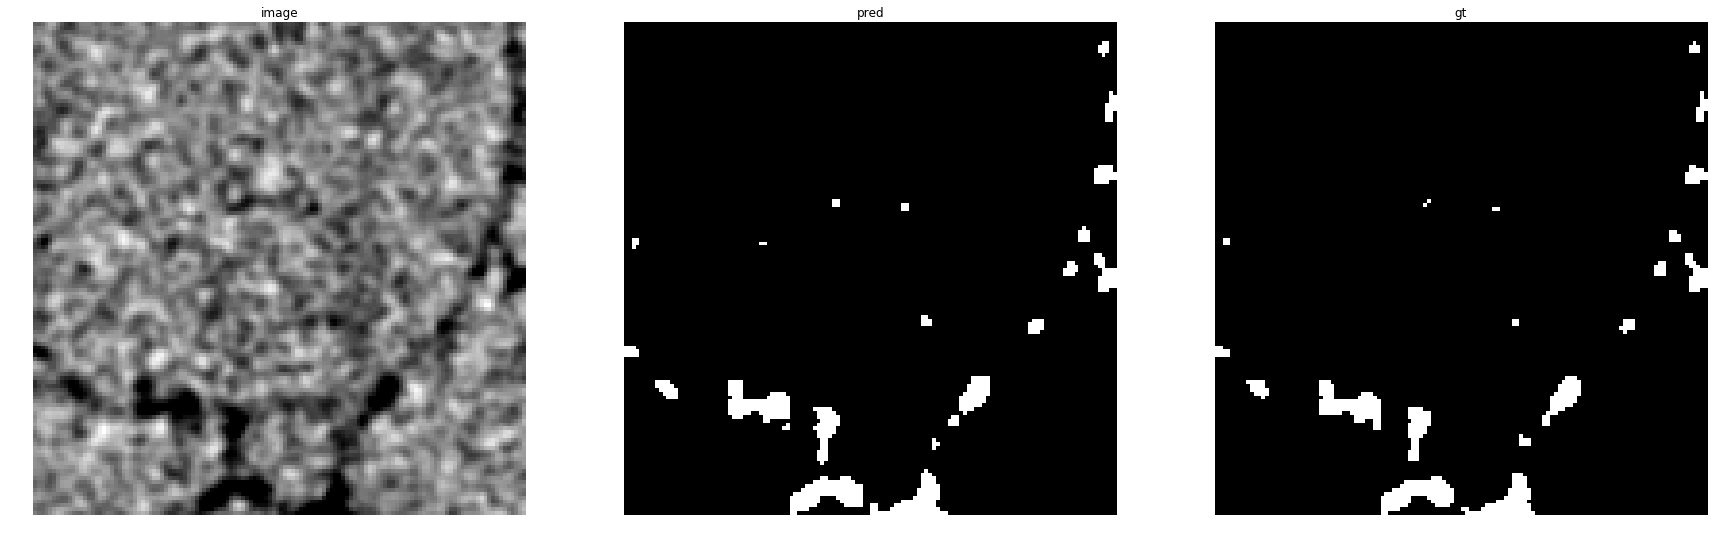

accuracy    : 0.99566650390625
precision   : 0.9087947882736156
recall      : 0.9738219895287958
f1          : 0.9401853411962932
pr_auc      : 0.9909010882870608
iou         : 0.8871224165341812


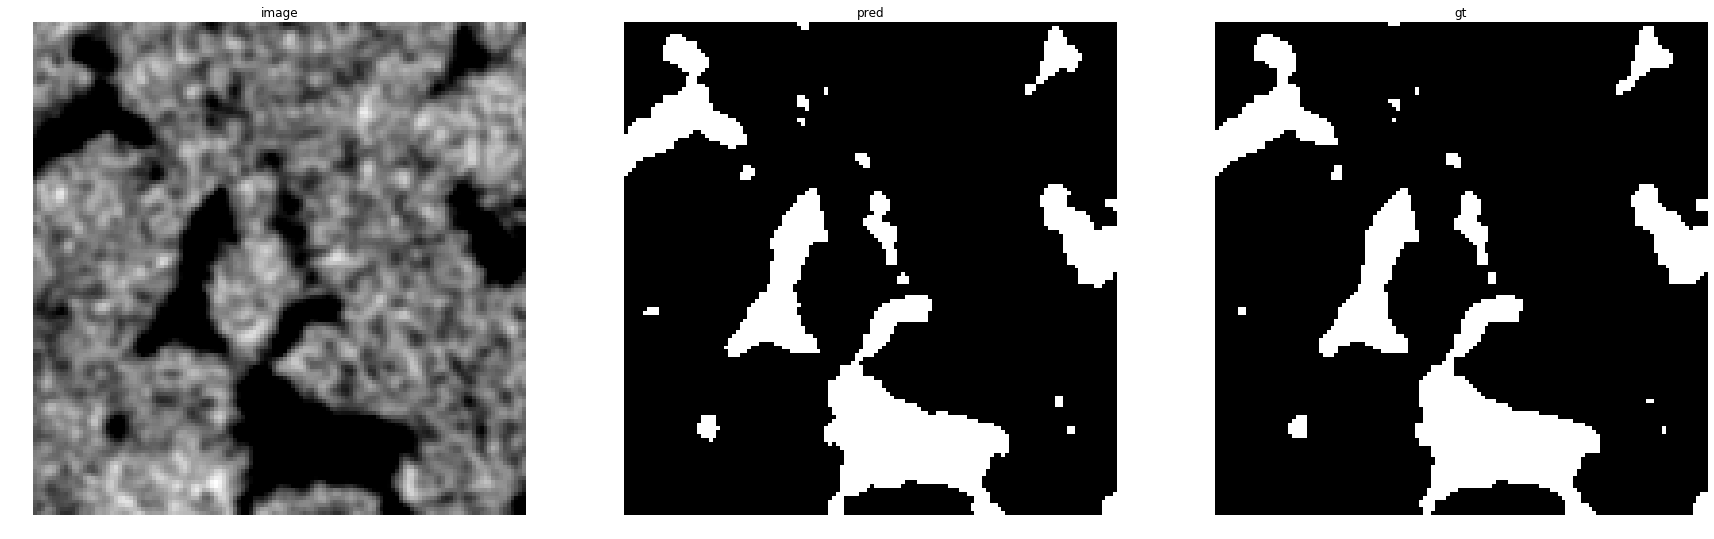

accuracy    : 0.99298095703125
precision   : 0.974378017081322
recall      : 0.9827715355805243
f1          : 0.9785567779228045
pr_auc      : 0.9986284259661302
iou         : 0.9580138736765242


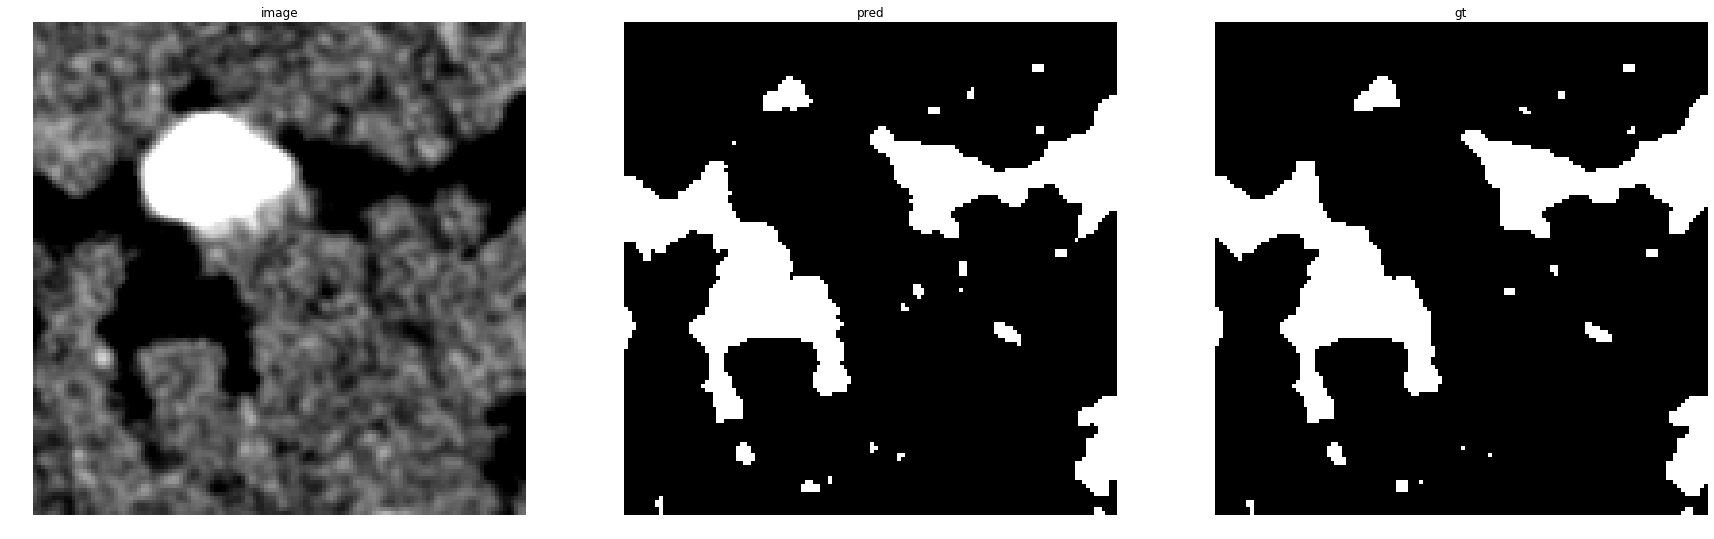

accuracy    : 0.9925537109375
precision   : 0.9690219282979464
recall      : 0.9882854100106496
f1          : 0.9785588752196838
pr_auc      : 0.9988428141551888
iou         : 0.9580178940123881


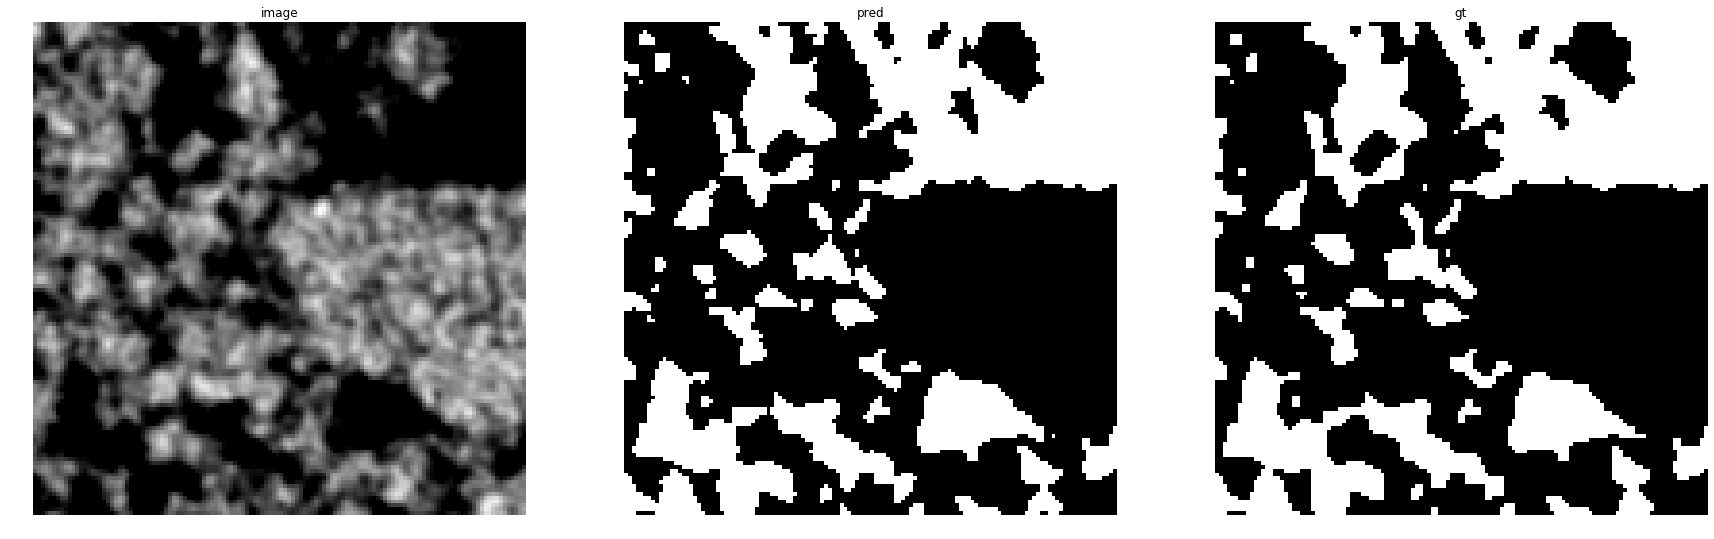

accuracy    : 0.98052978515625
precision   : 0.9710814510609171
recall      : 0.9742489270386266
f1          : 0.9726626103350758
pr_auc      : 0.9977013603401872
iou         : 0.9467801134467801


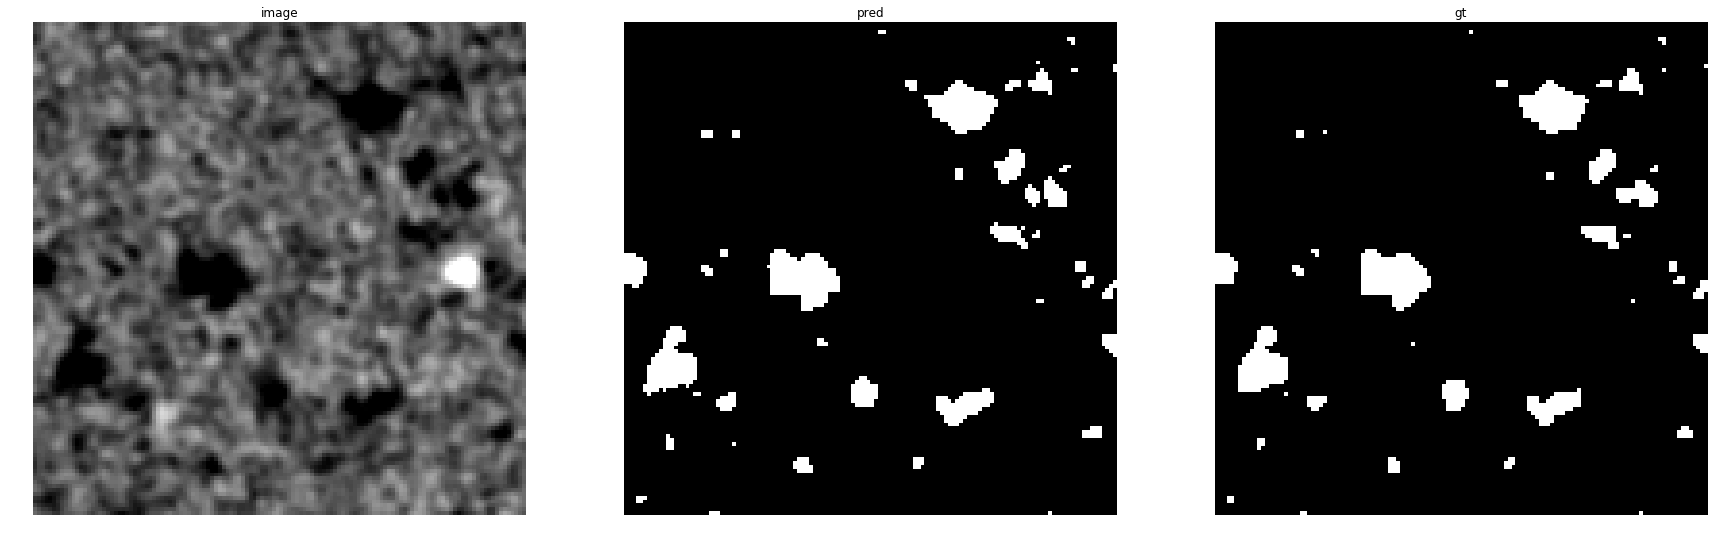

accuracy    : 0.99298095703125
precision   : 0.9142300194931774
recall      : 0.9720207253886011
f1          : 0.9422400803616273
pr_auc      : 0.9928670823358379
iou         : 0.8907882241215574


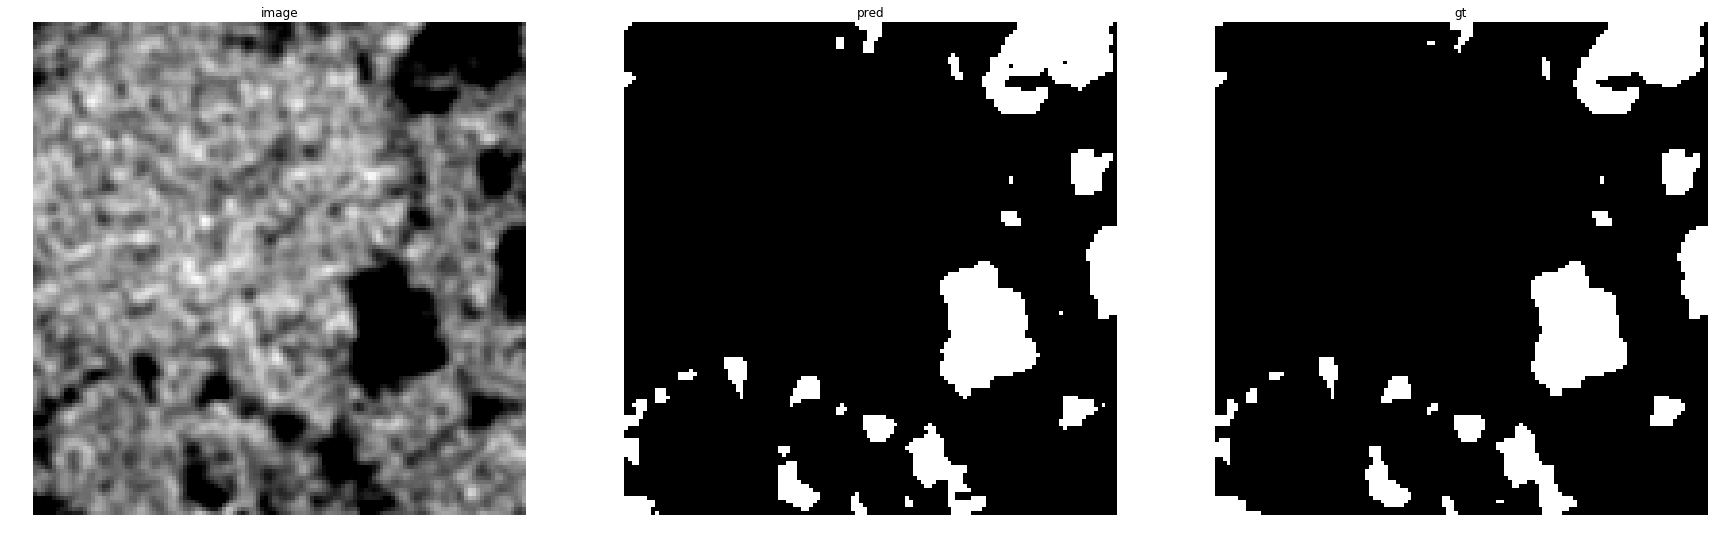

accuracy    : 0.9915771484375
precision   : 0.9576923076923077
recall      : 0.9755142017629774
f1          : 0.9665211062590974
pr_auc      : 0.9968037285069538
iou         : 0.9352112676056338


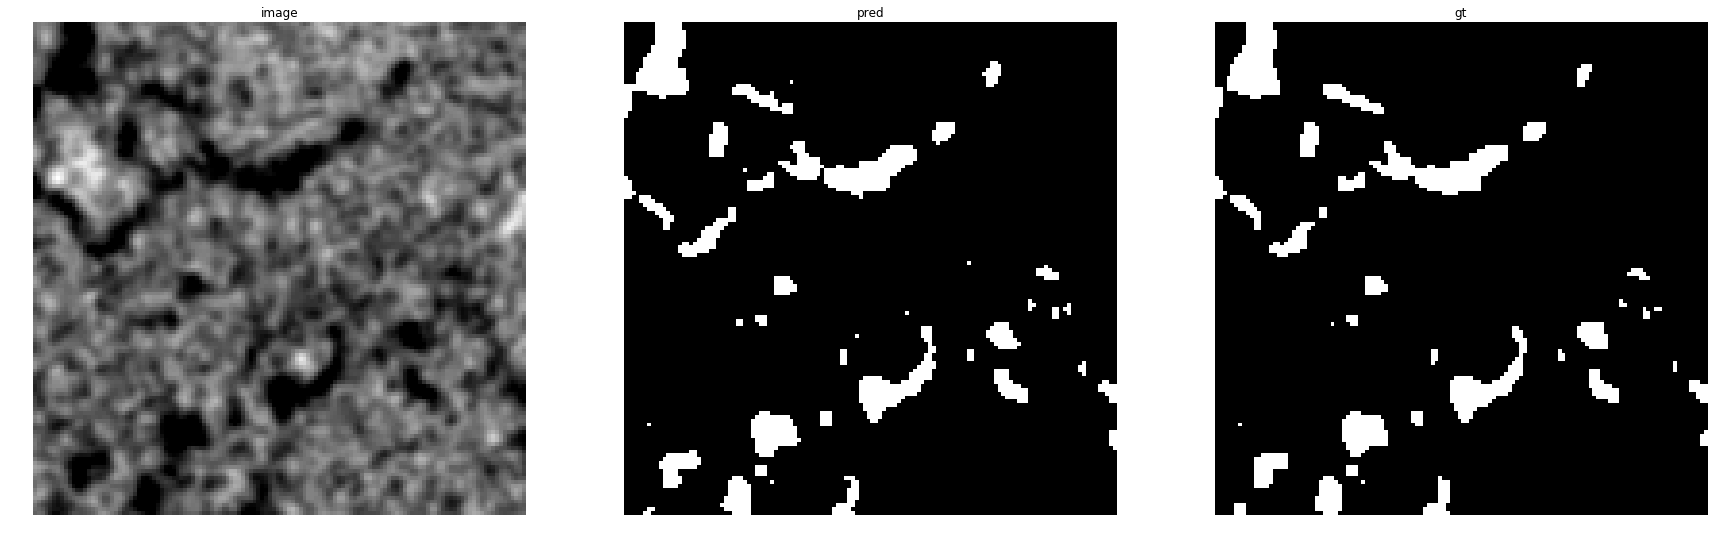

accuracy    : 0.99212646484375
precision   : 0.9384164222873901
recall      : 0.9660377358490566
f1          : 0.952026775753068
pr_auc      : 0.9932968348632734
iou         : 0.9084457061745919


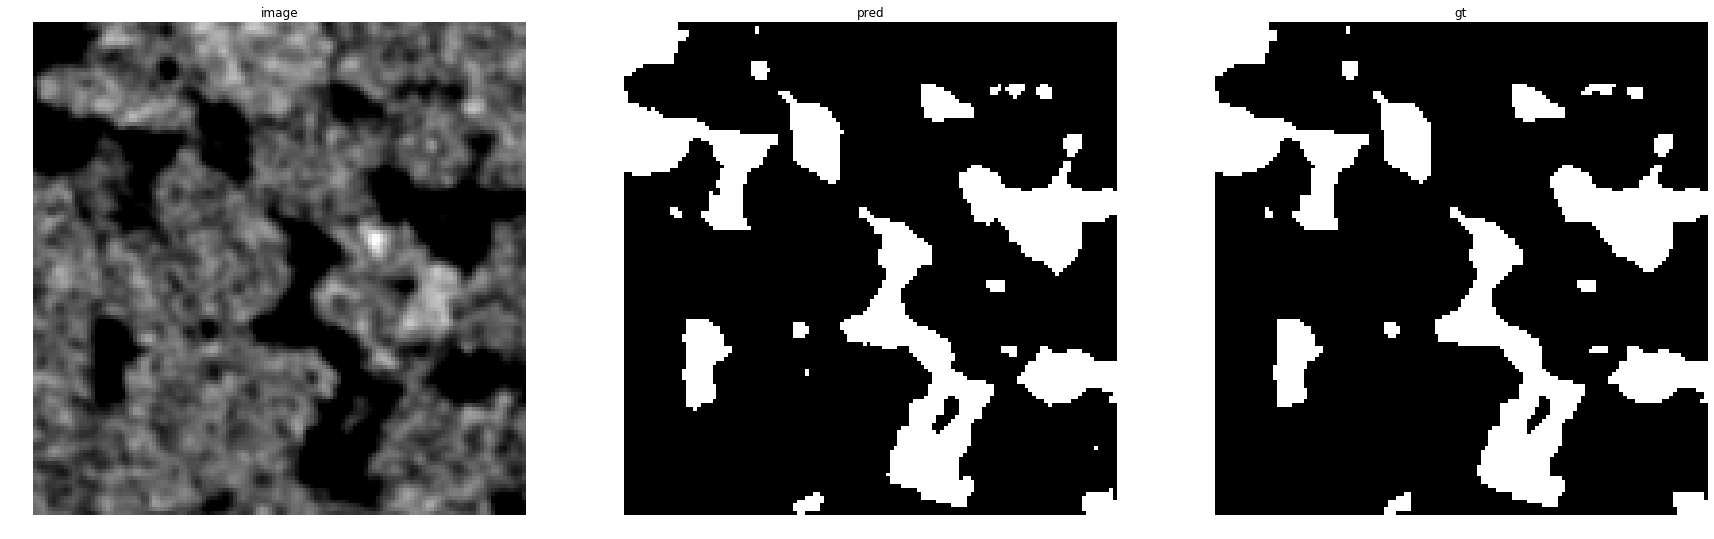

accuracy    : 0.9931640625
precision   : 0.9779367918902803
recall      : 0.9885473176612417
f1          : 0.9832134292565947
pr_auc      : 0.9991322991757973
iou         : 0.9669811320754716


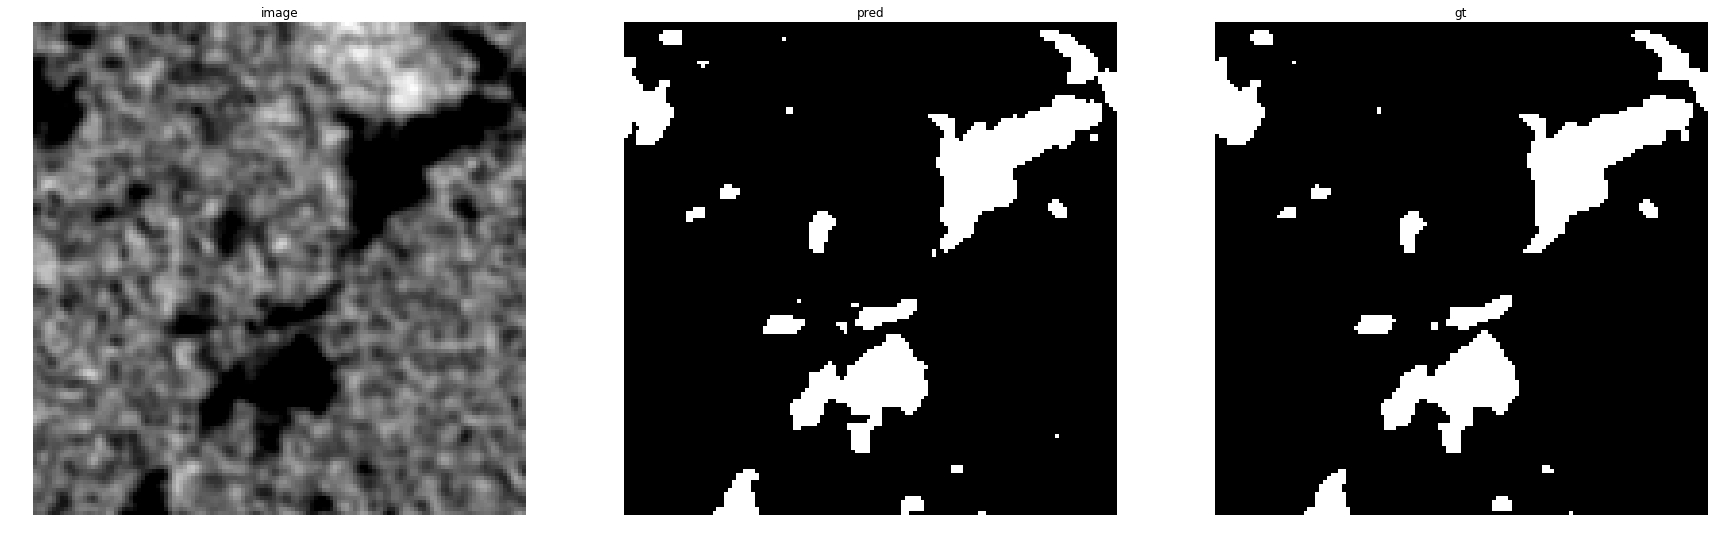

accuracy    : 0.99212646484375
precision   : 0.9664804469273743
recall      : 0.9679552390640895
f1          : 0.9672172808132149
pr_auc      : 0.9965047624713188
iou         : 0.9365157480314961


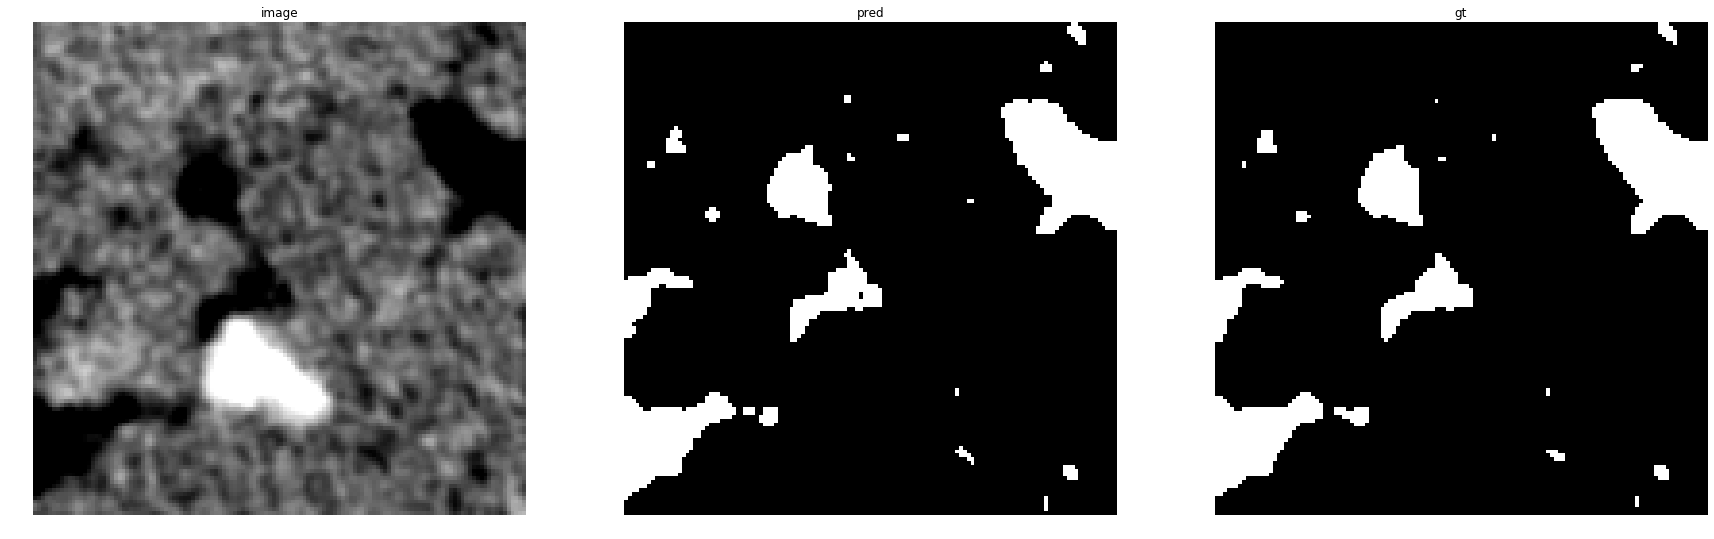

accuracy    : 0.99493408203125
precision   : 0.9748743718592965
recall      : 0.9786995515695067
f1          : 0.9767832167832168
pr_auc      : 0.9978785900092959
iou         : 0.9546200109349371


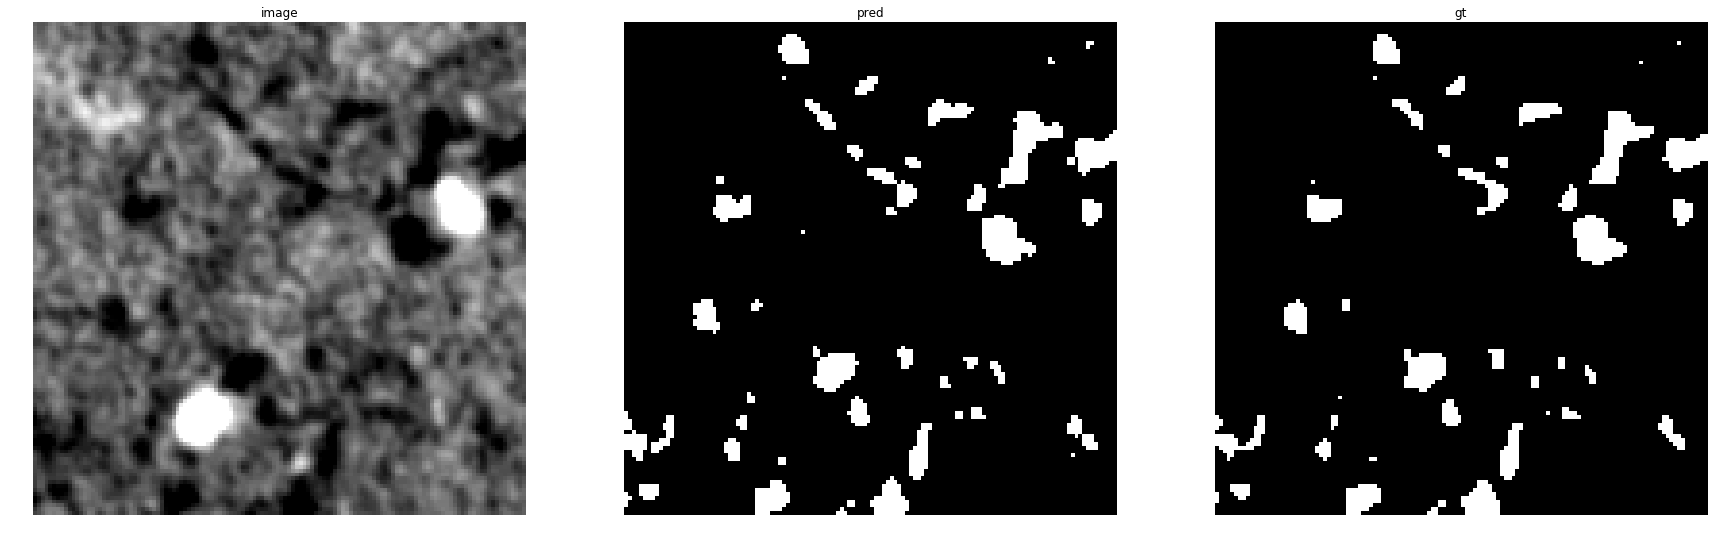

accuracy    : 0.98931884765625
precision   : 0.8972332015810277
recall      : 0.961864406779661
f1          : 0.9284253578732107
pr_auc      : 0.9909934696098327
iou         : 0.8664122137404581


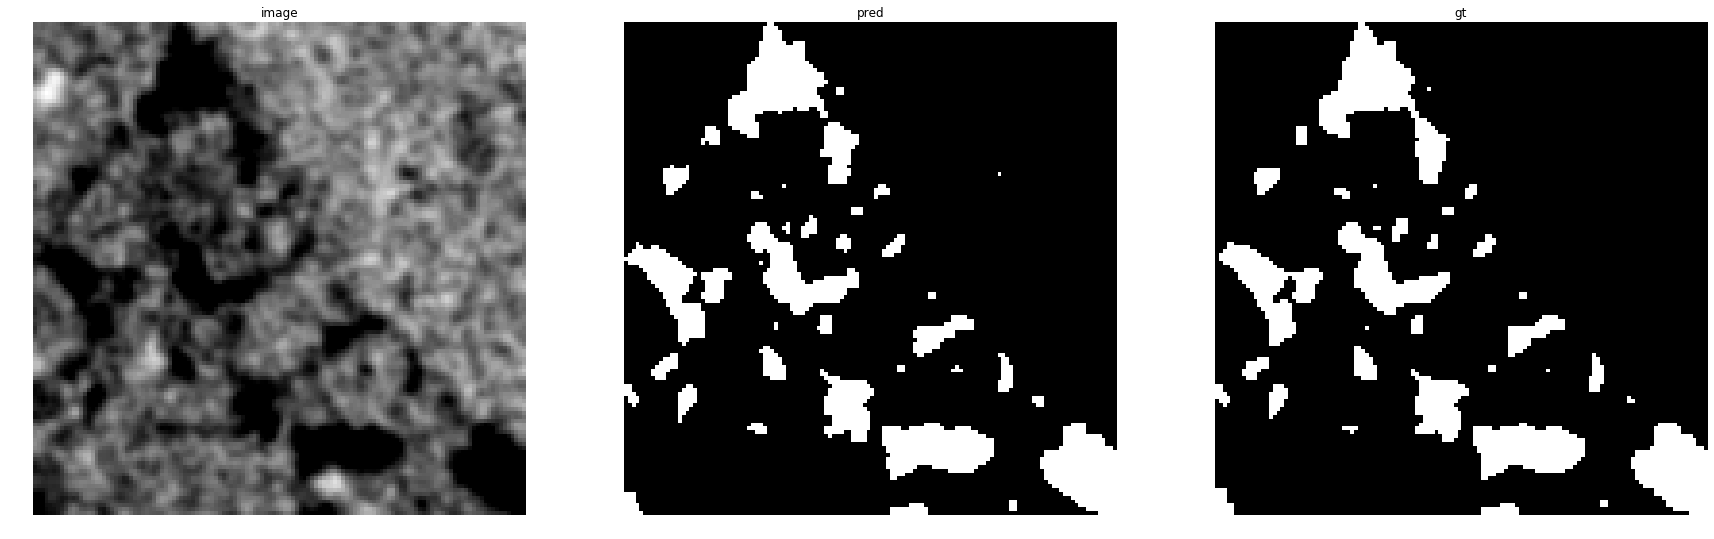

accuracy    : 0.98944091796875
precision   : 0.9574468085106383
recall      : 0.9671052631578947
f1          : 0.9622518001309186
pr_auc      : 0.9960509865679705
iou         : 0.9272497897392767


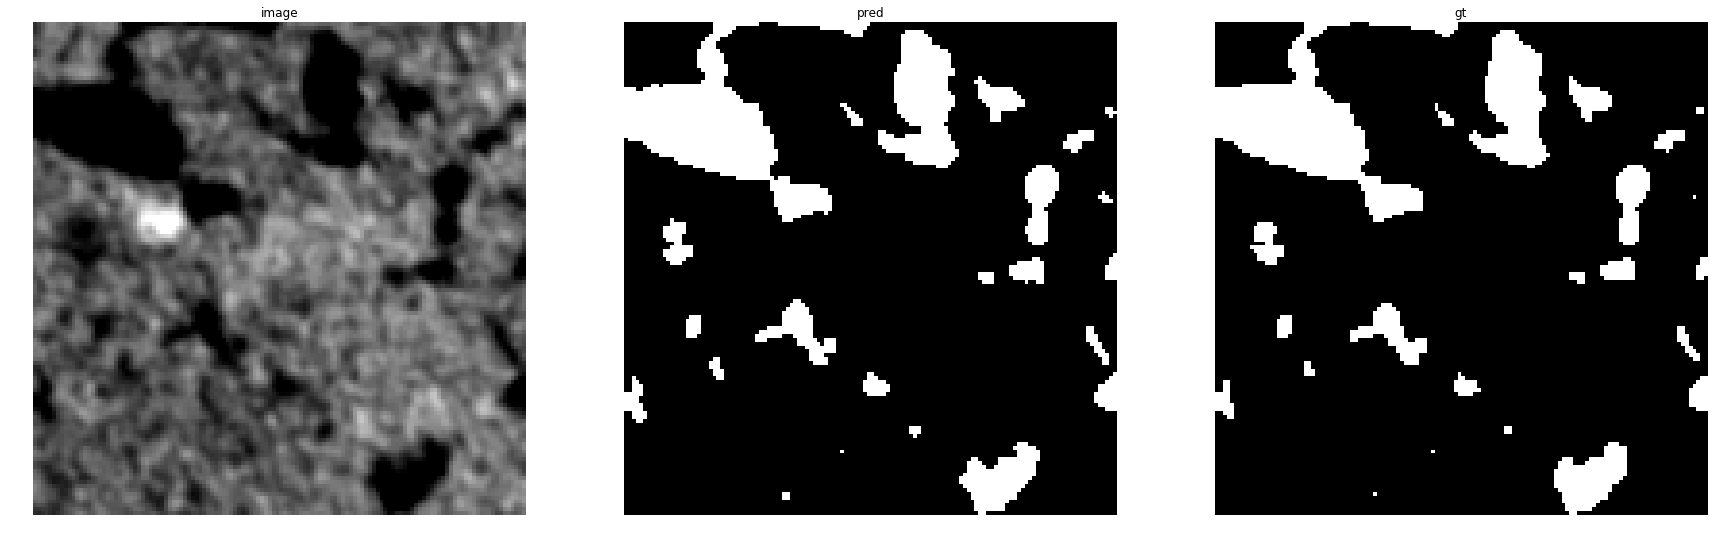

accuracy    : 0.99163818359375
precision   : 0.9558701082431307
recall      : 0.9866781263429308
f1          : 0.9710298160287587
pr_auc      : 0.9979112038262924
iou         : 0.9436909165639129


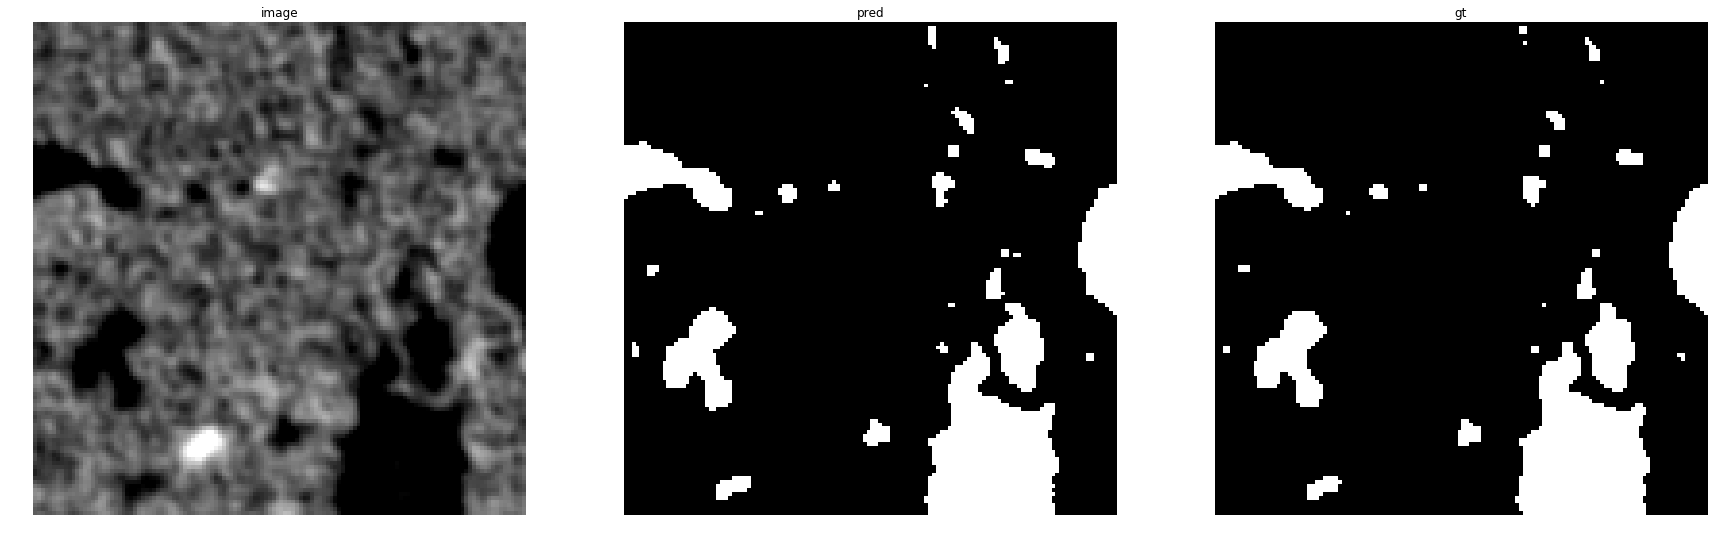

accuracy    : 0.99359130859375
precision   : 0.9659593280282935
recall      : 0.9873474920921825
f1          : 0.976536312849162
pr_auc      : 0.9986832711953981
iou         : 0.9541484716157205


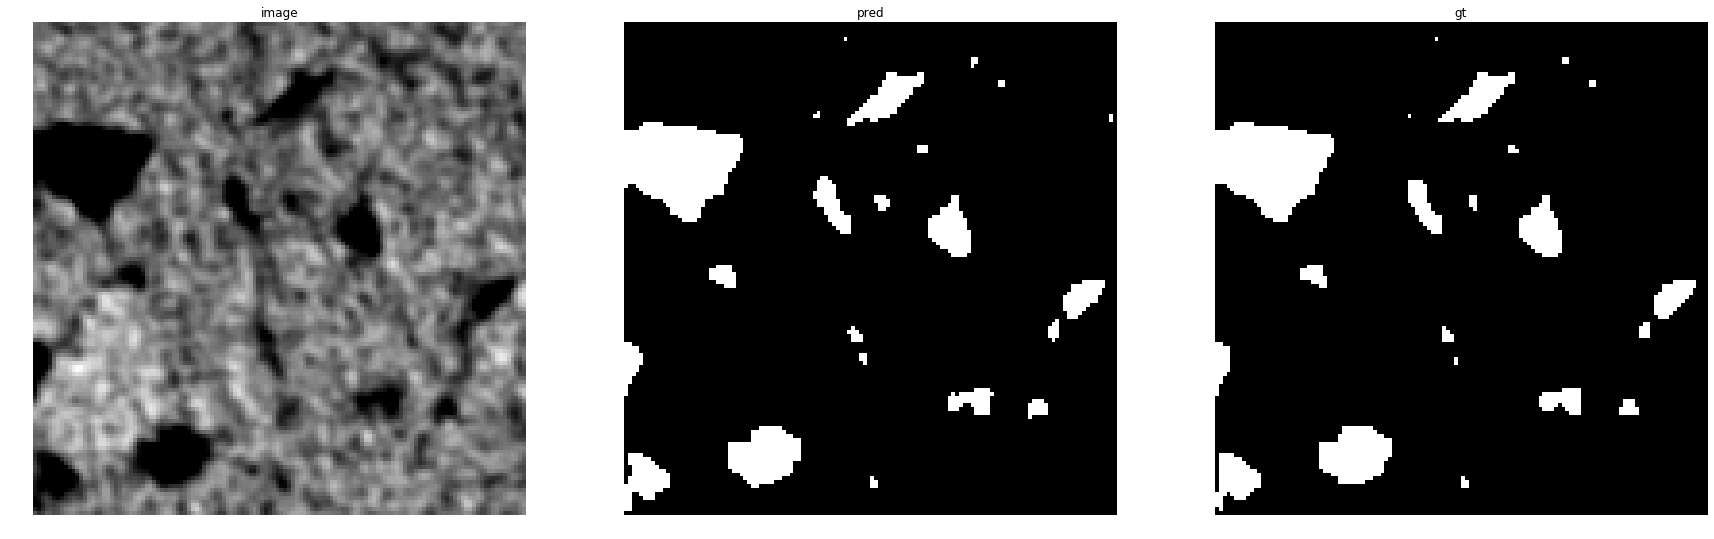

accuracy    : 0.99578857421875
precision   : 0.9660326086956522
recall      : 0.9868147120055517
f1          : 0.976313079299691
pr_auc      : 0.9981379356159705
iou         : 0.9537223340040242


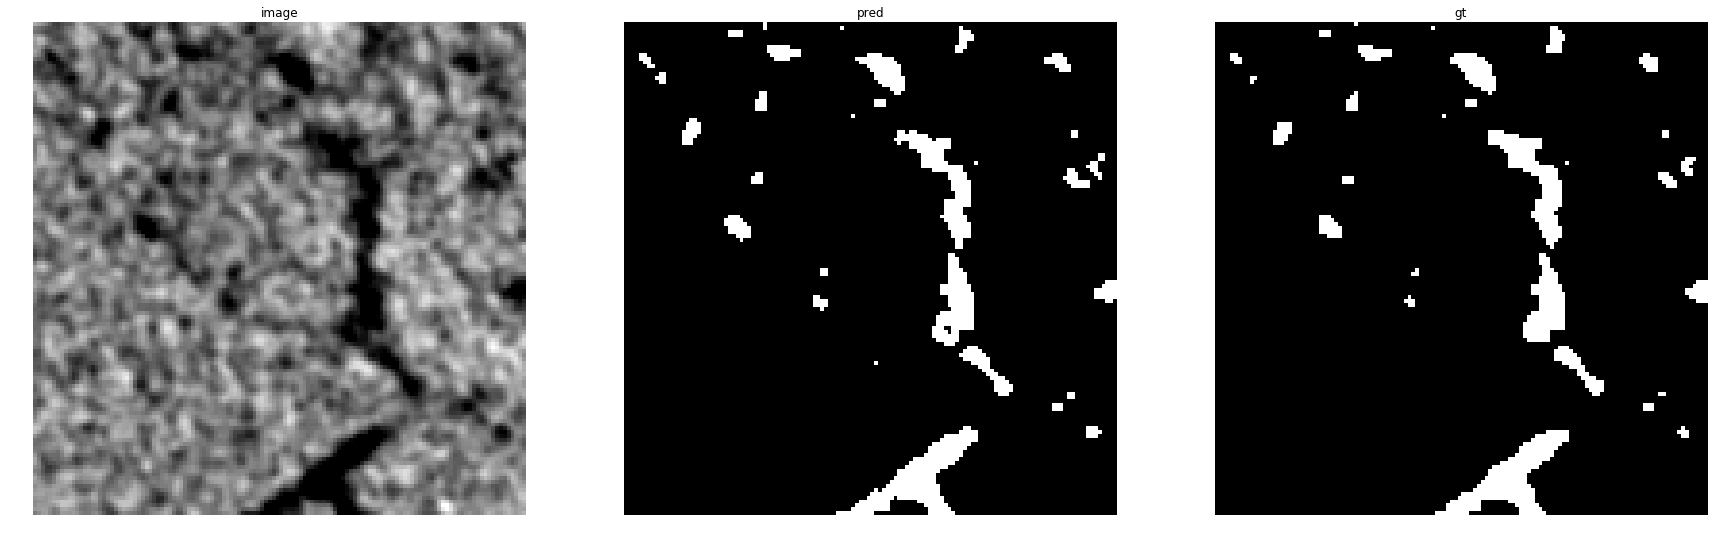

accuracy    : 0.99273681640625
precision   : 0.9291949563530553
recall      : 0.954183266932271
f1          : 0.9415233415233415
pr_auc      : 0.9909998199751182
iou         : 0.8895078922934077


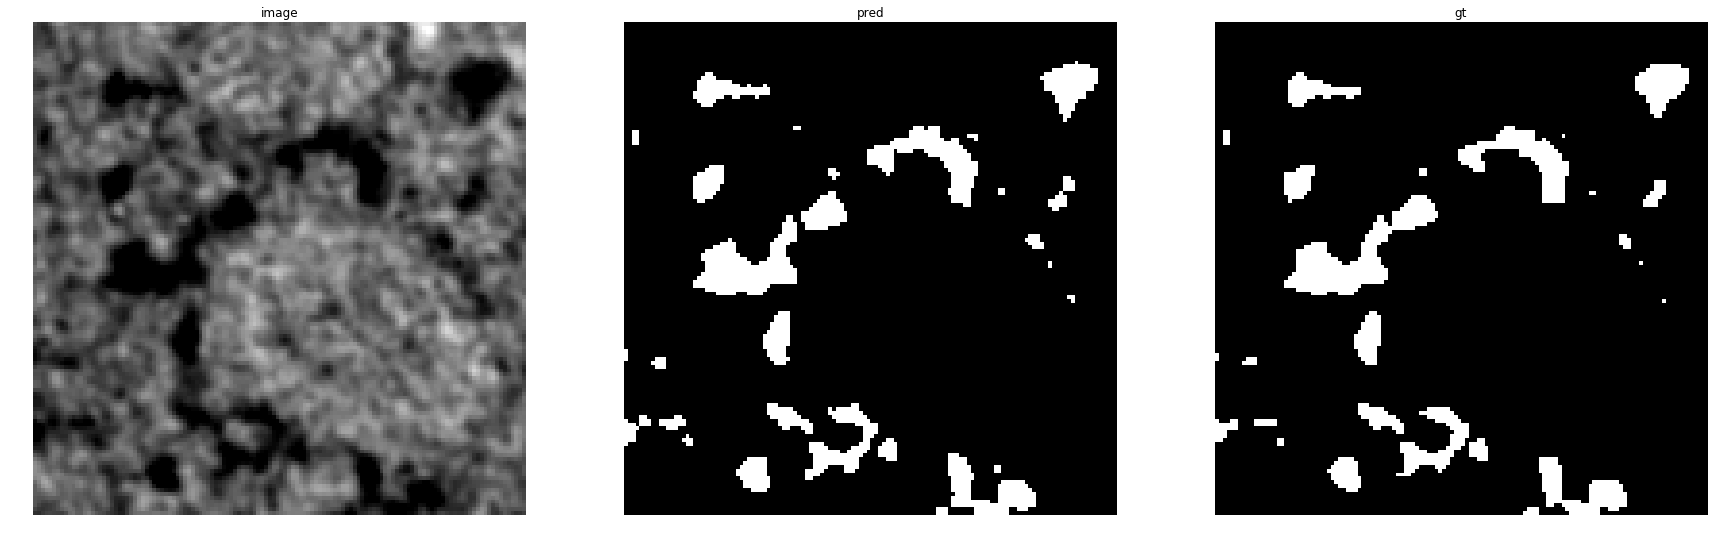

accuracy    : 0.99017333984375
precision   : 0.9182597231377719
recall      : 0.9741258741258741
f1          : 0.9453681710213777
pr_auc      : 0.9938851551485559
iou         : 0.8963963963963963


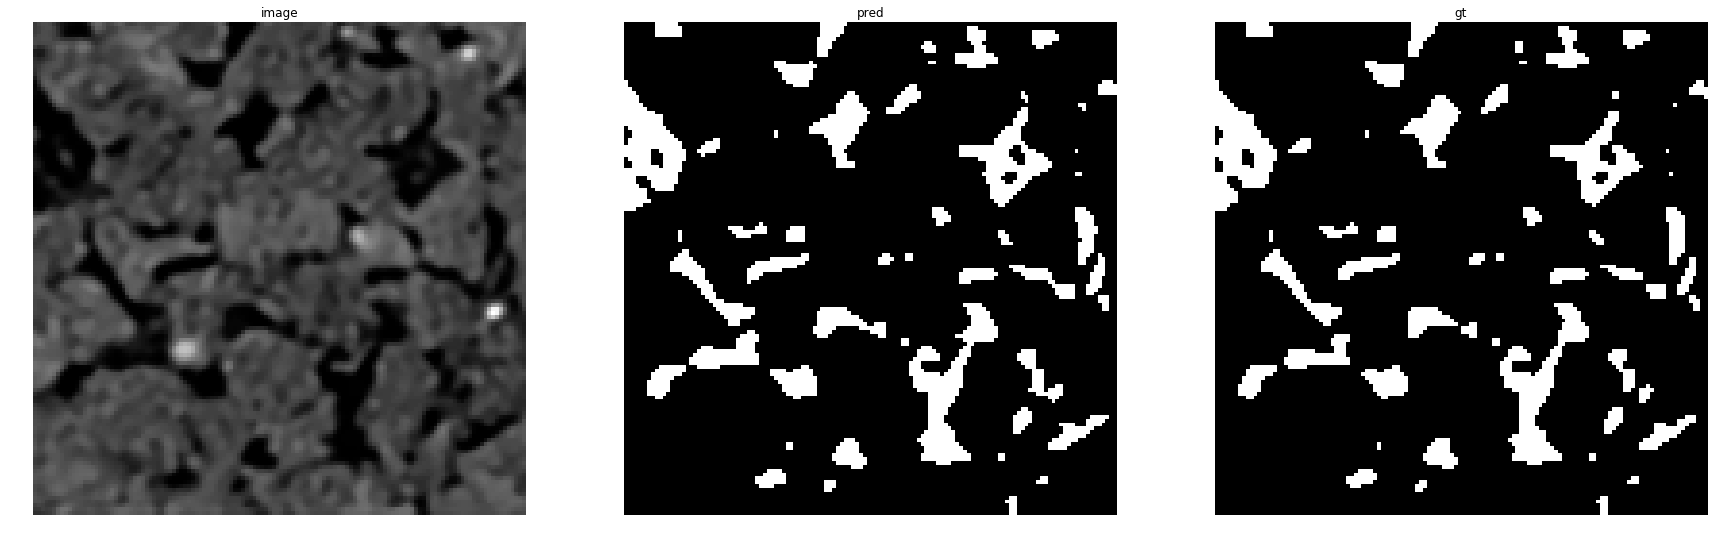

accuracy    : 0.99029541015625
precision   : 0.9359368143922773
recall      : 0.9939422180801492
f1          : 0.9640677966101695
pr_auc      : 0.9973969773857033
iou         : 0.930628272251309


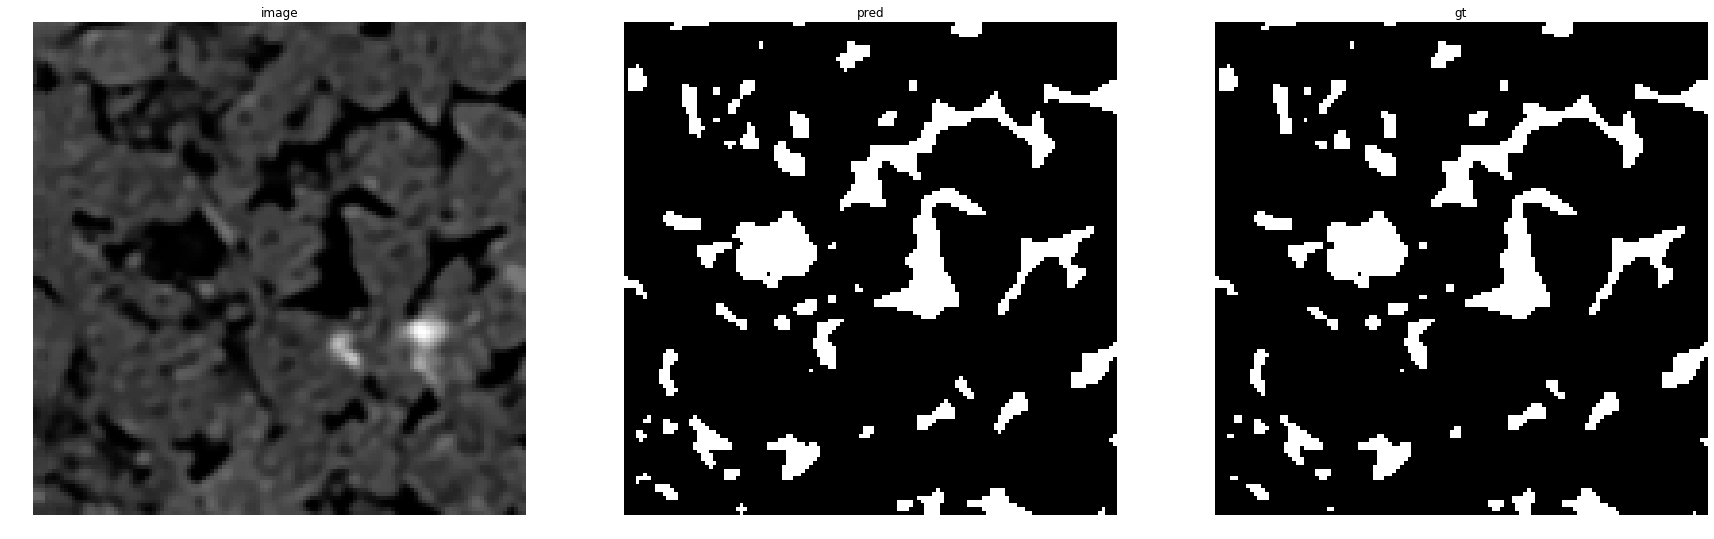

accuracy    : 0.9915771484375
precision   : 0.9473453268977622
recall      : 0.9917317409278824
f1          : 0.9690305206463197
pr_auc      : 0.9977991738598052
iou         : 0.9399216369177188


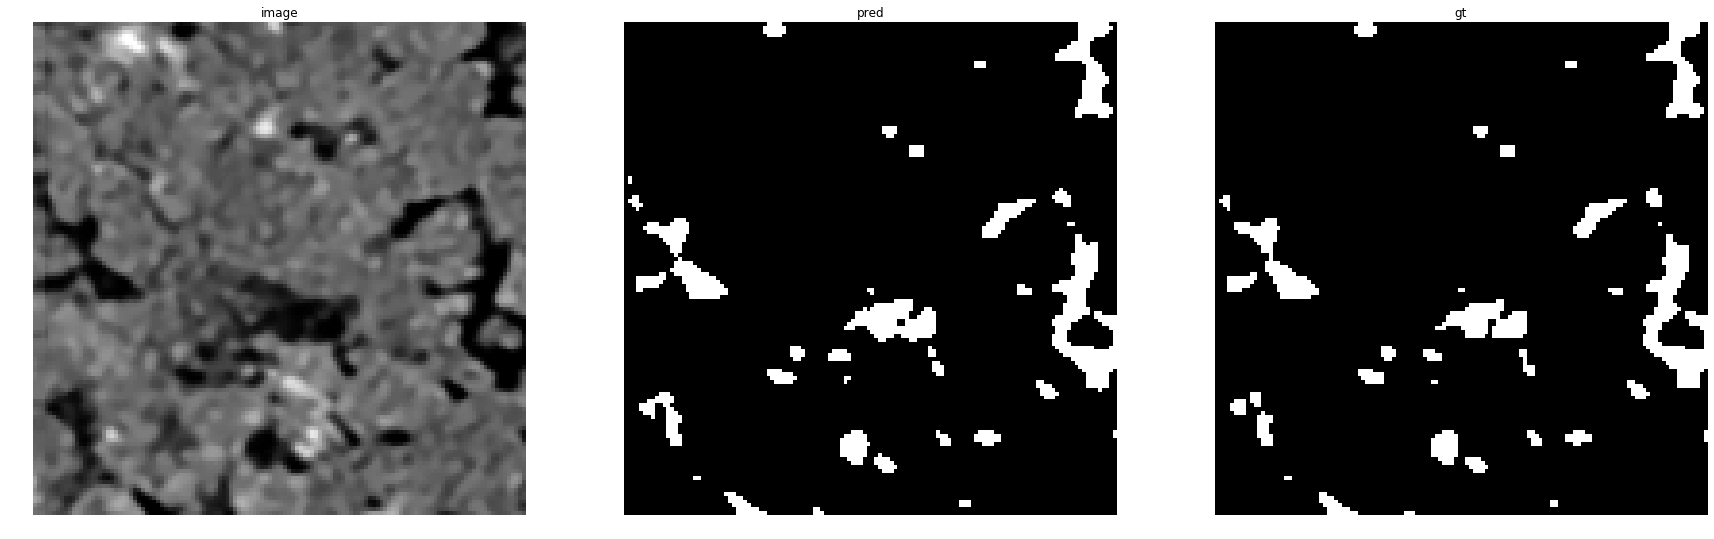

accuracy    : 0.99420166015625
precision   : 0.9353274050121261
recall      : 0.9872013651877133
f1          : 0.9605645496056455
pr_auc      : 0.9969698746228614
iou         : 0.9241214057507987


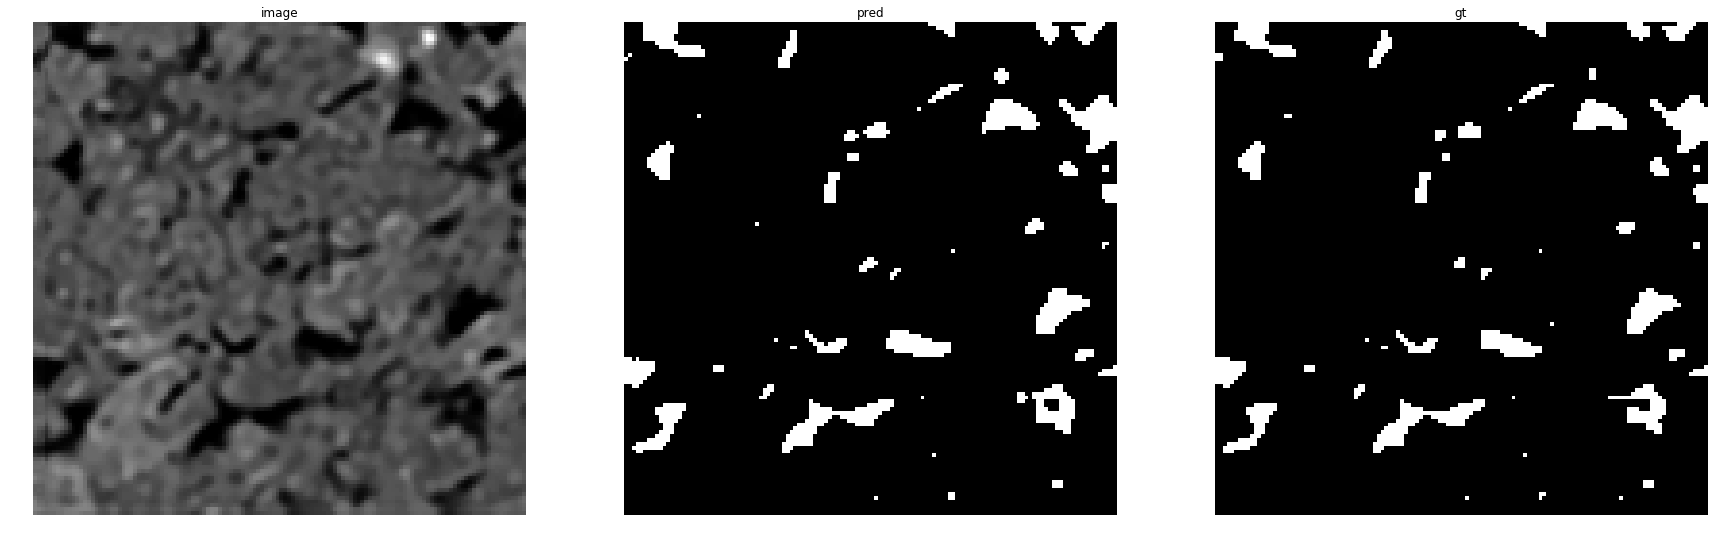

accuracy    : 0.993408203125
precision   : 0.927487352445194
recall      : 0.9803921568627451
f1          : 0.9532062391681109
pr_auc      : 0.9946282623003665
iou         : 0.9105960264900662


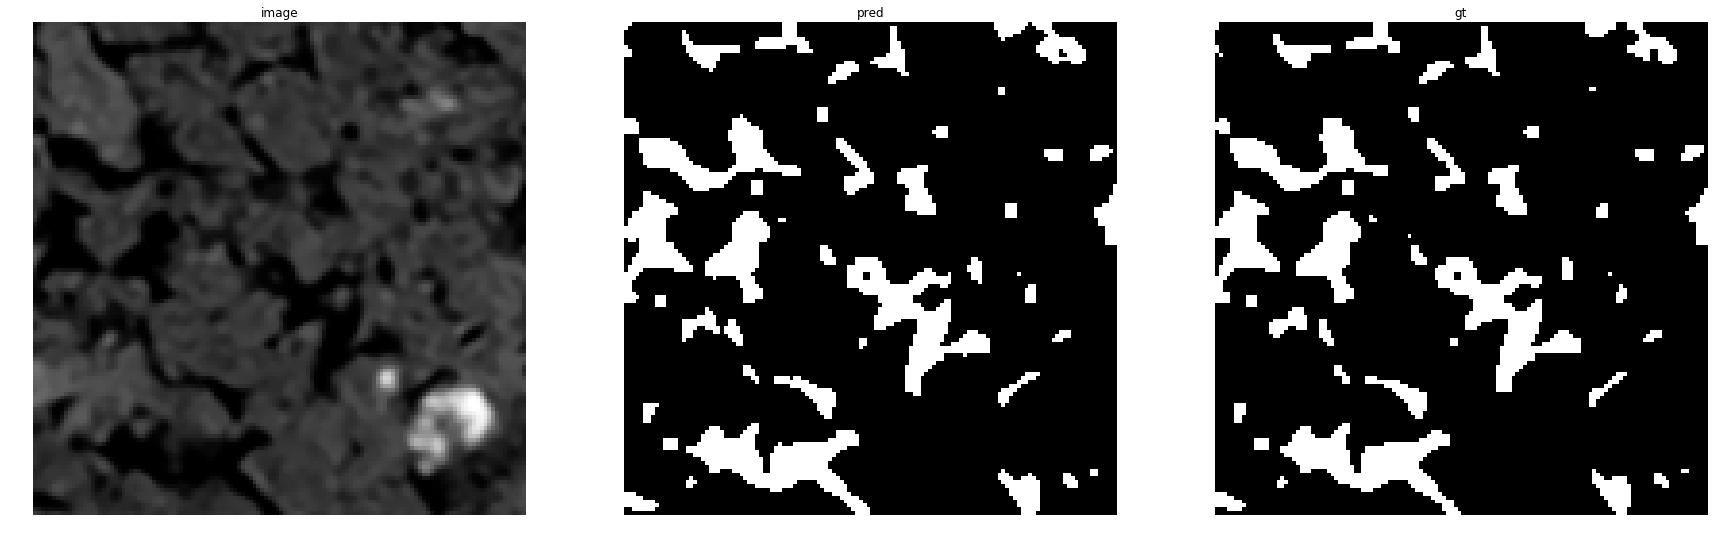

accuracy    : 0.9906005859375
precision   : 0.9494446572194561
recall      : 0.991203518592563
f1          : 0.9698748043818467
pr_auc      : 0.997766731164904
iou         : 0.9415115837447778


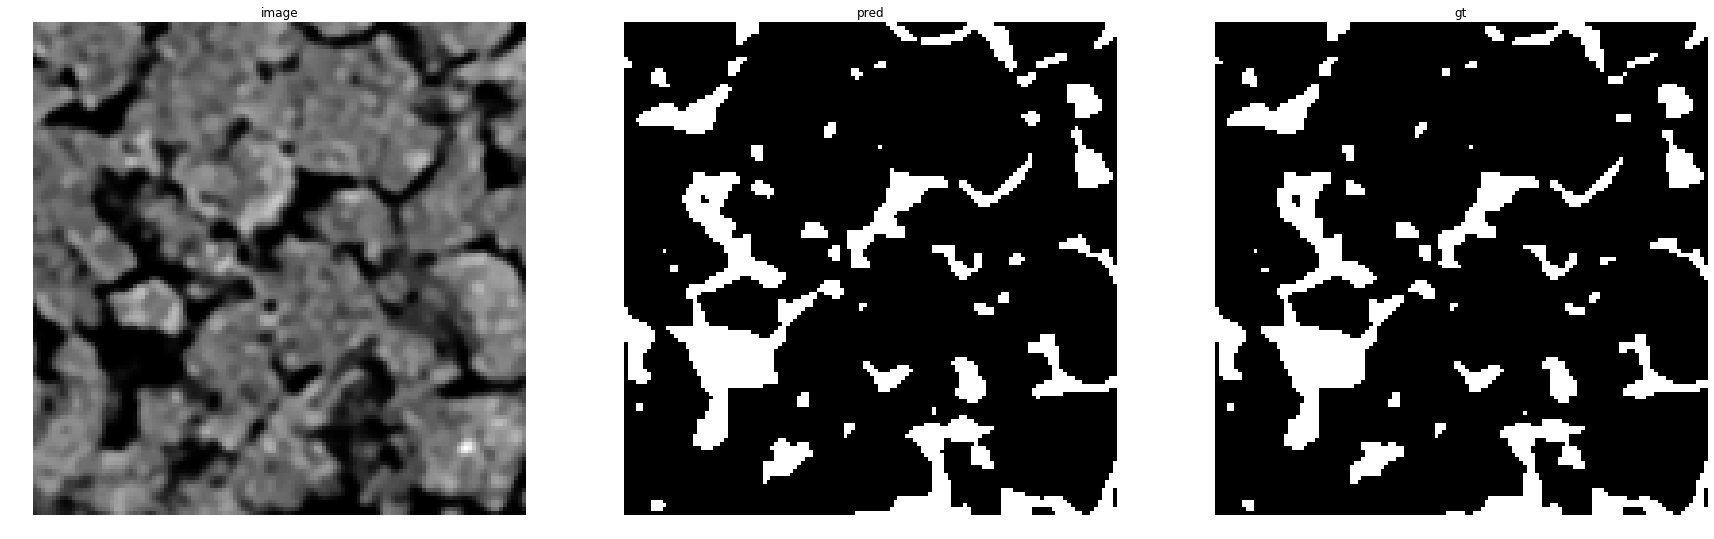

accuracy    : 0.98858642578125
precision   : 0.9428157799493304
recall      : 0.9889901290812453
f1          : 0.9653511209931444
pr_auc      : 0.9967314802692709
iou         : 0.9330229226361032


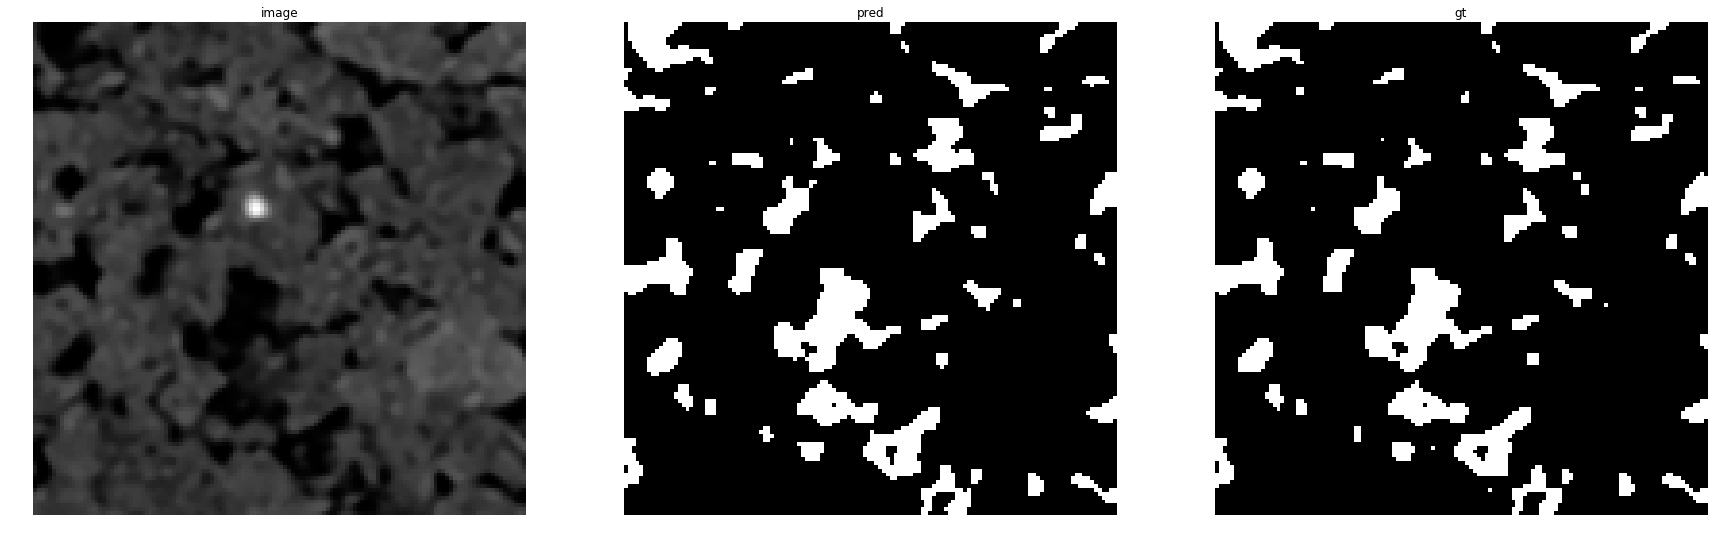

accuracy    : 0.99102783203125
precision   : 0.9421708185053381
recall      : 0.9920374707259954
f1          : 0.9664613278576318
pr_auc      : 0.9973526729348509
iou         : 0.9350993377483444


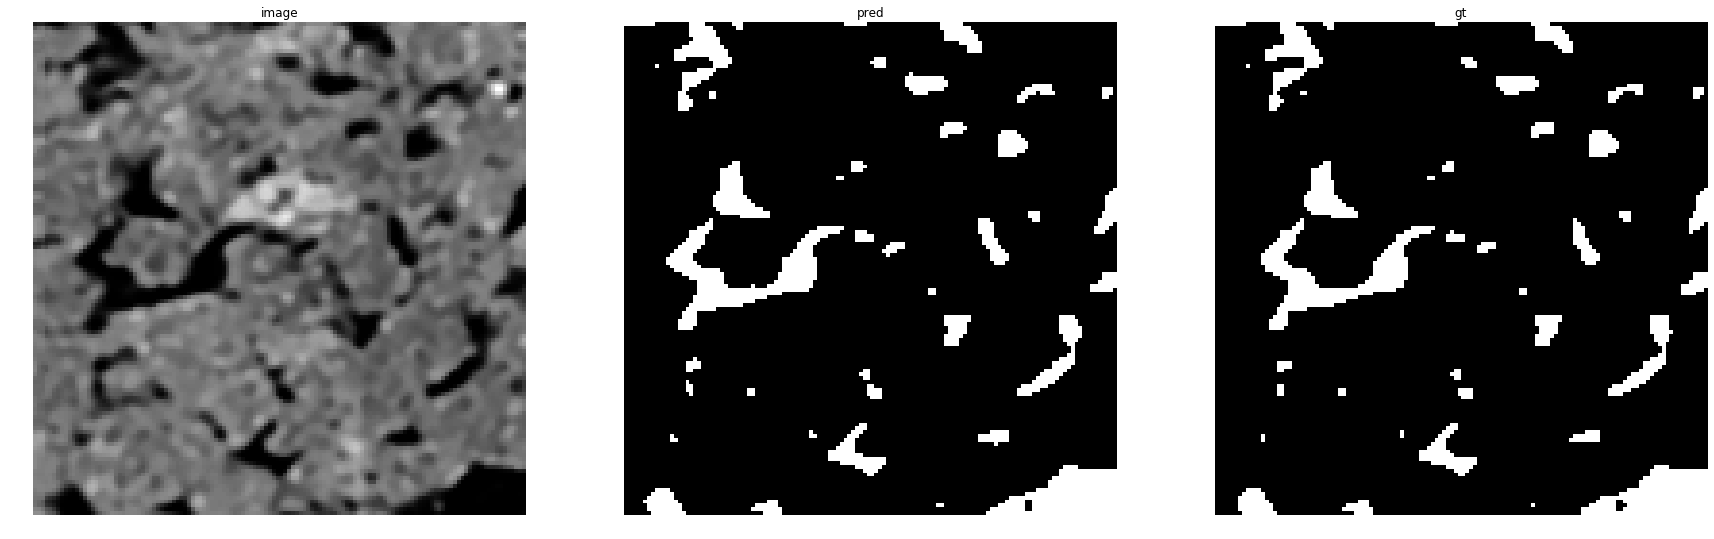

accuracy    : 0.99517822265625
precision   : 0.9585087191822008
recall      : 0.9937655860349127
f1          : 0.9758187940006122
pr_auc      : 0.9985973658880262
iou         : 0.9527794381350867


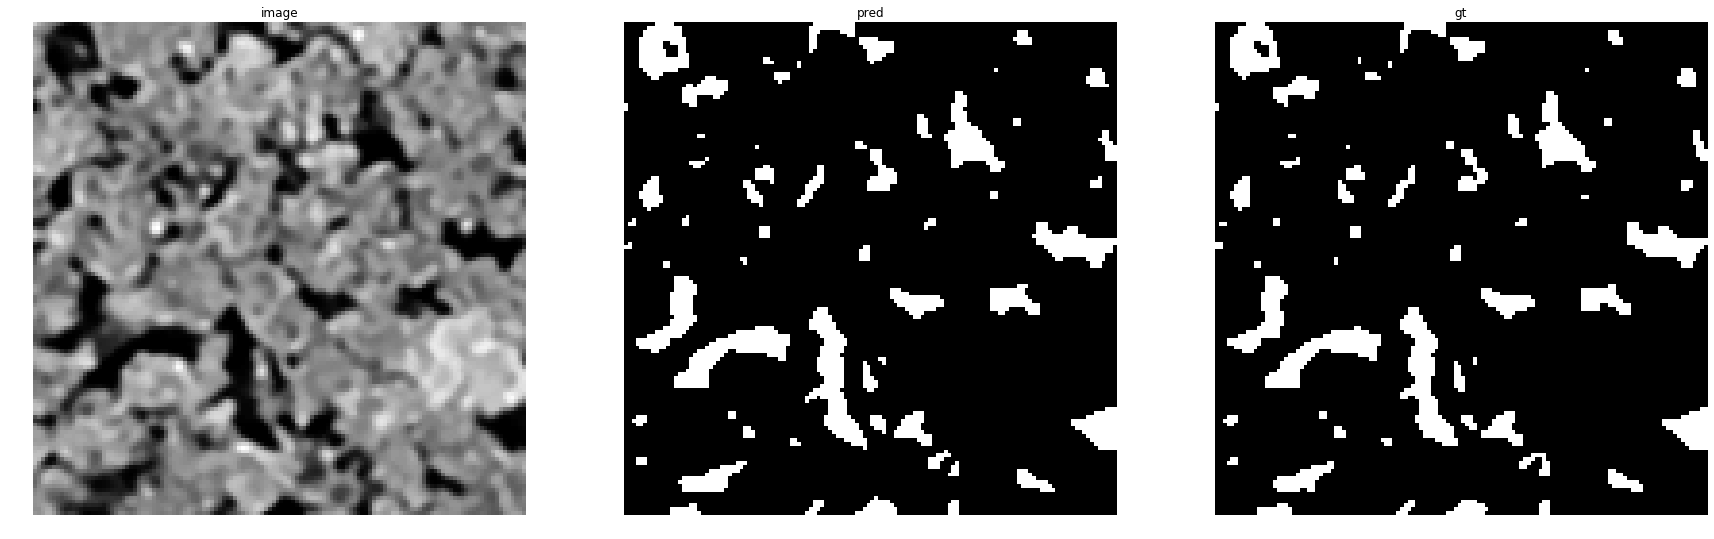

accuracy    : 0.9903564453125
precision   : 0.9337782340862423
recall      : 0.9843073593073594
f1          : 0.958377239199157
pr_auc      : 0.9958897440000518
iou         : 0.9200809307030855


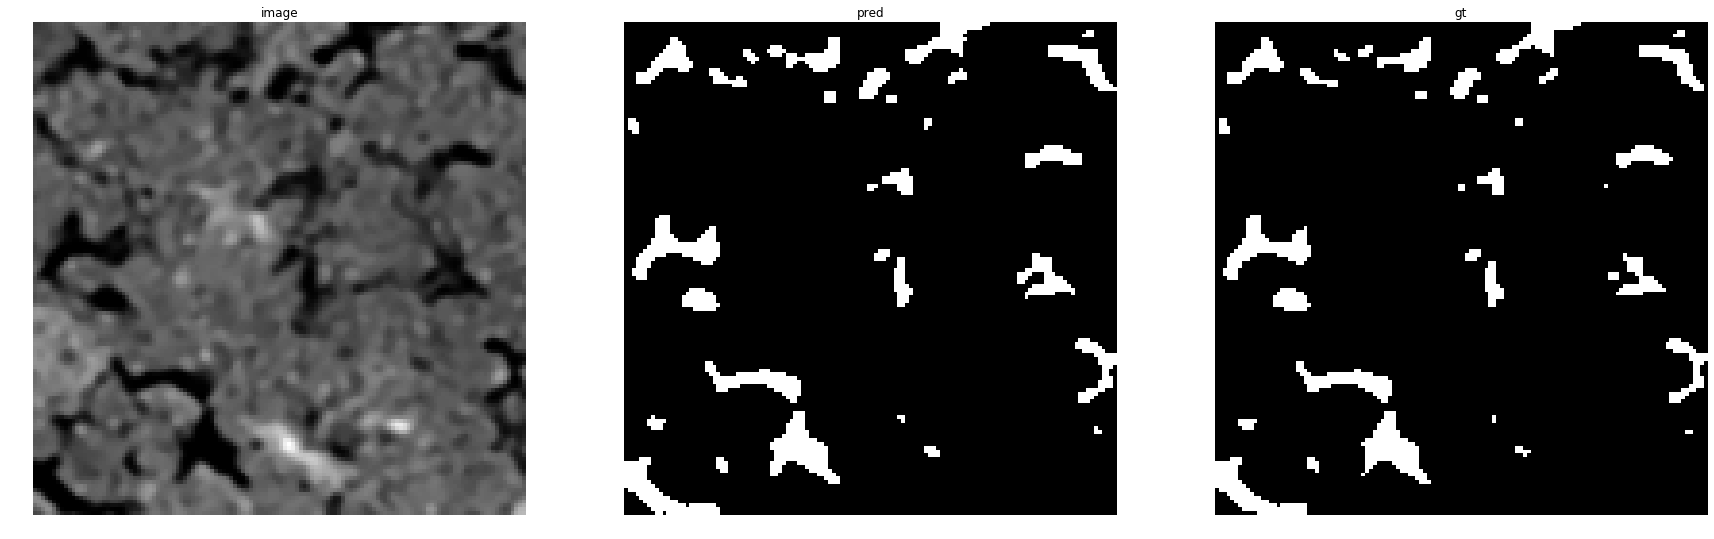

accuracy    : 0.99298095703125
precision   : 0.9243085880640466
recall      : 0.9914129586260734
f1          : 0.9566854990583805
pr_auc      : 0.996904830943282
iou         : 0.9169675090252708


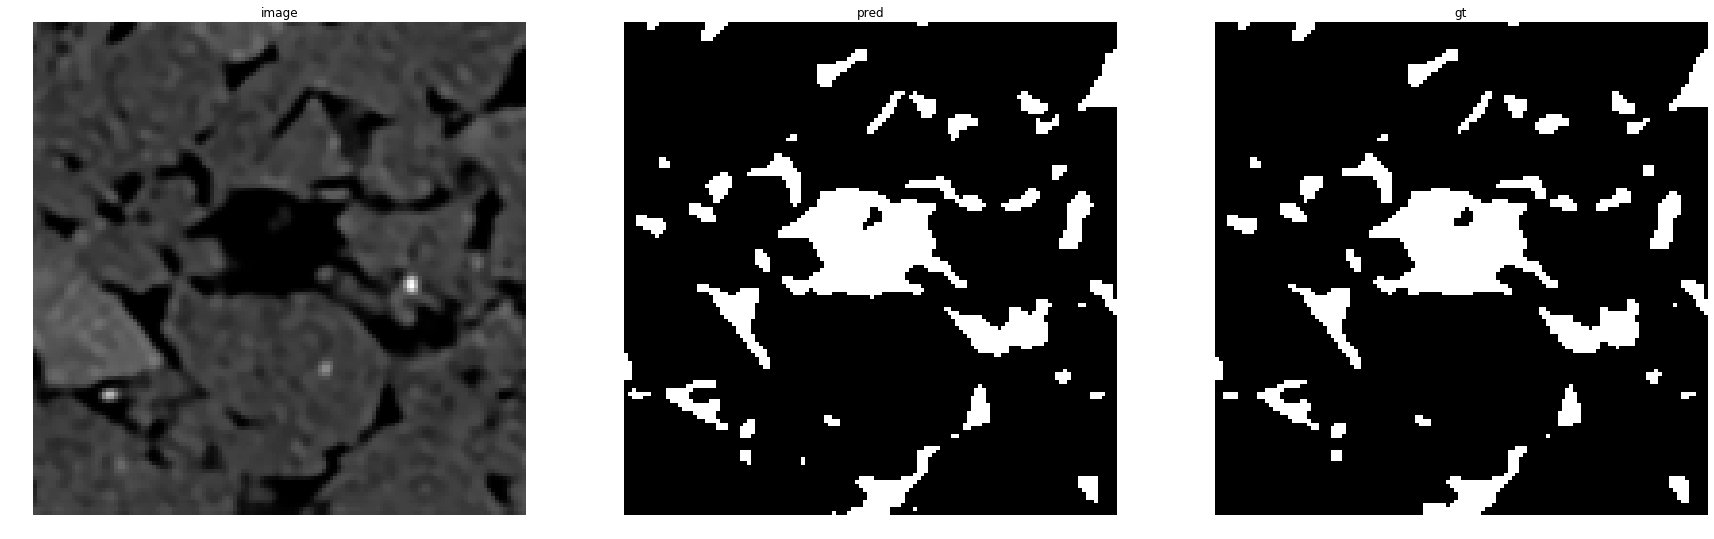

accuracy    : 0.99078369140625
precision   : 0.951067615658363
recall      : 0.9811840293712712
f1          : 0.9658911226564265
pr_auc      : 0.9971010364874389
iou         : 0.9340323285277413


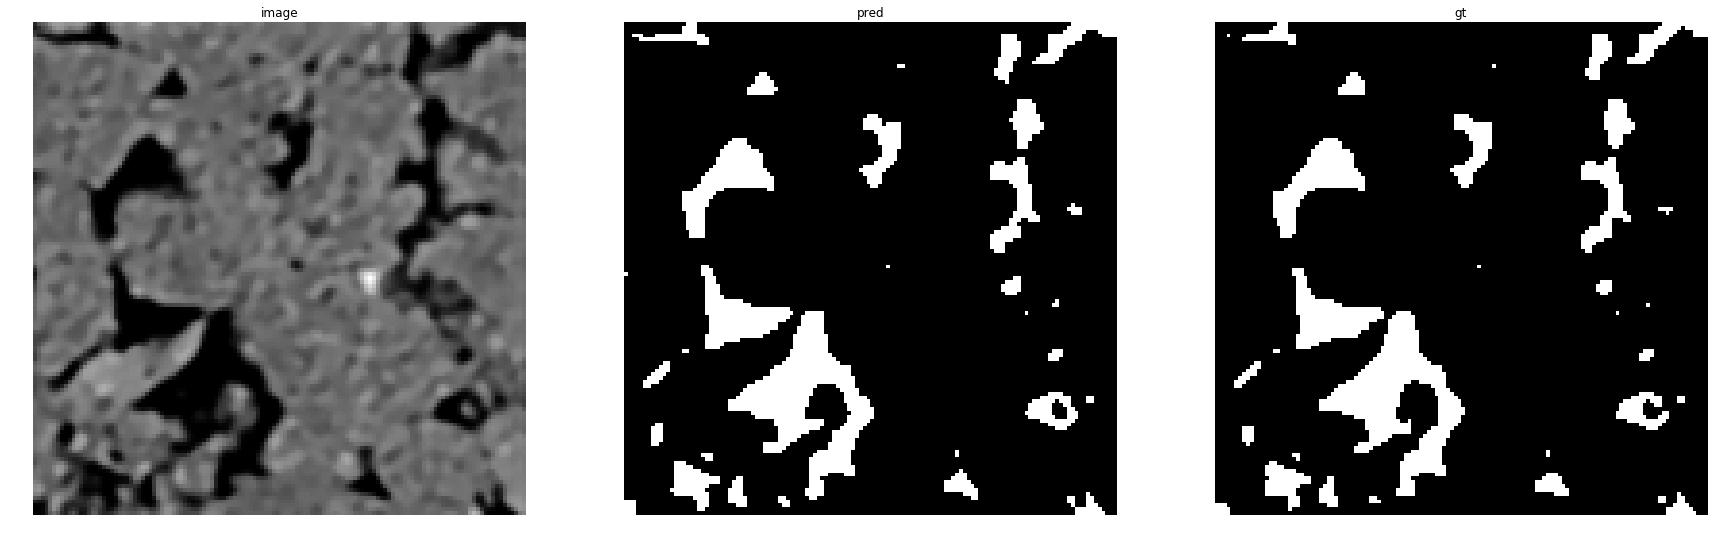

accuracy    : 0.99188232421875
precision   : 0.9532619279454723
recall      : 0.981453634085213
f1          : 0.9671523833045197
pr_auc      : 0.9969552318506956
iou         : 0.9363940698230512


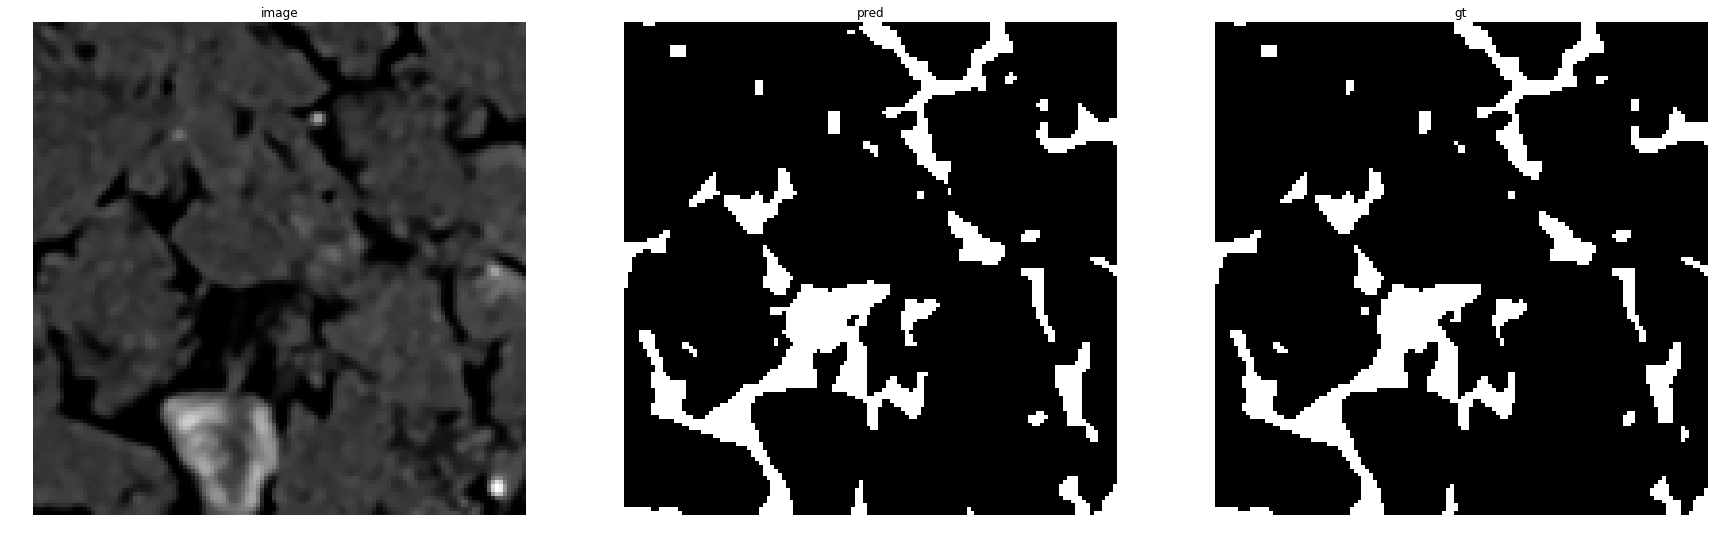

accuracy    : 0.98895263671875
precision   : 0.9374735952682721
recall      : 0.9853463587921847
f1          : 0.9608140290106083
pr_auc      : 0.9969672208247722
iou         : 0.9245833333333333


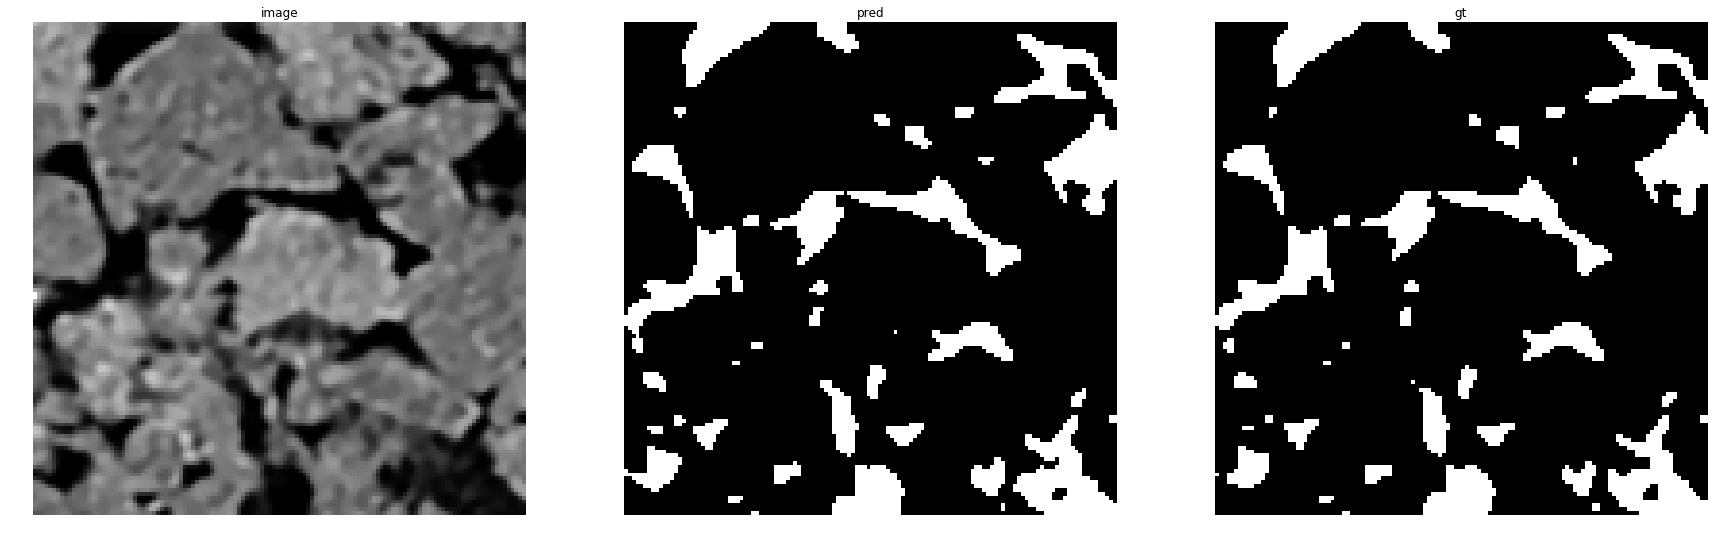

accuracy    : 0.98797607421875
precision   : 0.9460625674217907
recall      : 0.9824495892457058
f1          : 0.9639128045429566
pr_auc      : 0.996634704219493
iou         : 0.9303394625176803


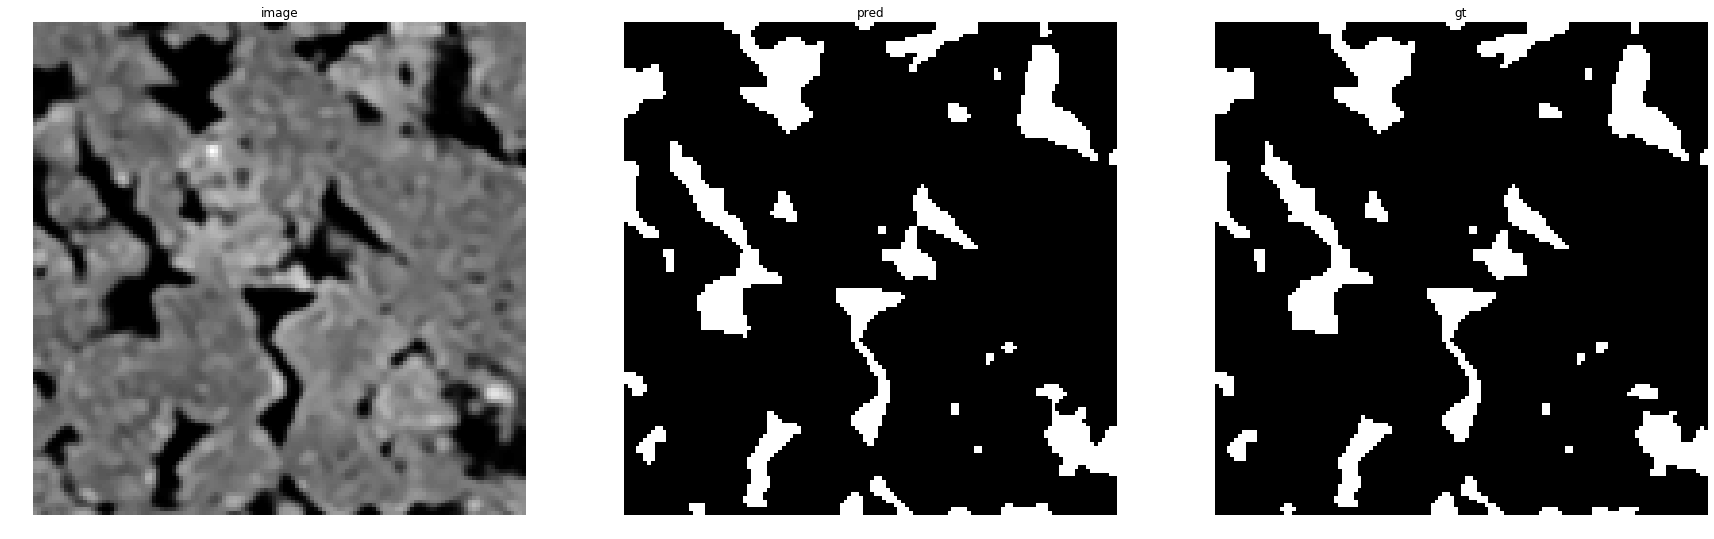

accuracy    : 0.99188232421875
precision   : 0.9592003263973888
recall      : 0.9861577181208053
f1          : 0.9724922440537745
pr_auc      : 0.9976582197503433
iou         : 0.9464573268921095


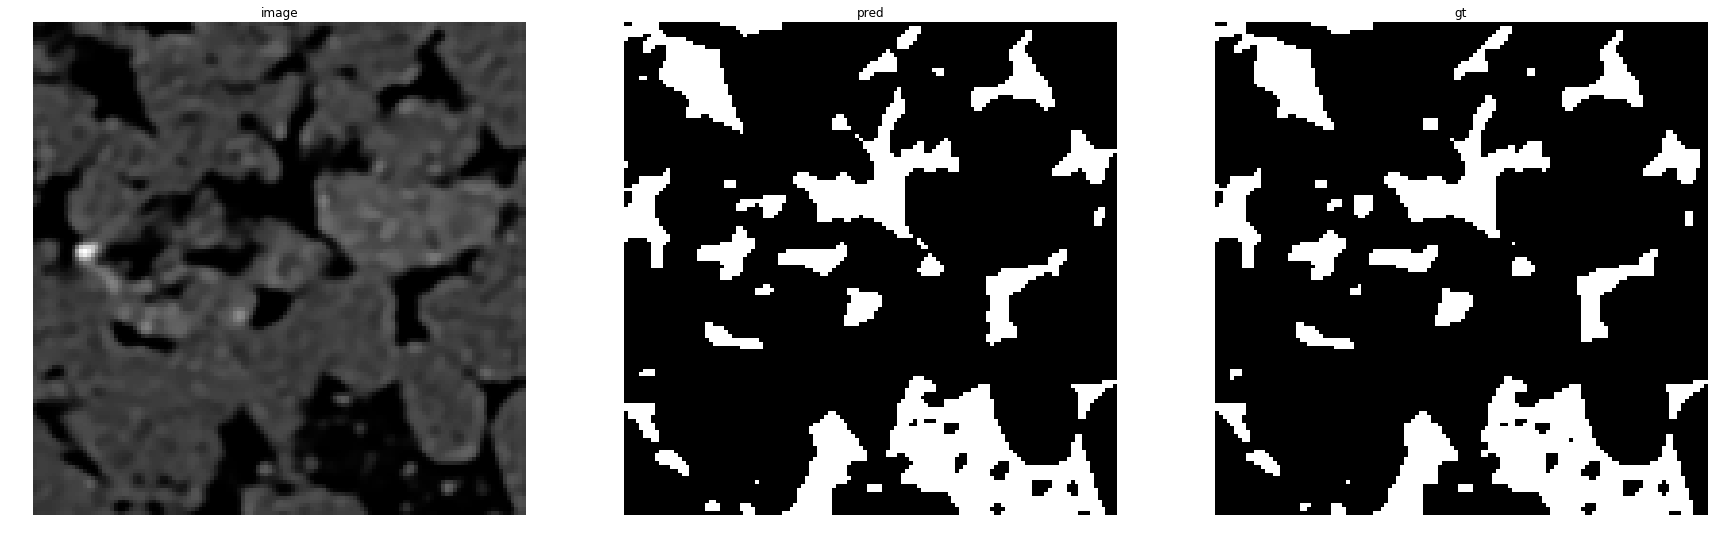

accuracy    : 0.98809814453125
precision   : 0.9563845050215208
recall      : 0.9872630331753555
f1          : 0.9715784871010058
pr_auc      : 0.9980603399623686
iou         : 0.9447278911564626


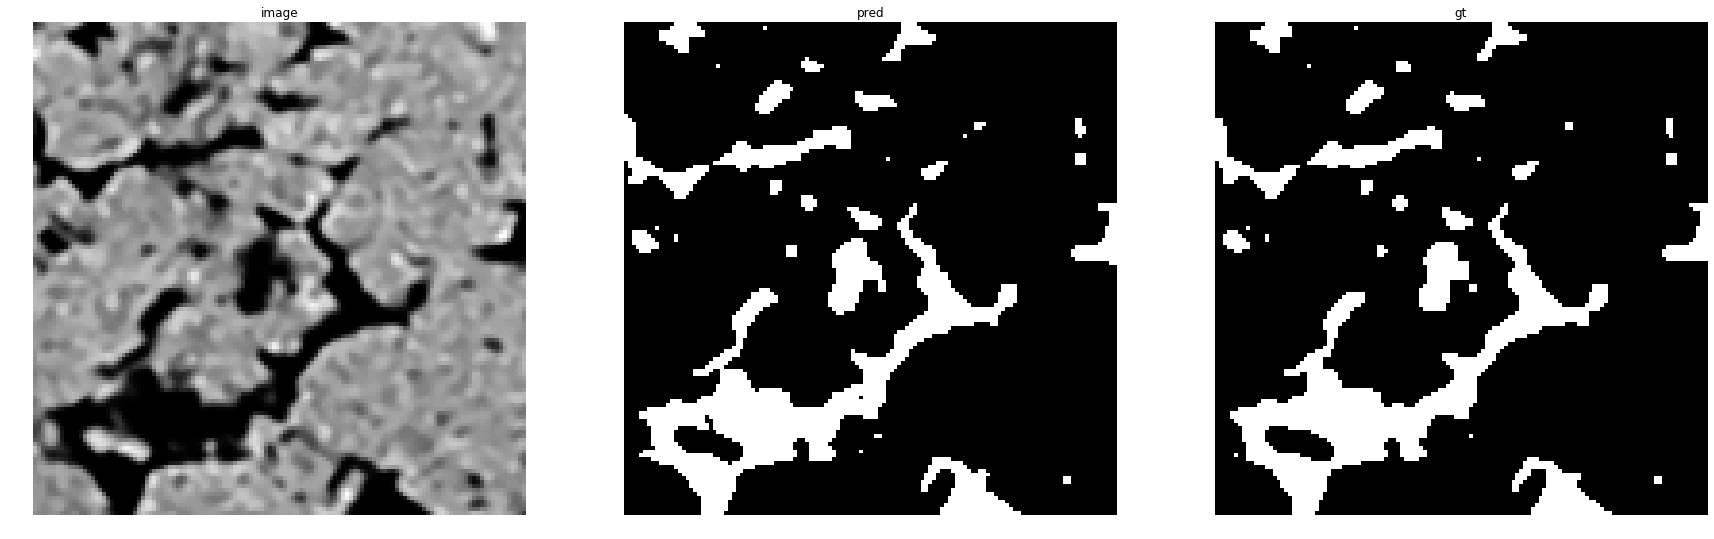

accuracy    : 0.99114990234375
precision   : 0.96
recall      : 0.984375
f1          : 0.9720347155255544
pr_auc      : 0.9978431135286125
iou         : 0.9455909943714822


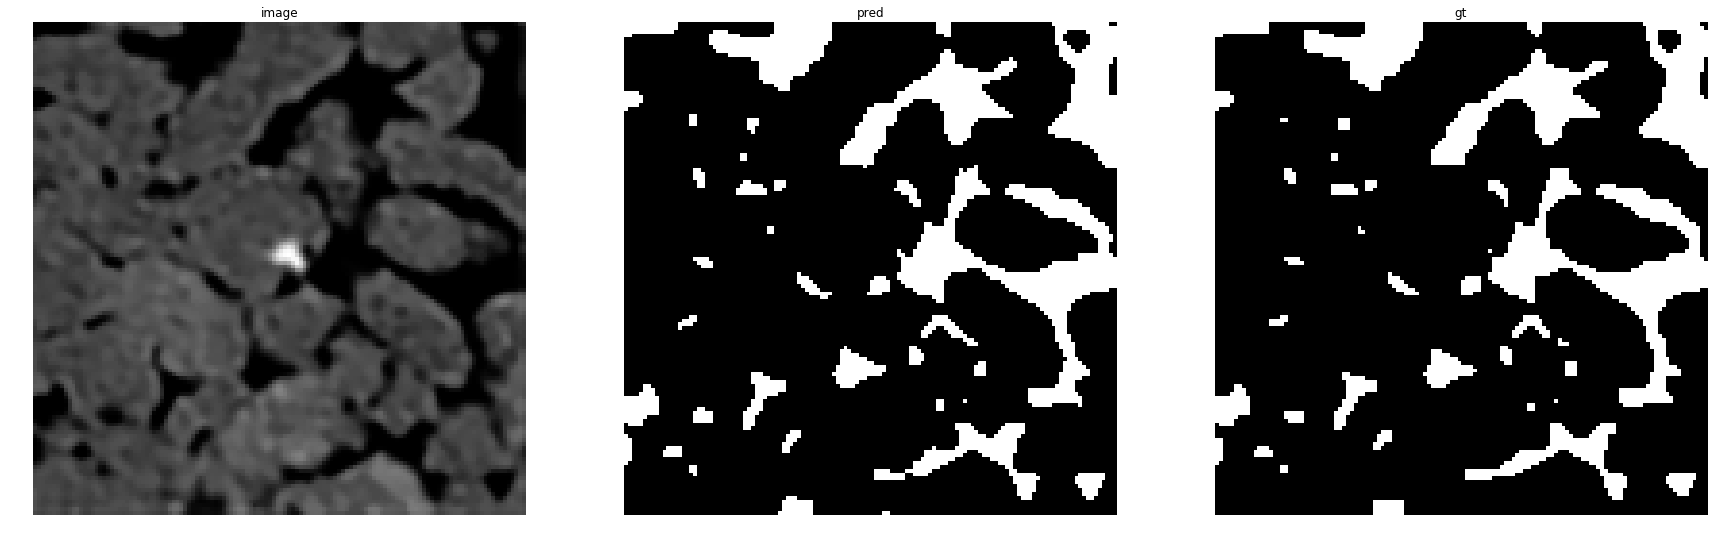

accuracy    : 0.99005126953125
precision   : 0.9605652316792639
recall      : 0.9855023600809171
f1          : 0.9728740222998835
pr_auc      : 0.9984297574930707
iou         : 0.9471808165910564


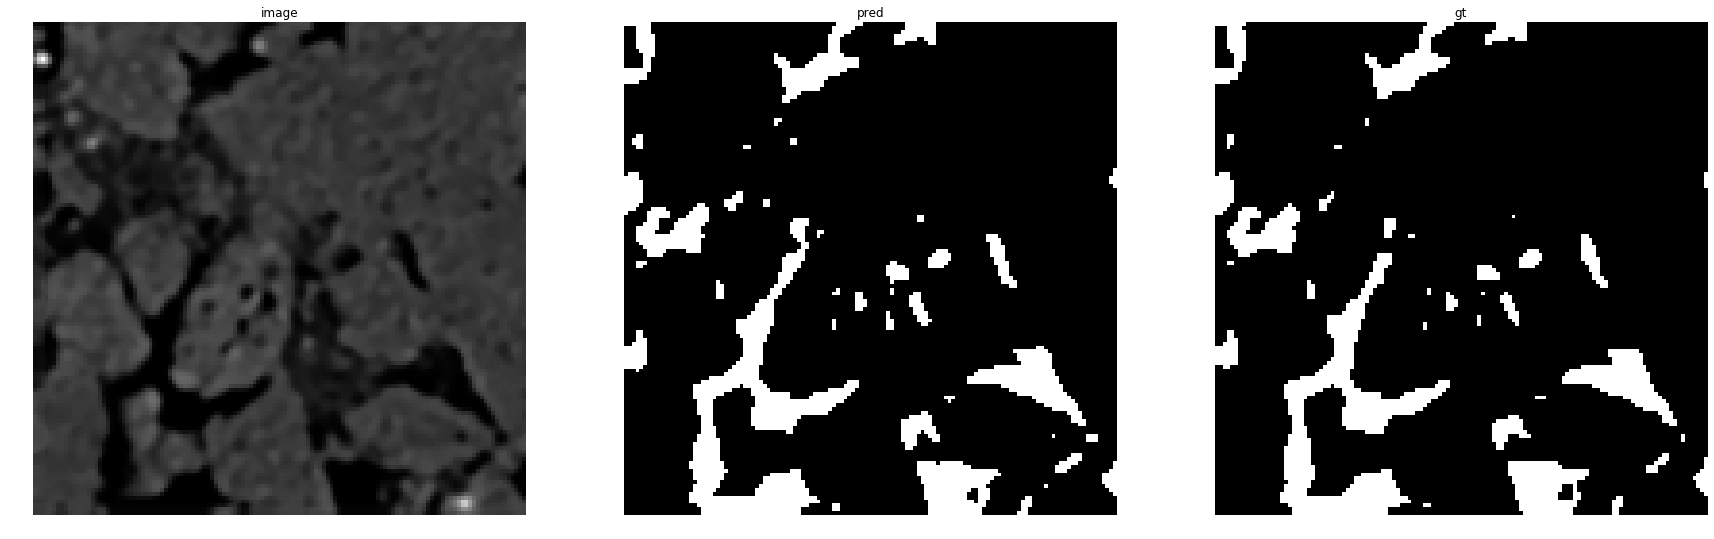

accuracy    : 0.98876953125
precision   : 0.9329073482428115
recall      : 0.9822200864968765
f1          : 0.9569288389513109
pr_auc      : 0.9959560476196092
iou         : 0.9174147217235189


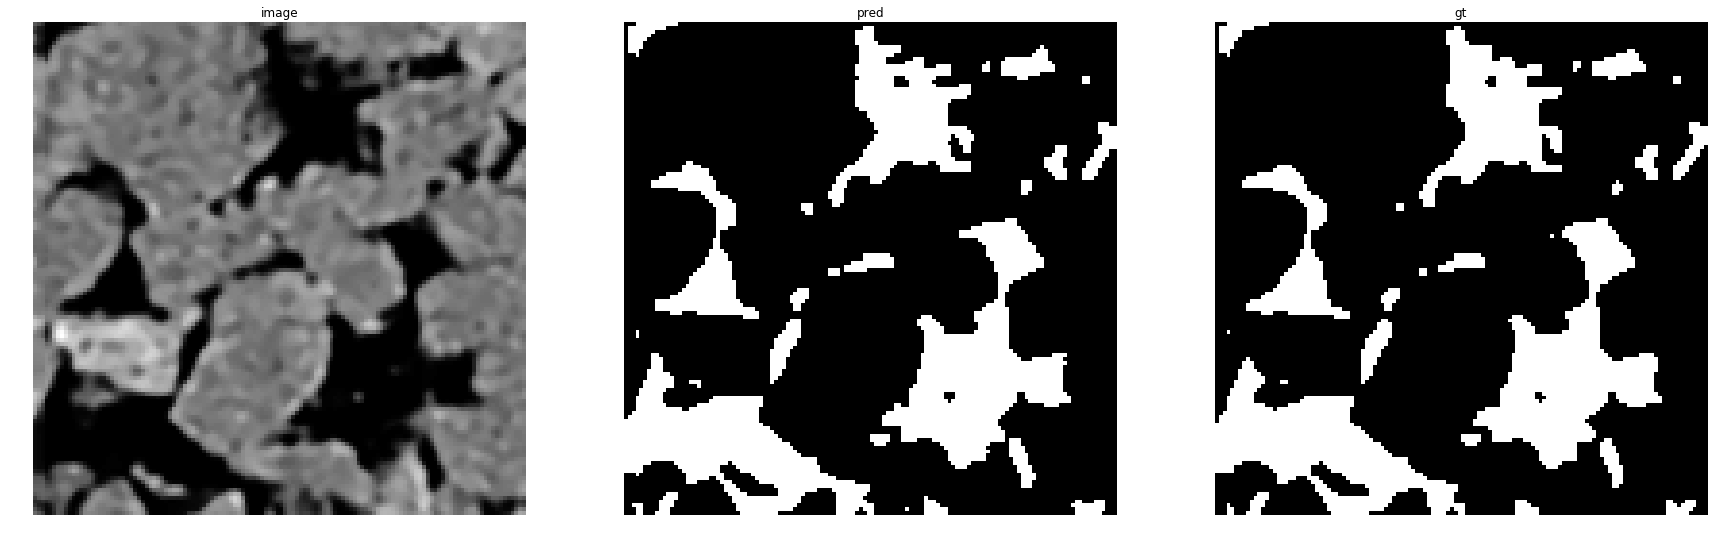

accuracy    : 0.99029541015625
precision   : 0.9734402405412177
recall      : 0.9865413915693245
f1          : 0.9799470298902762
pr_auc      : 0.9988175566545353
iou         : 0.9606824925816023


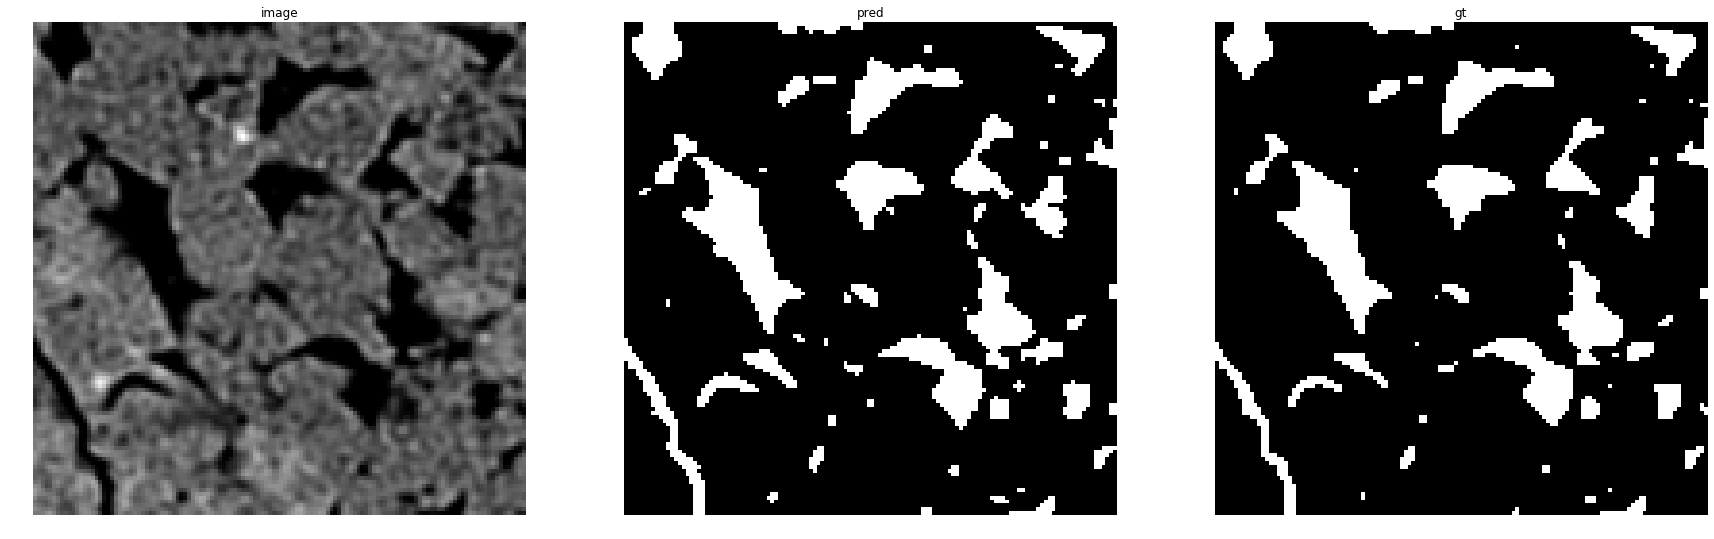

accuracy    : 0.98052978515625
precision   : 0.8925438596491229
recall      : 0.9898662342926632
f1          : 0.9386892177589852
pr_auc      : 0.9949598307853843
iou         : 0.8844621513944223


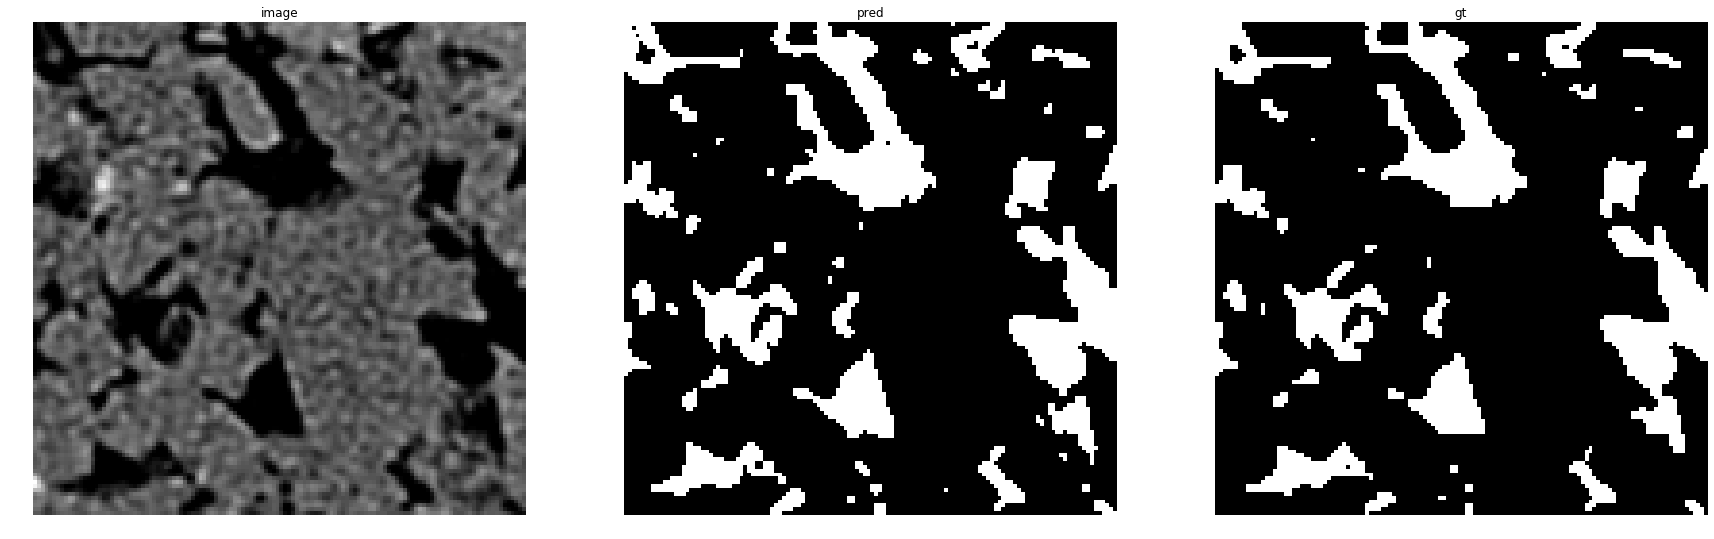

accuracy    : 0.97711181640625
precision   : 0.906635349383441
recall      : 0.9818759936406996
f1          : 0.9427568310181653
pr_auc      : 0.993357309561133
iou         : 0.8917123881028011


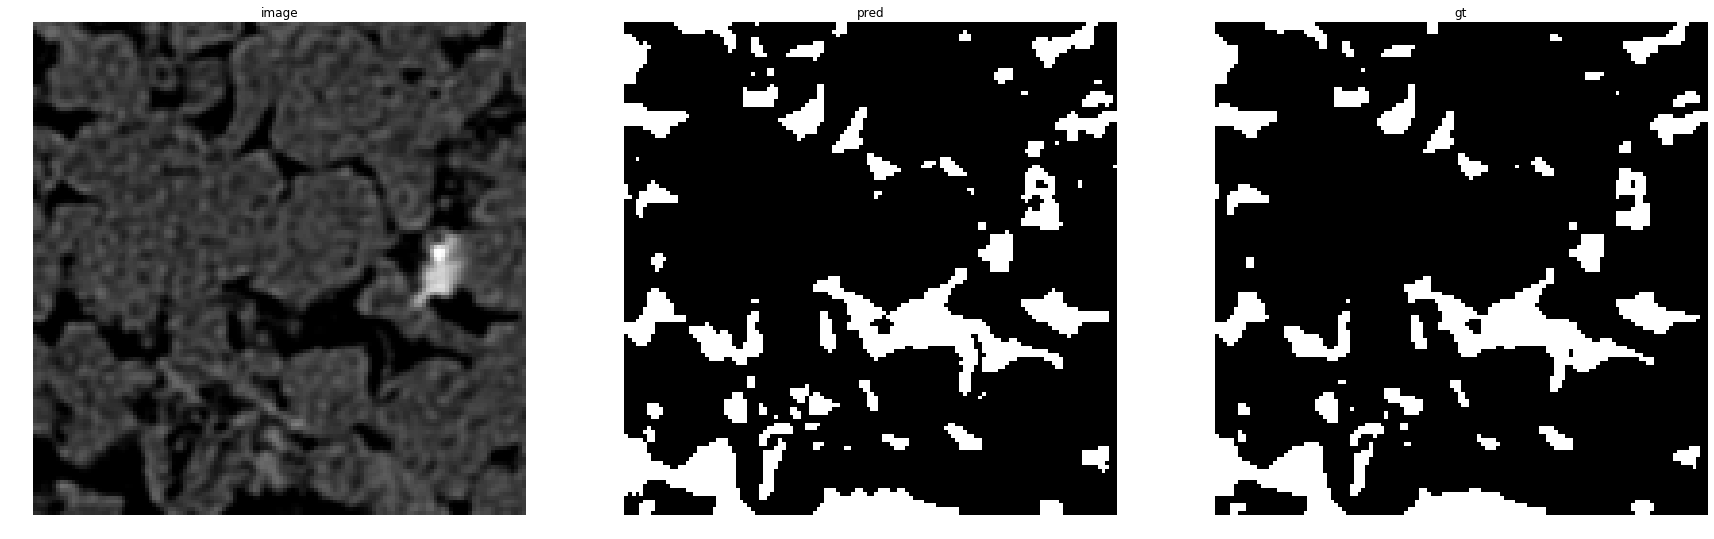

accuracy    : 0.97479248046875
precision   : 0.8749119097956307
recall      : 0.9771743408107044
f1          : 0.9232199293548987
pr_auc      : 0.9901600015341739
iou         : 0.857389502762431


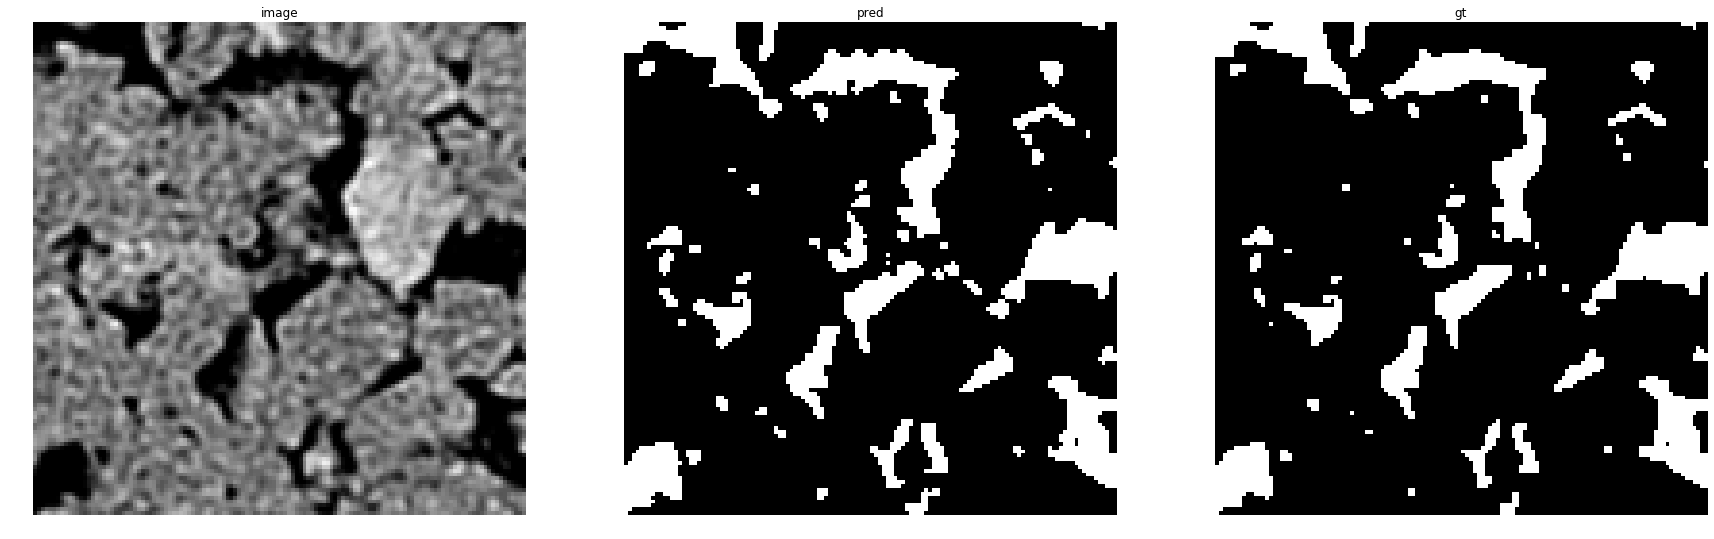

accuracy    : 0.9776611328125
precision   : 0.8925506350841057
recall      : 0.980022615906521
f1          : 0.9342436219906576
pr_auc      : 0.9922300058263674
iou         : 0.8766014834794336


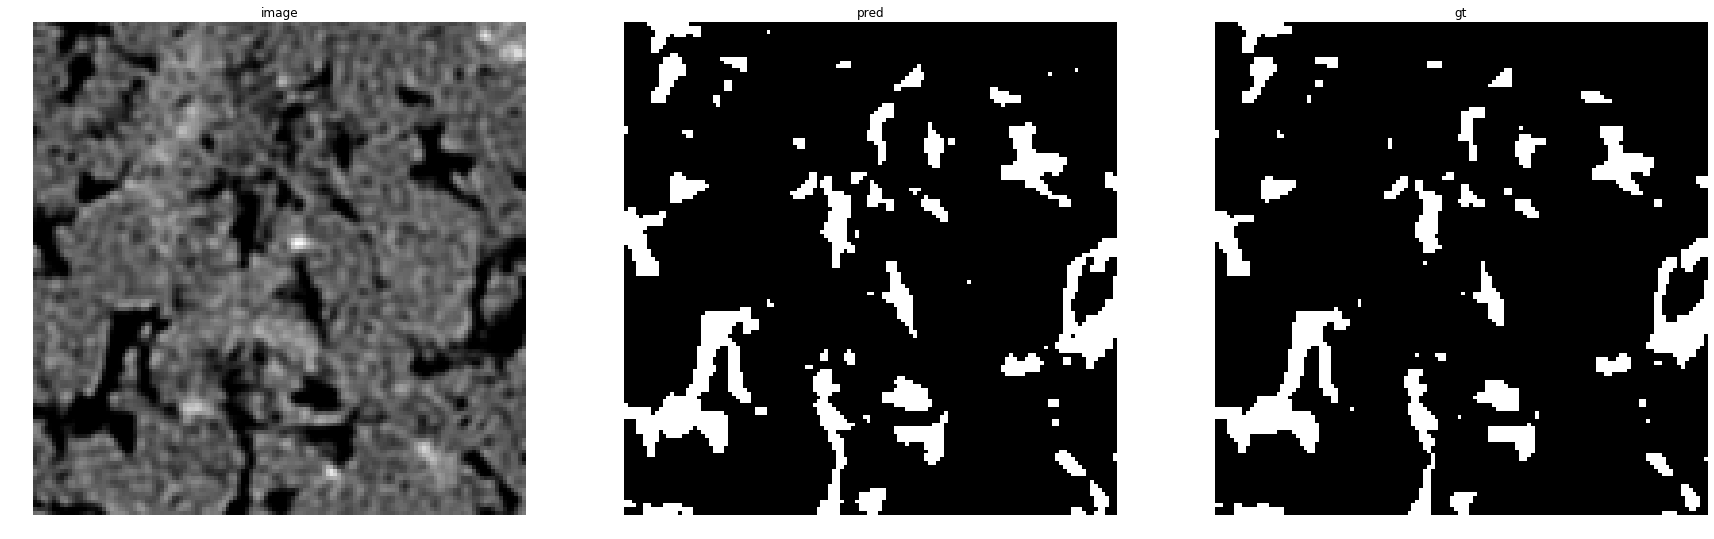

accuracy    : 0.97833251953125
precision   : 0.8493150684931506
recall      : 0.986737400530504
f1          : 0.9128834355828221
pr_auc      : 0.9887184981146397
iou         : 0.8397291196388262


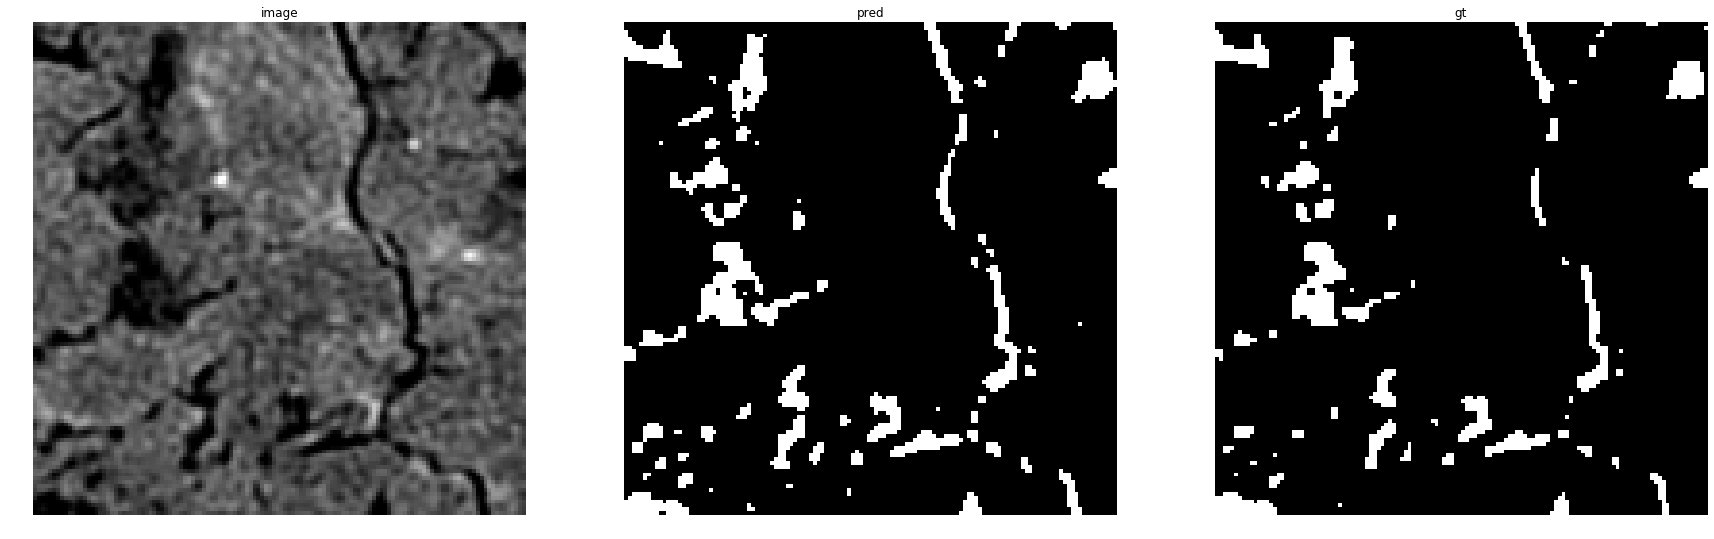

accuracy    : 0.97723388671875
precision   : 0.7841772151898734
recall      : 0.974822974036192
f1          : 0.8691687127323745
pr_auc      : 0.9806725208021347
iou         : 0.7686104218362283


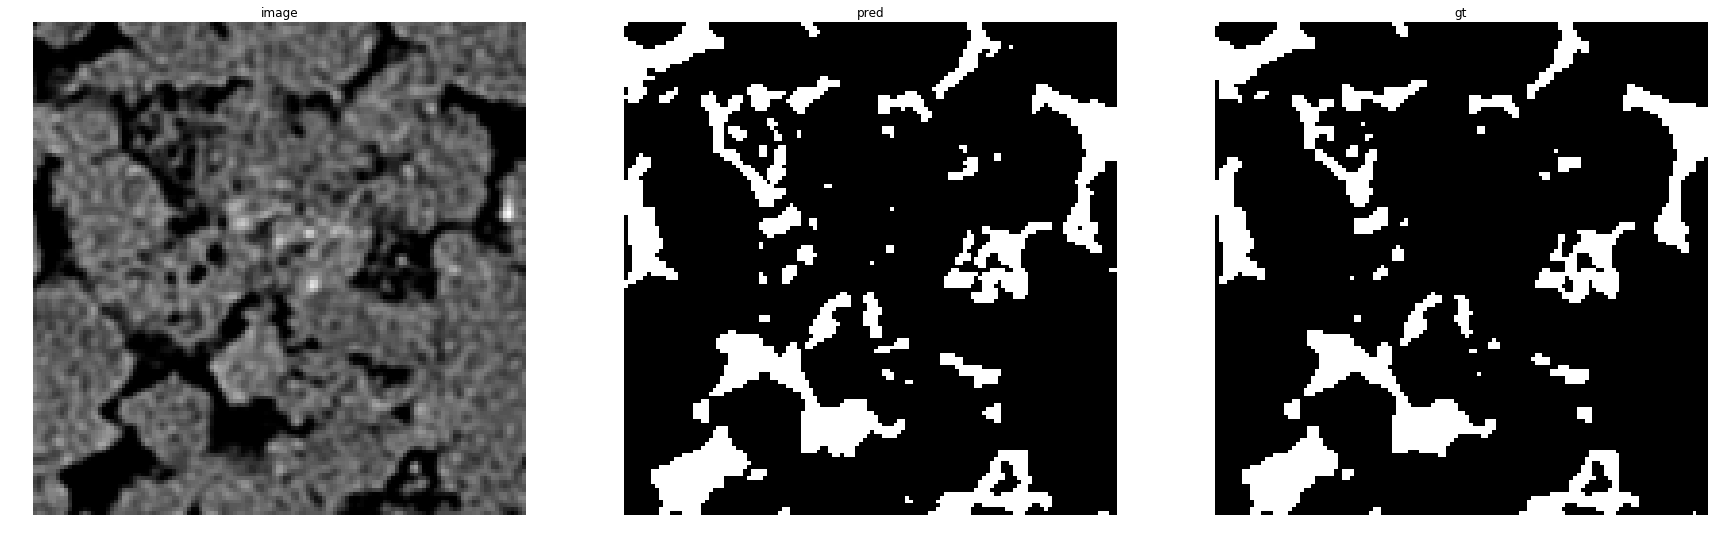

accuracy    : 0.97552490234375
precision   : 0.8909458094917536
recall      : 0.9717327459618208
f1          : 0.9295873573309921
pr_auc      : 0.9875978354293807
iou         : 0.8684383202099738


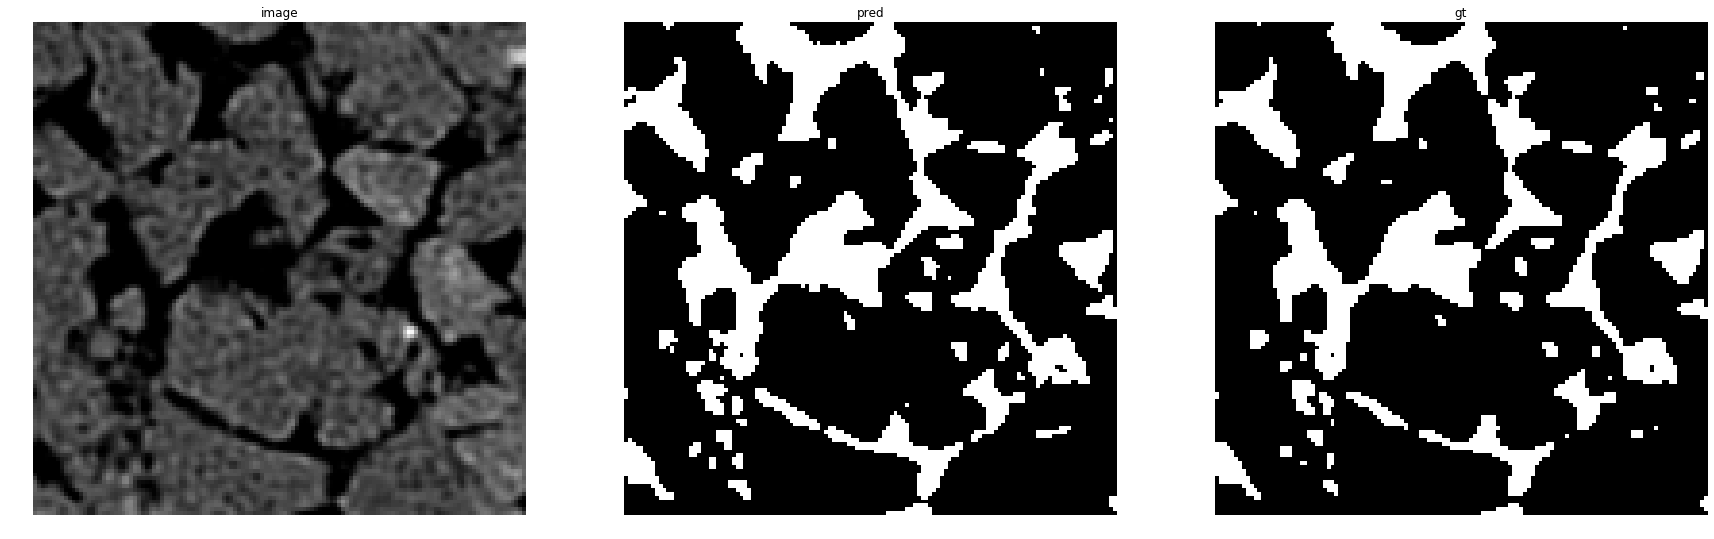

accuracy    : 0.97515869140625
precision   : 0.9039402523821787
recall      : 0.9904063205417607
f1          : 0.9451999461424532
pr_auc      : 0.9955423667531196
iou         : 0.8960939494511105


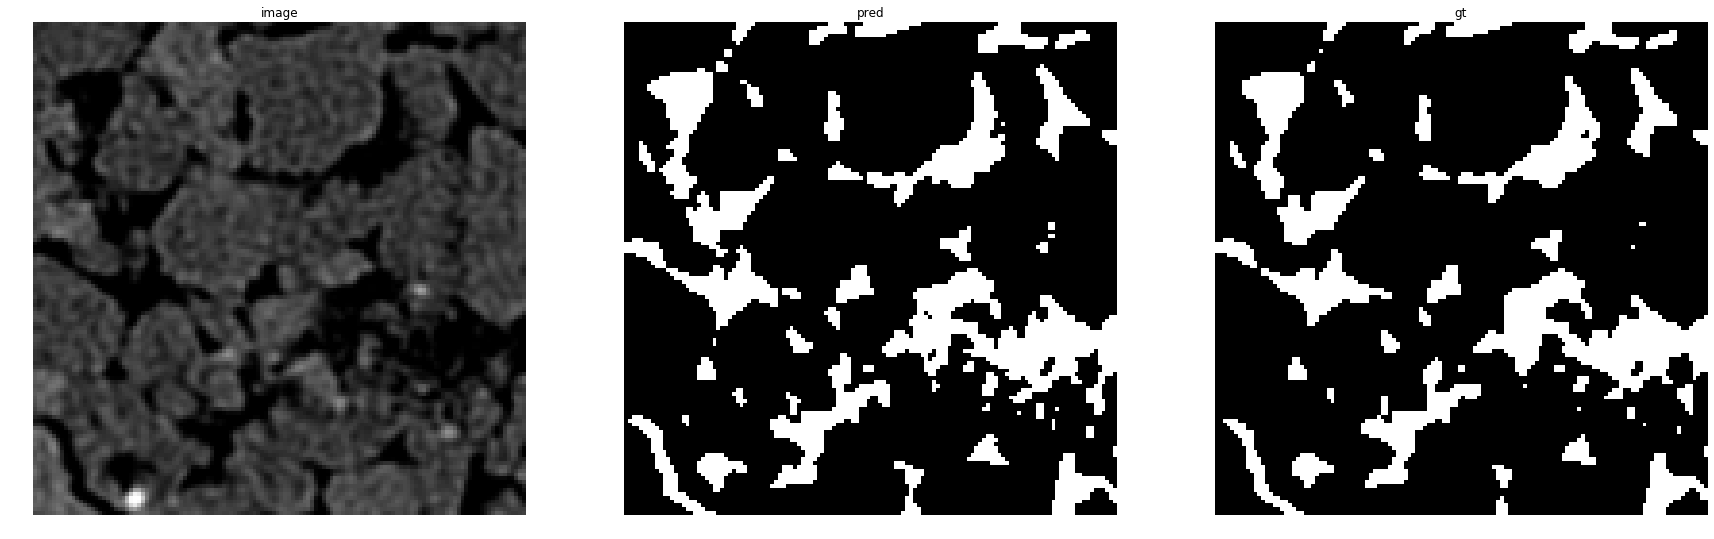

accuracy    : 0.97406005859375
precision   : 0.8990426457789382
recall      : 0.9757556675062973
f1          : 0.9358296844330365
pr_auc      : 0.9914309155086186
iou         : 0.8793984108967083


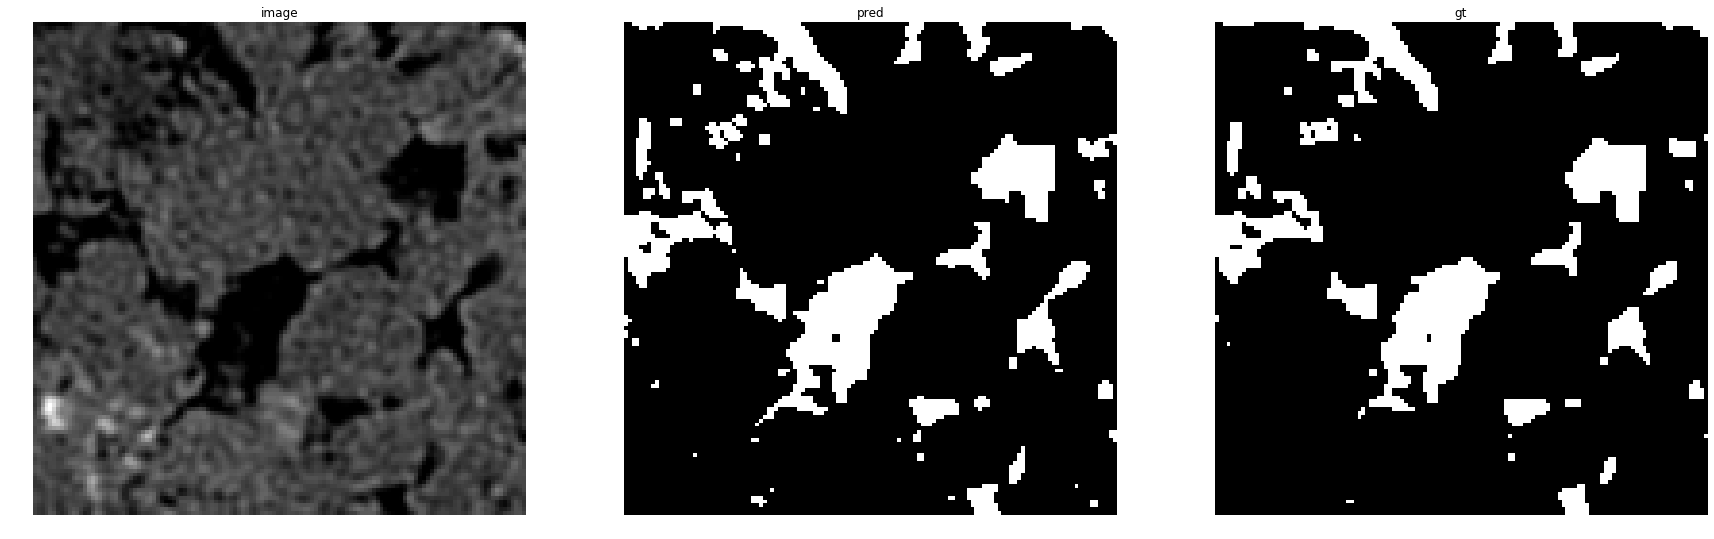

accuracy    : 0.9805908203125
precision   : 0.8921178343949044
recall      : 0.979458041958042
f1          : 0.9337500000000001
pr_auc      : 0.9919420104602452
iou         : 0.8757327080890973


In [30]:
for stack_name, dataloader_test in dataloaders_test.items():
    cnt = to_plot
    
    stack_name = os.path.split(stack_name)[-1]
    dir_path = os.path.join(os.path.abspath('.'), 'samples', stack_name)
    if stack_name not in os.listdir(os.path.join('.', 'samples')):
        os.mkdir(dir_path)
    
    for samples, masks in dataloader_test:

        preds = model(torch.from_numpy(samples).to(device)).cpu().data.numpy()

        for sample, mask, pred in list(zip(samples, masks, preds))[:cnt]:
            img_path = os.path.join('.', 'samples', stack_name, '{}.png'.format(cnt))
            plot_sample(sample[0], mask, pred, threshold, metrics, img_path)
            cnt -= 1
            
        if cnt ==0:
            break

## Make prediction for particular stack

In [31]:
stack_name = 'Urna_34'

In [32]:
stack = Stack.read_from_source('../../data/{}'.format(stack_name))

700it [00:00, 736.40it/s]
100%|██████████| 700/700 [00:07<00:00, 98.20it/s] 


In [33]:
for ps, d in zip([(128, 128, 1), (128, 1, 128), (1, 128, 128)], ['z', 'y', 'x']):
    predicted_stack = stack.apply(
        model, 
        patch_sizes=ps, 
        bs=32, num_workers=8, device='cuda:0',
        threshold=None)
    predicted_stack.dump('./{}_{}'.format(stack_name, d), features=False, targets=False, preds=True)

25200it [00:00, 233298.23it/s]
25200it [02:05, 201.55it/s]
100%|██████████| 700/700 [00:04<00:00, 167.86it/s]
25200it [00:00, 111449.48it/s]
25200it [02:15, 185.88it/s]
100%|██████████| 700/700 [00:04<00:00, 170.90it/s]
25200it [00:00, 235603.54it/s]
5259it [00:28, 186.29it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
predicted_stack_1 = stack.apply(
    model, 
    patch_sizes=(128, 128, 1), 
    bs=32, num_workers=8, device='cuda:0',
    threshold=None)

25200it [00:00, 125337.17it/s]
25200it [02:16, 184.13it/s]
100%|██████████| 25200/25200 [00:08<00:00, 3114.76it/s]


In [35]:
for k, v in metrics.items():
    print('{:12}: {:.6f}'.format(k, 
                                 v(np.where(predicted_stack_1.targets == 255, 0, 1).astype(np.uint8), 
                                    predicted_stack_1.preds, 
                                    mode='stack')))

accuracy    : 0.977850
precision   : 0.887924
recall      : 0.979586
f1          : 0.931506
pr_auc      : 0.991411
iou         : 0.871793
